# Machine learning models - houses

In [1]:
import pandas as pd
import xgboost as xg
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE, make_scorer, mean_absolute_error as MAE, r2_score, mean_absolute_percentage_error as MAPE
from sklearn.linear_model import LinearRegression
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
from matplotlib.pyplot import figure
from keras import callbacks

In [2]:
data = pd.read_csv('./preprocessed_dataset_houses.csv', index_col = 0)
data.head()

,price,price_per_square_meter,area,heating,land_area,finishing_standard,building_type,number_of_rooms,rent,market,...,is_lake,is_forest,is_moutain,is_sea,has_parking,is_summer_house,has_security_protection,is_duplex,has_basement,age
0,80000.0,1143.0,0.012329,0,0.080615,1,8,3,0.074998,1,...,0,0,0,0,1,0,0,0,0,0.424107
1,800000.0,2000.0,0.085903,111,0.150029,3,8,7,0.074998,1,...,0,0,0,0,1,0,0,0,0,0.191964
2,849600.0,1770.0,0.103739,1,0.230045,3,8,5,0.074998,1,...,1,1,0,0,1,0,1,0,1,0.035714
3,395000.0,3292.0,0.023477,0,0.030005,1,0,3,0.074998,1,...,0,0,0,0,1,0,0,0,0,0.035714
4,680000.0,4000.0,0.034624,0,0.066512,0,0,5,0.074998,1,...,0,0,0,0,1,0,0,0,0,0.035714


In [3]:
data = data.drop('price_per_square_meter', axis = 1)

### Split data into train and test datasets

In [4]:
X, y = data.drop('price', axis = 1),data['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 4)

### Linear regression

In [5]:
lin_reg = LinearRegression()

lin_reg.fit(train_X, train_y)

LinearRegression()

In [6]:
lin_reg_pred = lin_reg.predict(test_X)

#### Metrics for the linear regression model

In [7]:
print(MAPE(test_y, lin_reg_pred))
print(MSE(test_y, lin_reg_pred))
print(MAE(test_y, lin_reg_pred))
print(r2_score(test_y, lin_reg_pred))

0.45143469345647064
793016680891.2015
430198.05681421404
0.4942530329181345


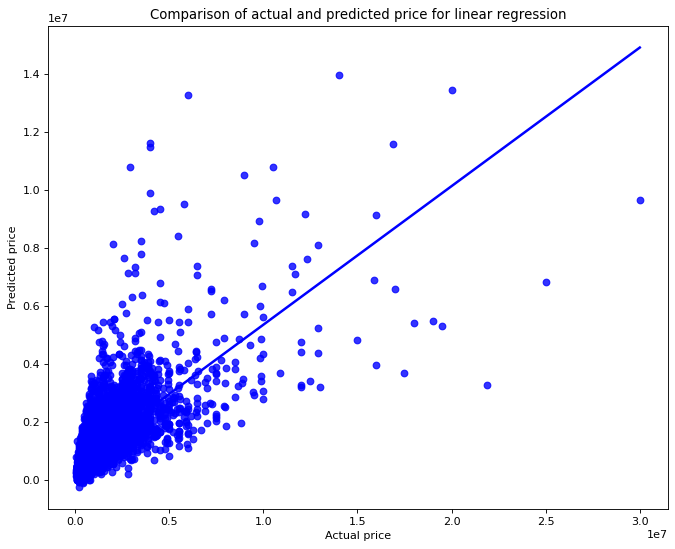

In [8]:
figure(figsize=(10, 8), dpi=80)
ax = sns.regplot(x=test_y, y=lin_reg_pred, ci=None, color ='blue')
ax.set(xlabel='Actual price', ylabel='Predicted price', title='Comparison of actual and predicted price for linear regression')
plt.show()

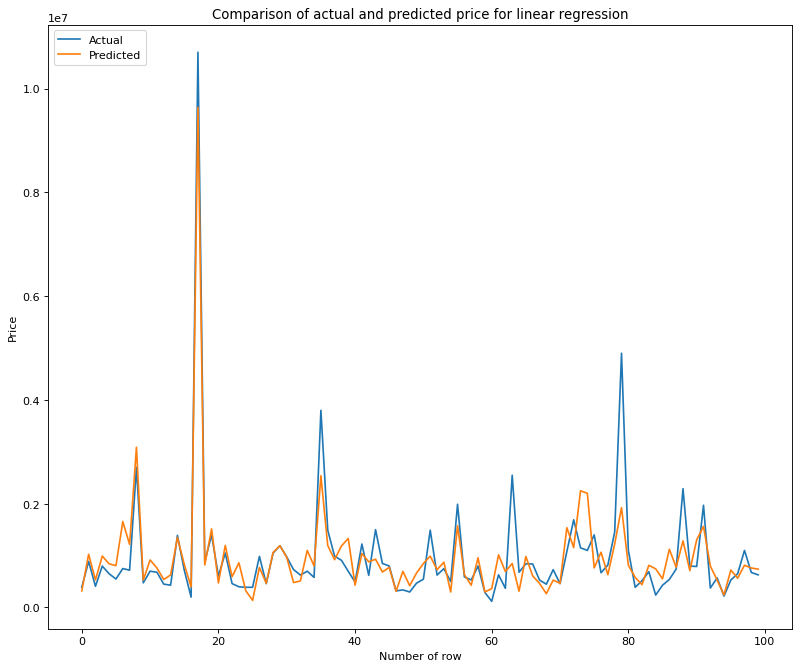

In [9]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), lin_reg_pred[:100])
plt.title('Comparison of actual and predicted price for linear regression')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

### XGBoost

In [10]:
xgb_r = xg.XGBRegressor(objective = 'reg:squarederror')

optimization_dict = {'max_depth': [2, 4, 6],
                     'n_estimators': [100, 500, 1000],
                    'seed': [4, 8, 16]}

mse = make_scorer(MSE,greater_is_better=False)

xgb_grid_search_model = GridSearchCV(xgb_r, optimization_dict, scoring=mse, verbose=10)

xgb_grid_search_model.fit(train_X, train_y)

print(xgb_grid_search_model.best_score_)
print(xgb_grid_search_model.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 1/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-586342691495.226 total time=   0.4s
[CV 2/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 2/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-619821982668.193 total time=   0.5s
[CV 3/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 3/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-656750271137.179 total time=   0.4s
[CV 4/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 4/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-704953903967.112 total time=   0.5s
[CV 5/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 5/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-604633319011.172 total time=   0.5s
[CV 1/5; 2/27] START ma

[CV 5/5; 9/27] END max_depth=2, n_estimators=1000, seed=16;, score=-522954274958.963 total time=   9.9s
[CV 1/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 1/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-491963581248.765 total time=   2.1s
[CV 2/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 2/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-520486461810.853 total time=   2.1s
[CV 3/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 3/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-606273745583.561 total time=   2.0s
[CV 4/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 4/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-527012207735.622 total time=   2.0s
[CV 5/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 5/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-574634353217

[CV 5/5; 18/27] END max_depth=4, n_estimators=1000, seed=16;, score=-541703407122.225 total time=  23.1s
[CV 1/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 1/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-457541439127.024 total time=   3.6s
[CV 2/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 2/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-529849720031.443 total time=   4.2s
[CV 3/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 3/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-562718452504.537 total time=   3.9s
[CV 4/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 4/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-508922832901.449 total time=   4.3s
[CV 5/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 5/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-50656714832

[CV 5/5; 27/27] END max_depth=6, n_estimators=1000, seed=16;, score=-491770583910.831 total time=  34.6s
-498311019461.74524
{'max_depth': 6, 'n_estimators': 1000, 'seed': 4}


In [11]:
xgb_pred = xgb_grid_search_model.predict(test_X)

In [12]:
model_xgb = xgb_grid_search_model.best_estimator_
model_xgb.fit(train_X, train_y)
model_xgb.save_model("xgb_houses_model.save")

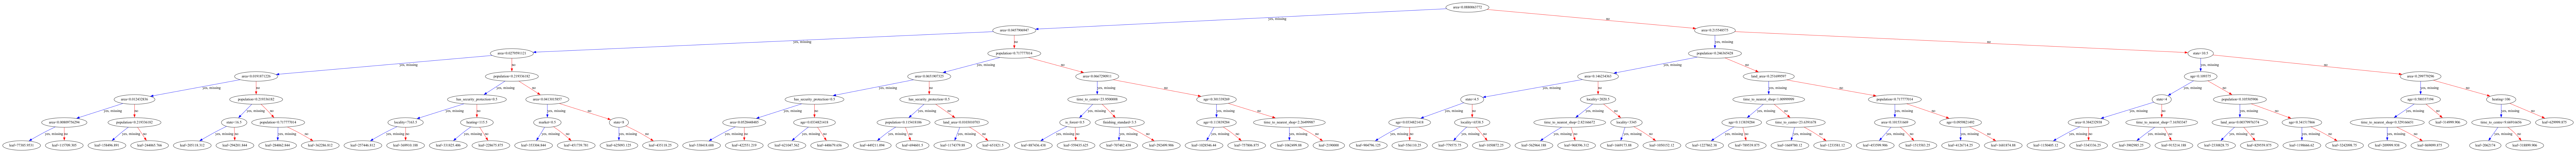

In [13]:
fig, ax = plt.subplots(figsize=(200, 200))
xg.plot_tree(model_xgb, num_trees=0, ax=ax, fontsize=20)

plt.savefig('xgb_tree_houses.png')

#### Metrics for the XGBoost model

In [14]:
print(MAPE(test_y, xgb_pred))
print(MSE(test_y, xgb_pred))
print(MAE(test_y, xgb_pred))
print(r2_score(test_y, xgb_pred))

0.27754141016235523
451578217506.5679
281529.281051967
0.7120056621664999


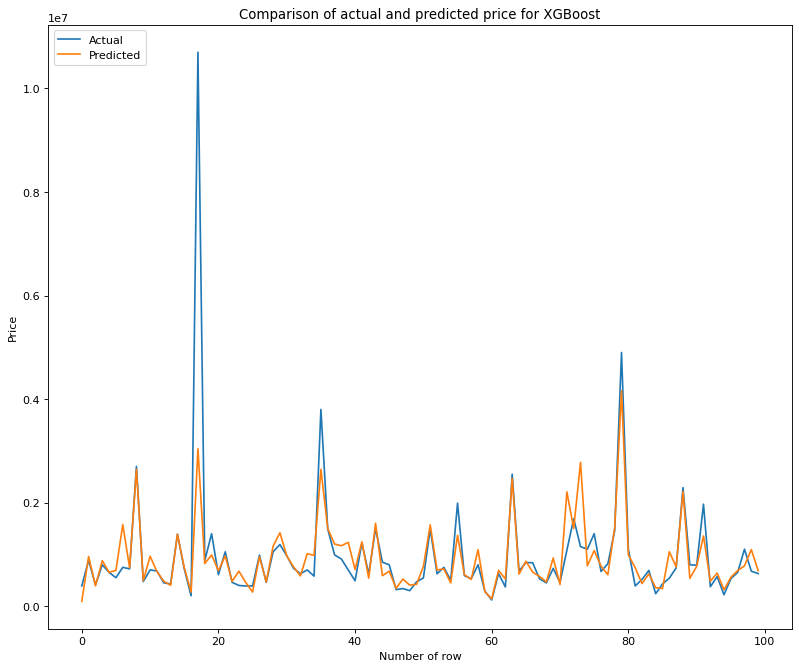

In [15]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), xgb_pred[:100])
plt.title('Comparison of actual and predicted price for XGBoost')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

### Neural networks

In [16]:
def create_model(learning_rate):

    nn_model = keras.Sequential(
        [
            layers.Dense(256, input_dim = len(data.columns) - 1, activation = 'relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'linear')
        ]
    )
    adam = tf.optimizers.Adam(learning_rate = learning_rate)
    nn_model.compile(loss = 'mse', optimizer = adam, metrics = ['mse', 'mae'])

    return nn_model

model = KerasRegressor(build_fn=create_model)

In [18]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

In [19]:
batch_size = [32, 64, 256]
epochs = [64, 128, 256]
learning_rate = [0.001, 0.01]
validation_split=[0.2]
callbacks=[earlystopping]

param_grid = dict(batch_size=batch_size, epochs=epochs, learning_rate = learning_rate, validation_split = validation_split, callbacks = callbacks)
nn_grid_search_model = GridSearchCV(estimator=model, param_grid=param_grid, verbose=10)
nn_grid_search_result = nn_grid_search_model.fit(train_X, train_y)

print(nn_grid_search_model.best_params_)
print(nn_grid_search_model.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=64, learning_rate=0.001, validation_split=0.2


2022-11-15 15:27:25.729406: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/64
539/539 [==============================] - 2s 2ms/step - loss: 1919783927808.0000 - mse: 1919783927808.0000 - mae: 759496.3750 - val_loss: 1688493096960.0000 - val_mse: 1688493096960.0000 - val_mae: 692641.5000
Epoch 2/64
539/539 [==============================] - 1s 2ms/step - loss: 1750609952768.0000 - mse: 1750609952768.0000 - mae: 689002.8750 - val_loss: 1628931489792.0000 - val_mse: 1628931489792.0000 - val_mae: 634592.0625
Epoch 3/64
539/539 [==============================] - 1s 2ms/step - loss: 1688857083904.0000 - mse: 1688857083904.0000 - mae: 657177.0625 - val_loss: 1589773598720.0000 - val_mse: 1589773598720.0000 - val_mae: 588898.0000
Epoch 4/64
539/539 [==============================] - 1s 2ms/step - loss: 1637178671104.0000 - mse: 1637178671104.0000 - mae: 638346.1875 - val_loss: 1533289955328.0000 - val_mse: 1533289955328.0000 - val_mae: 586809.8750
Epoch 5/64
539/539 [==============================] - 1s 2ms/step - loss: 1589337653248.0000 - mse: 158933765324

Epoch 38/64
539/539 [==============================] - 1s 2ms/step - loss: 1319593312256.0000 - mse: 1319593312256.0000 - mae: 560771.9375 - val_loss: 1322882564096.0000 - val_mse: 1322882564096.0000 - val_mae: 502704.0625
Epoch 39/64
539/539 [==============================] - 1s 2ms/step - loss: 1323438178304.0000 - mse: 1323438178304.0000 - mae: 559464.3750 - val_loss: 1343194660864.0000 - val_mse: 1343194660864.0000 - val_mae: 498594.8125
Epoch 40/64
539/539 [==============================] - 1s 2ms/step - loss: 1312839696384.0000 - mse: 1312839696384.0000 - mae: 559799.8750 - val_loss: 1456060760064.0000 - val_mse: 1456060760064.0000 - val_mae: 530705.3750
Epoch 41/64
539/539 [==============================] - 1s 2ms/step - loss: 1319607599104.0000 - mse: 1319607599104.0000 - mae: 561700.5625 - val_loss: 1296492527616.0000 - val_mse: 1296492527616.0000 - val_mae: 540492.1875
Epoch 42/64
539/539 [==============================] - 1s 2ms/step - loss: 1320981102592.0000 - mse: 1320981

539/539 [==============================] - 1s 2ms/step - loss: 1438960582656.0000 - mse: 1438960582656.0000 - mae: 594145.8750 - val_loss: 1439561285632.0000 - val_mse: 1439561285632.0000 - val_mae: 542211.6875
Epoch 9/64
539/539 [==============================] - 1s 1ms/step - loss: 1412649451520.0000 - mse: 1412649451520.0000 - mae: 588429.5000 - val_loss: 1415098925056.0000 - val_mse: 1415098925056.0000 - val_mae: 575718.5000
Epoch 10/64
539/539 [==============================] - 1s 1ms/step - loss: 1406188650496.0000 - mse: 1406188650496.0000 - mae: 585132.9375 - val_loss: 1407538298880.0000 - val_mse: 1407538298880.0000 - val_mae: 557171.3125
Epoch 11/64
539/539 [==============================] - 1s 2ms/step - loss: 1391202533376.0000 - mse: 1391202533376.0000 - mae: 583069.5000 - val_loss: 1410010185728.0000 - val_mse: 1410010185728.0000 - val_mae: 535720.3750
Epoch 12/64
539/539 [==============================] - 1s 2ms/step - loss: 1381846089728.0000 - mse: 1381846089728.0000 -

Epoch 45/64
539/539 [==============================] - 1s 2ms/step - loss: 1256664858624.0000 - mse: 1256664858624.0000 - mae: 548897.5000 - val_loss: 1287669940224.0000 - val_mse: 1287669940224.0000 - val_mae: 549650.3750
Epoch 46/64
539/539 [==============================] - 1s 1ms/step - loss: 1261458030592.0000 - mse: 1261458030592.0000 - mae: 553414.3125 - val_loss: 1287791968256.0000 - val_mse: 1287791968256.0000 - val_mae: 548522.8125
Epoch 47/64
539/539 [==============================] - 1s 1ms/step - loss: 1259375951872.0000 - mse: 1259375951872.0000 - mae: 552773.6250 - val_loss: 1283736469504.0000 - val_mse: 1283736469504.0000 - val_mae: 538514.8125
Epoch 48/64
539/539 [==============================] - 1s 1ms/step - loss: 1261090766848.0000 - mse: 1261090766848.0000 - mae: 553433.5625 - val_loss: 1284249223168.0000 - val_mse: 1284249223168.0000 - val_mae: 517473.0000
Epoch 49/64
539/539 [==============================] - 1s 2ms/step - loss: 1262904803328.0000 - mse: 1262904

539/539 [==============================] - 1s 2ms/step - loss: 1400282808320.0000 - mse: 1400282808320.0000 - mae: 582400.1250 - val_loss: 1369045991424.0000 - val_mse: 1369045991424.0000 - val_mae: 565413.3750
Epoch 16/64
539/539 [==============================] - 1s 2ms/step - loss: 1393521459200.0000 - mse: 1393521459200.0000 - mae: 582240.1250 - val_loss: 1366325198848.0000 - val_mse: 1366325198848.0000 - val_mae: 538983.8750
Epoch 17/64
539/539 [==============================] - 1s 2ms/step - loss: 1391984508928.0000 - mse: 1391984508928.0000 - mae: 581667.4375 - val_loss: 1367982997504.0000 - val_mse: 1367982997504.0000 - val_mae: 523991.0312
Epoch 18/64
539/539 [==============================] - 1s 2ms/step - loss: 1371057815552.0000 - mse: 1371057815552.0000 - mae: 576182.1250 - val_loss: 1351638974464.0000 - val_mse: 1351638974464.0000 - val_mae: 544299.6875
Epoch 19/64
539/539 [==============================] - 1s 2ms/step - loss: 1365743763456.0000 - mse: 1365743763456.0000 

Epoch 52/64
539/539 [==============================] - 1s 2ms/step - loss: 1288939896832.0000 - mse: 1288939896832.0000 - mae: 559575.4375 - val_loss: 1274729201664.0000 - val_mse: 1274729201664.0000 - val_mae: 514364.8125
Epoch 53/64
539/539 [==============================] - 1s 1ms/step - loss: 1284516478976.0000 - mse: 1284516478976.0000 - mae: 559966.1875 - val_loss: 1366671097856.0000 - val_mse: 1366671097856.0000 - val_mae: 680885.3750
Epoch 54/64
539/539 [==============================] - 1s 1ms/step - loss: 1285050990592.0000 - mse: 1285050990592.0000 - mae: 559248.3750 - val_loss: 1325828145152.0000 - val_mse: 1325828145152.0000 - val_mae: 625922.3125
Epoch 55/64
539/539 [==============================] - 1s 1ms/step - loss: 1284119199744.0000 - mse: 1284119199744.0000 - mae: 559957.6875 - val_loss: 1277417226240.0000 - val_mse: 1277417226240.0000 - val_mae: 567480.5625
Epoch 56/64
539/539 [==============================] - 1s 1ms/step - loss: 1287710048256.0000 - mse: 1287710

539/539 [==============================] - 1s 2ms/step - loss: 1286000345088.0000 - mse: 1286000345088.0000 - mae: 565435.5000 - val_loss: 1345756987392.0000 - val_mse: 1345756987392.0000 - val_mae: 528466.7500
Epoch 23/64
539/539 [==============================] - 1s 2ms/step - loss: 1285699534848.0000 - mse: 1285699534848.0000 - mae: 564042.3750 - val_loss: 1344090406912.0000 - val_mse: 1344090406912.0000 - val_mae: 520327.9375
Epoch 24/64
539/539 [==============================] - 1s 2ms/step - loss: 1279771148288.0000 - mse: 1279771148288.0000 - mae: 565633.5000 - val_loss: 1330816745472.0000 - val_mse: 1330816745472.0000 - val_mae: 532168.8125
Epoch 25/64
539/539 [==============================] - 1s 2ms/step - loss: 1279898550272.0000 - mse: 1279898550272.0000 - mae: 566148.5000 - val_loss: 1326617722880.0000 - val_mse: 1326617722880.0000 - val_mae: 551718.5000
Epoch 26/64
539/539 [==============================] - 1s 2ms/step - loss: 1280556924928.0000 - mse: 1280556924928.0000 

Epoch 59/64
539/539 [==============================] - 1s 2ms/step - loss: 1233269293056.0000 - mse: 1233269293056.0000 - mae: 553822.6250 - val_loss: 1282601779200.0000 - val_mse: 1282601779200.0000 - val_mae: 511388.1250
Epoch 60/64
539/539 [==============================] - 1s 1ms/step - loss: 1224337260544.0000 - mse: 1224337260544.0000 - mae: 551220.9375 - val_loss: 1273656377344.0000 - val_mse: 1273656377344.0000 - val_mae: 516104.8438
Epoch 61/64
539/539 [==============================] - 1s 2ms/step - loss: 1226665230336.0000 - mse: 1226665230336.0000 - mae: 549081.5000 - val_loss: 1276621619200.0000 - val_mse: 1276621619200.0000 - val_mae: 575582.6875
Epoch 62/64
539/539 [==============================] - 1s 2ms/step - loss: 1221457870848.0000 - mse: 1221457870848.0000 - mae: 551085.7500 - val_loss: 1277949509632.0000 - val_mse: 1277949509632.0000 - val_mae: 571737.5000
Epoch 63/64
539/539 [==============================] - 1s 2ms/step - loss: 1215773016064.0000 - mse: 1215773

539/539 [==============================] - 1s 2ms/step - loss: 1289015525376.0000 - mse: 1289015525376.0000 - mae: 568073.0000 - val_loss: 1501246652416.0000 - val_mse: 1501246652416.0000 - val_mae: 516060.7188
Epoch 30/64
539/539 [==============================] - 1s 2ms/step - loss: 1281004666880.0000 - mse: 1281004666880.0000 - mae: 566429.0000 - val_loss: 1480962605056.0000 - val_mse: 1480962605056.0000 - val_mae: 525480.4375
Epoch 31/64
539/539 [==============================] - 1s 2ms/step - loss: 1273392791552.0000 - mse: 1273392791552.0000 - mae: 564889.9375 - val_loss: 1493005631488.0000 - val_mse: 1493005631488.0000 - val_mae: 509934.2500
Epoch 32/64
539/539 [==============================] - 1s 2ms/step - loss: 1278986551296.0000 - mse: 1278986551296.0000 - mae: 566054.5000 - val_loss: 1473337360384.0000 - val_mse: 1473337360384.0000 - val_mae: 518604.0938
Epoch 33/64
539/539 [==============================] - 1s 2ms/step - loss: 1275942535168.0000 - mse: 1275942535168.0000 

Epoch 1/64
539/539 [==============================] - 1s 2ms/step - loss: 1768513339392.0000 - mse: 1768513339392.0000 - mae: 685952.6875 - val_loss: 1592981061632.0000 - val_mse: 1592981061632.0000 - val_mae: 558185.0000
Epoch 2/64
539/539 [==============================] - 1s 1ms/step - loss: 1600806191104.0000 - mse: 1600806191104.0000 - mae: 626774.2500 - val_loss: 1444860919808.0000 - val_mse: 1444860919808.0000 - val_mae: 577992.9375
Epoch 3/64
539/539 [==============================] - 1s 2ms/step - loss: 1539120824320.0000 - mse: 1539120824320.0000 - mae: 611316.8750 - val_loss: 1440215203840.0000 - val_mse: 1440215203840.0000 - val_mae: 531287.5625
Epoch 4/64
539/539 [==============================] - 1s 2ms/step - loss: 1498498334720.0000 - mse: 1498498334720.0000 - mae: 599614.3750 - val_loss: 1504905396224.0000 - val_mse: 1504905396224.0000 - val_mae: 514675.0000
Epoch 5/64
539/539 [==============================] - 1s 2ms/step - loss: 1454947565568.0000 - mse: 145494756556

Epoch 38/64
539/539 [==============================] - 1s 1ms/step - loss: 1383435862016.0000 - mse: 1383435862016.0000 - mae: 583946.4375 - val_loss: 1458502500352.0000 - val_mse: 1458502500352.0000 - val_mae: 505027.1250
Epoch 39/64
539/539 [==============================] - 1s 2ms/step - loss: 1381417877504.0000 - mse: 1381417877504.0000 - mae: 578653.0625 - val_loss: 1440537378816.0000 - val_mse: 1440537378816.0000 - val_mae: 517035.9688
Epoch 40/64
539/539 [==============================] - 1s 2ms/step - loss: 1340418949120.0000 - mse: 1340418949120.0000 - mae: 571643.2500 - val_loss: 1300928266240.0000 - val_mse: 1300928266240.0000 - val_mae: 558358.5625
Epoch 41/64
539/539 [==============================] - 1s 1ms/step - loss: 1345152221184.0000 - mse: 1345152221184.0000 - mae: 573797.9375 - val_loss: 1492974436352.0000 - val_mse: 1492974436352.0000 - val_mae: 534088.3750
Epoch 42/64
539/539 [==============================] - 1s 1ms/step - loss: 1353697198080.0000 - mse: 1353697

539/539 [==============================] - 1s 2ms/step - loss: 1377895055360.0000 - mse: 1377895055360.0000 - mae: 580283.8750 - val_loss: 1347389227008.0000 - val_mse: 1347389227008.0000 - val_mae: 539872.0625
Epoch 9/64
539/539 [==============================] - 1s 2ms/step - loss: 1368365334528.0000 - mse: 1368365334528.0000 - mae: 578942.3750 - val_loss: 1356411699200.0000 - val_mse: 1356411699200.0000 - val_mae: 515646.9062
Epoch 10/64
539/539 [==============================] - 1s 2ms/step - loss: 1360615440384.0000 - mse: 1360615440384.0000 - mae: 581979.2500 - val_loss: 1330975604736.0000 - val_mse: 1330975604736.0000 - val_mae: 564465.1250
Epoch 11/64
539/539 [==============================] - 1s 2ms/step - loss: 1344405897216.0000 - mse: 1344405897216.0000 - mae: 574862.3125 - val_loss: 1360403759104.0000 - val_mse: 1360403759104.0000 - val_mae: 504465.0938
Epoch 12/64
539/539 [==============================] - 1s 2ms/step - loss: 1343057297408.0000 - mse: 1343057297408.0000 -

Epoch 45/64
539/539 [==============================] - 1s 2ms/step - loss: 1297067278336.0000 - mse: 1297067278336.0000 - mae: 563282.2500 - val_loss: 1363026378752.0000 - val_mse: 1363026378752.0000 - val_mae: 509026.2500
Epoch 46/64
539/539 [==============================] - 1s 2ms/step - loss: 1276798435328.0000 - mse: 1276798435328.0000 - mae: 558974.5625 - val_loss: 1377201684480.0000 - val_mse: 1377201684480.0000 - val_mae: 488440.3438
Epoch 47/64
539/539 [==============================] - 1s 2ms/step - loss: 1260862046208.0000 - mse: 1260862046208.0000 - mae: 557303.3125 - val_loss: 1317666291712.0000 - val_mse: 1317666291712.0000 - val_mae: 485538.3125
Epoch 48/64
169/169 [==============================] - 0s 1ms/step - loss: 1288046247936.0000 - mse: 1288046247936.0000 - mae: 519313.5938
[CV 2/5; 2/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=64, learning_rate=0.01, validation_split=0.2;, score=-1288046247936.000 total time=

Epoch 32/64
539/539 [==============================] - 1s 1ms/step - loss: 1339012808704.0000 - mse: 1339012808704.0000 - mae: 575956.6875 - val_loss: 1273040732160.0000 - val_mse: 1273040732160.0000 - val_mae: 515762.6562
Epoch 33/64
539/539 [==============================] - 1s 1ms/step - loss: 1321458860032.0000 - mse: 1321458860032.0000 - mae: 570446.3750 - val_loss: 1260654559232.0000 - val_mse: 1260654559232.0000 - val_mae: 549482.1250
Epoch 34/64
539/539 [==============================] - 1s 1ms/step - loss: 1334050291712.0000 - mse: 1334050291712.0000 - mae: 572765.0625 - val_loss: 1297280008192.0000 - val_mse: 1297280008192.0000 - val_mae: 534112.6875
Epoch 35/64
539/539 [==============================] - 1s 1ms/step - loss: 1346952626176.0000 - mse: 1346952626176.0000 - mae: 576136.3125 - val_loss: 1287204503552.0000 - val_mse: 1287204503552.0000 - val_mae: 566851.5000
Epoch 36/64
539/539 [==============================] - 1s 1ms/step - loss: 1320083259392.0000 - mse: 1320083

539/539 [==============================] - 1s 3ms/step - loss: 1493725347840.0000 - mse: 1493725347840.0000 - mae: 619041.0625 - val_loss: 1501635543040.0000 - val_mse: 1501635543040.0000 - val_mae: 526325.0000
Epoch 3/64
539/539 [==============================] - 1s 2ms/step - loss: 1449997500416.0000 - mse: 1449997500416.0000 - mae: 606484.7500 - val_loss: 1484159451136.0000 - val_mse: 1484159451136.0000 - val_mae: 696283.5625
Epoch 4/64
539/539 [==============================] - 1s 1ms/step - loss: 1406427594752.0000 - mse: 1406427594752.0000 - mae: 595350.7500 - val_loss: 1398300213248.0000 - val_mse: 1398300213248.0000 - val_mae: 587272.3125
Epoch 5/64
539/539 [==============================] - 1s 1ms/step - loss: 1372784164864.0000 - mse: 1372784164864.0000 - mae: 589445.1875 - val_loss: 1365759361024.0000 - val_mse: 1365759361024.0000 - val_mae: 537646.0000
Epoch 6/64
539/539 [==============================] - 1s 1ms/step - loss: 1382701072384.0000 - mse: 1382701072384.0000 - ma

Epoch 39/64
539/539 [==============================] - 1s 1ms/step - loss: 1285575671808.0000 - mse: 1285575671808.0000 - mae: 571018.8125 - val_loss: 1294174781440.0000 - val_mse: 1294174781440.0000 - val_mae: 519488.4375
Epoch 40/64
539/539 [==============================] - 1s 2ms/step - loss: 1276278341632.0000 - mse: 1276278341632.0000 - mae: 570205.8125 - val_loss: 1277006577664.0000 - val_mse: 1277006577664.0000 - val_mae: 520787.9062
Epoch 41/64
539/539 [==============================] - 1s 1ms/step - loss: 1272568610816.0000 - mse: 1272568610816.0000 - mae: 568711.1250 - val_loss: 1269642035200.0000 - val_mse: 1269642035200.0000 - val_mae: 537171.5000
Epoch 42/64
539/539 [==============================] - 1s 1ms/step - loss: 1280915144704.0000 - mse: 1280915144704.0000 - mae: 568919.9375 - val_loss: 1344103907328.0000 - val_mse: 1344103907328.0000 - val_mae: 503784.3750
Epoch 43/64
539/539 [==============================] - 1s 1ms/step - loss: 1282042101760.0000 - mse: 1282042

Epoch 23/64
539/539 [==============================] - 1s 1ms/step - loss: 1290950410240.0000 - mse: 1290950410240.0000 - mae: 572461.3125 - val_loss: 1510356811776.0000 - val_mse: 1510356811776.0000 - val_mae: 497668.0312
Epoch 24/64
539/539 [==============================] - 1s 1ms/step - loss: 1301312831488.0000 - mse: 1301312831488.0000 - mae: 575484.9375 - val_loss: 1453726367744.0000 - val_mse: 1453726367744.0000 - val_mae: 552795.9375
Epoch 25/64
539/539 [==============================] - 1s 1ms/step - loss: 1306949189632.0000 - mse: 1306949189632.0000 - mae: 573558.0625 - val_loss: 1601843888128.0000 - val_mse: 1601843888128.0000 - val_mae: 527735.8125
Epoch 26/64
539/539 [==============================] - 1s 1ms/step - loss: 1301902655488.0000 - mse: 1301902655488.0000 - mae: 576059.3750 - val_loss: 1581559447552.0000 - val_mse: 1581559447552.0000 - val_mae: 519985.7188
Epoch 27/64
539/539 [==============================] - 1s 1ms/step - loss: 1299135594496.0000 - mse: 1299135

Epoch 60/64
539/539 [==============================] - 1s 2ms/step - loss: 1270781181952.0000 - mse: 1270781181952.0000 - mae: 566438.8750 - val_loss: 1397506179072.0000 - val_mse: 1397506179072.0000 - val_mae: 508376.4062
Epoch 61/64
539/539 [==============================] - 1s 2ms/step - loss: 1255342604288.0000 - mse: 1255342604288.0000 - mae: 568677.8750 - val_loss: 1390413348864.0000 - val_mse: 1390413348864.0000 - val_mae: 552318.0625
Epoch 62/64
539/539 [==============================] - 1s 2ms/step - loss: 1250681028608.0000 - mse: 1250681028608.0000 - mae: 565054.6250 - val_loss: 1572243636224.0000 - val_mse: 1572243636224.0000 - val_mae: 510685.7812
Epoch 63/64
539/539 [==============================] - 1s 2ms/step - loss: 1252972953600.0000 - mse: 1252972953600.0000 - mae: 566897.8125 - val_loss: 1374457954304.0000 - val_mse: 1374457954304.0000 - val_mae: 500871.6250
Epoch 64/64
169/169 [==============================] - 0s 841us/step - loss: 1279820431360.0000 - mse: 12798

539/539 [==============================] - 1s 2ms/step - loss: 1328335159296.0000 - mse: 1328335159296.0000 - mae: 564444.1875 - val_loss: 1315903242240.0000 - val_mse: 1315903242240.0000 - val_mae: 522982.6875
Epoch 31/128
539/539 [==============================] - 1s 2ms/step - loss: 1342030610432.0000 - mse: 1342030610432.0000 - mae: 562851.0000 - val_loss: 1332467859456.0000 - val_mse: 1332467859456.0000 - val_mae: 505963.8125
Epoch 32/128
539/539 [==============================] - 1s 1ms/step - loss: 1335021142016.0000 - mse: 1335021142016.0000 - mae: 564878.4375 - val_loss: 1320658796544.0000 - val_mse: 1320658796544.0000 - val_mae: 592633.0625
Epoch 33/128
539/539 [==============================] - 1s 2ms/step - loss: 1331806208000.0000 - mse: 1331806208000.0000 - mae: 564067.6875 - val_loss: 1315240804352.0000 - val_mse: 1315240804352.0000 - val_mae: 517685.5312
Epoch 34/128
539/539 [==============================] - 1s 2ms/step - loss: 1324344672256.0000 - mse: 1324344672256.0

Epoch 67/128
539/539 [==============================] - 1s 1ms/step - loss: 1275026735104.0000 - mse: 1275026735104.0000 - mae: 551759.5000 - val_loss: 1254547390464.0000 - val_mse: 1254547390464.0000 - val_mae: 522670.0938
Epoch 68/128
539/539 [==============================] - 1s 2ms/step - loss: 1290490871808.0000 - mse: 1290490871808.0000 - mae: 553558.3750 - val_loss: 1255512997888.0000 - val_mse: 1255512997888.0000 - val_mae: 534082.3125
Epoch 69/128
539/539 [==============================] - 1s 1ms/step - loss: 1274054705152.0000 - mse: 1274054705152.0000 - mae: 553641.8750 - val_loss: 1269507817472.0000 - val_mse: 1269507817472.0000 - val_mae: 531872.6250
Epoch 70/128
539/539 [==============================] - 1s 2ms/step - loss: 1274738769920.0000 - mse: 1274738769920.0000 - mae: 552107.9375 - val_loss: 1285355995136.0000 - val_mse: 1285355995136.0000 - val_mae: 603095.0000
Epoch 71/128
539/539 [==============================] - 1s 1ms/step - loss: 1280224657408.0000 - mse: 12

539/539 [==============================] - 1s 1ms/step - loss: 1245728079872.0000 - mse: 1245728079872.0000 - mae: 545656.2500 - val_loss: 1213557243904.0000 - val_mse: 1213557243904.0000 - val_mae: 541095.1250
Epoch 104/128
539/539 [==============================] - 1s 2ms/step - loss: 1238582558720.0000 - mse: 1238582558720.0000 - mae: 547623.8750 - val_loss: 1216141852672.0000 - val_mse: 1216141852672.0000 - val_mae: 547040.3125
Epoch 105/128
539/539 [==============================] - 1s 1ms/step - loss: 1244300181504.0000 - mse: 1244300181504.0000 - mae: 545684.3125 - val_loss: 1208022073344.0000 - val_mse: 1208022073344.0000 - val_mae: 509053.3125
Epoch 106/128
539/539 [==============================] - 1s 1ms/step - loss: 1232952623104.0000 - mse: 1232952623104.0000 - mae: 546545.3750 - val_loss: 1220638932992.0000 - val_mse: 1220638932992.0000 - val_mae: 507517.2188
Epoch 107/128
539/539 [==============================] - 1s 2ms/step - loss: 1243738013696.0000 - mse: 12437380136

539/539 [==============================] - 1s 2ms/step - loss: 1421029408768.0000 - mse: 1421029408768.0000 - mae: 589381.1250 - val_loss: 1420244418560.0000 - val_mse: 1420244418560.0000 - val_mae: 553712.5000
Epoch 10/128
539/539 [==============================] - 1s 2ms/step - loss: 1407898746880.0000 - mse: 1407898746880.0000 - mae: 584928.0000 - val_loss: 1413091033088.0000 - val_mse: 1413091033088.0000 - val_mae: 605876.0000
Epoch 11/128
539/539 [==============================] - 1s 2ms/step - loss: 1392129605632.0000 - mse: 1392129605632.0000 - mae: 583836.1875 - val_loss: 1402682605568.0000 - val_mse: 1402682605568.0000 - val_mae: 601473.0000
Epoch 12/128
539/539 [==============================] - 1s 2ms/step - loss: 1390801977344.0000 - mse: 1390801977344.0000 - mae: 581187.4375 - val_loss: 1431557505024.0000 - val_mse: 1431557505024.0000 - val_mae: 658663.1250
Epoch 13/128
539/539 [==============================] - 1s 2ms/step - loss: 1378622111744.0000 - mse: 1378622111744.0

Epoch 46/128
539/539 [==============================] - 1s 2ms/step - loss: 1267403718656.0000 - mse: 1267403718656.0000 - mae: 552563.2500 - val_loss: 1329785339904.0000 - val_mse: 1329785339904.0000 - val_mae: 498066.5000
Epoch 47/128
539/539 [==============================] - 1s 2ms/step - loss: 1277779247104.0000 - mse: 1277779247104.0000 - mae: 555789.6250 - val_loss: 1290263199744.0000 - val_mse: 1290263199744.0000 - val_mae: 536888.1250
Epoch 48/128
539/539 [==============================] - 1s 2ms/step - loss: 1273554141184.0000 - mse: 1273554141184.0000 - mae: 553262.7500 - val_loss: 1298501337088.0000 - val_mse: 1298501337088.0000 - val_mae: 514291.0000
Epoch 49/128
539/539 [==============================] - 1s 2ms/step - loss: 1263936995328.0000 - mse: 1263936995328.0000 - mae: 552926.7500 - val_loss: 1287829716992.0000 - val_mse: 1287829716992.0000 - val_mae: 564144.5000
Epoch 50/128
539/539 [==============================] - 1s 2ms/step - loss: 1276350562304.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1231951888384.0000 - mse: 1231951888384.0000 - mae: 546207.0000 - val_loss: 1251075424256.0000 - val_mse: 1251075424256.0000 - val_mae: 576725.5625
Epoch 83/128
539/539 [==============================] - 1s 2ms/step - loss: 1223093125120.0000 - mse: 1223093125120.0000 - mae: 540485.5625 - val_loss: 1239163600896.0000 - val_mse: 1239163600896.0000 - val_mae: 552049.5000
Epoch 84/128
539/539 [==============================] - 1s 2ms/step - loss: 1229828653056.0000 - mse: 1229828653056.0000 - mae: 545342.4375 - val_loss: 1247968886784.0000 - val_mse: 1247968886784.0000 - val_mae: 498063.4688
Epoch 85/128
539/539 [==============================] - 1s 1ms/step - loss: 1228208078848.0000 - mse: 1228208078848.0000 - mae: 544313.1875 - val_loss: 1234392055808.0000 - val_mse: 1234392055808.0000 - val_mae: 517671.7812
Epoch 86/128
539/539 [==============================] - 1s 2ms/step - loss: 1221403869184.0000 - mse: 1221403869184.0

539/539 [==============================] - 1s 2ms/step - loss: 1363834568704.0000 - mse: 1363834568704.0000 - mae: 576360.1250 - val_loss: 1343467421696.0000 - val_mse: 1343467421696.0000 - val_mae: 538856.6875
Epoch 22/128
539/539 [==============================] - 1s 2ms/step - loss: 1360220389376.0000 - mse: 1360220389376.0000 - mae: 572667.3750 - val_loss: 1338011549696.0000 - val_mse: 1338011549696.0000 - val_mae: 540937.6250
Epoch 23/128
539/539 [==============================] - 1s 2ms/step - loss: 1344888897536.0000 - mse: 1344888897536.0000 - mae: 568271.6250 - val_loss: 1355331928064.0000 - val_mse: 1355331928064.0000 - val_mae: 613681.0625
Epoch 24/128
539/539 [==============================] - 1s 2ms/step - loss: 1351702675456.0000 - mse: 1351702675456.0000 - mae: 571044.6875 - val_loss: 1351021887488.0000 - val_mse: 1351021887488.0000 - val_mae: 611069.0625
Epoch 25/128
539/539 [==============================] - 1s 2ms/step - loss: 1346303688704.0000 - mse: 1346303688704.0

Epoch 58/128
539/539 [==============================] - 1s 2ms/step - loss: 1282707685376.0000 - mse: 1282707685376.0000 - mae: 558994.7500 - val_loss: 1304514789376.0000 - val_mse: 1304514789376.0000 - val_mae: 610030.7500
Epoch 59/128
539/539 [==============================] - 1s 2ms/step - loss: 1278410358784.0000 - mse: 1278410358784.0000 - mae: 561637.6250 - val_loss: 1274849263616.0000 - val_mse: 1274849263616.0000 - val_mae: 563452.1875
Epoch 60/128
539/539 [==============================] - 1s 2ms/step - loss: 1277071065088.0000 - mse: 1277071065088.0000 - mae: 556787.2500 - val_loss: 1269192851456.0000 - val_mse: 1269192851456.0000 - val_mae: 515169.4062
Epoch 61/128
539/539 [==============================] - 1s 2ms/step - loss: 1289161277440.0000 - mse: 1289161277440.0000 - mae: 559084.1875 - val_loss: 1274666549248.0000 - val_mse: 1274666549248.0000 - val_mae: 572747.4375
Epoch 62/128
539/539 [==============================] - 1s 2ms/step - loss: 1284737728512.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1560620957696.0000 - mse: 1560620957696.0000 - mae: 638110.2500 - val_loss: 1539700555776.0000 - val_mse: 1539700555776.0000 - val_mae: 594496.2500
Epoch 5/128
539/539 [==============================] - 1s 1ms/step - loss: 1516281397248.0000 - mse: 1516281397248.0000 - mae: 621224.2500 - val_loss: 1529690849280.0000 - val_mse: 1529690849280.0000 - val_mae: 550838.7500
Epoch 6/128
539/539 [==============================] - 1s 1ms/step - loss: 1471935021056.0000 - mse: 1471935021056.0000 - mae: 609867.5000 - val_loss: 1470075633664.0000 - val_mse: 1470075633664.0000 - val_mae: 564001.5000
Epoch 7/128
539/539 [==============================] - 1s 2ms/step - loss: 1433591742464.0000 - mse: 1433591742464.0000 - mae: 601623.3125 - val_loss: 1450230546432.0000 - val_mse: 1450230546432.0000 - val_mae: 558553.6250
Epoch 8/128
539/539 [==============================] - 1s 1ms/step - loss: 1412971102208.0000 - mse: 1412971102208.0000 

Epoch 41/128
539/539 [==============================] - 1s 2ms/step - loss: 1254001737728.0000 - mse: 1254001737728.0000 - mae: 558072.0000 - val_loss: 1301002321920.0000 - val_mse: 1301002321920.0000 - val_mae: 553203.6250
Epoch 42/128
539/539 [==============================] - 1s 2ms/step - loss: 1251185000448.0000 - mse: 1251185000448.0000 - mae: 553725.1250 - val_loss: 1304899223552.0000 - val_mse: 1304899223552.0000 - val_mae: 576757.3750
Epoch 43/128
539/539 [==============================] - 1s 2ms/step - loss: 1249373061120.0000 - mse: 1249373061120.0000 - mae: 559728.0000 - val_loss: 1294477819904.0000 - val_mse: 1294477819904.0000 - val_mae: 542339.3750
Epoch 44/128
539/539 [==============================] - 1s 2ms/step - loss: 1249529823232.0000 - mse: 1249529823232.0000 - mae: 554131.7500 - val_loss: 1297212243968.0000 - val_mse: 1297212243968.0000 - val_mae: 545153.6875
Epoch 45/128
539/539 [==============================] - 2s 3ms/step - loss: 1256538505216.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1204630192128.0000 - mse: 1204630192128.0000 - mae: 544818.5625 - val_loss: 1271574167552.0000 - val_mse: 1271574167552.0000 - val_mae: 512706.3125
Epoch 78/128
539/539 [==============================] - 1s 1ms/step - loss: 1209461374976.0000 - mse: 1209461374976.0000 - mae: 547162.9375 - val_loss: 1298963496960.0000 - val_mse: 1298963496960.0000 - val_mae: 493867.2188
Epoch 79/128
539/539 [==============================] - 1s 2ms/step - loss: 1224007745536.0000 - mse: 1224007745536.0000 - mae: 550630.4375 - val_loss: 1272503468032.0000 - val_mse: 1272503468032.0000 - val_mae: 528207.3125
Epoch 80/128
539/539 [==============================] - 1s 1ms/step - loss: 1200010559488.0000 - mse: 1200010559488.0000 - mae: 544623.4375 - val_loss: 1243363278848.0000 - val_mse: 1243363278848.0000 - val_mae: 541619.6875
Epoch 81/128
539/539 [==============================] - 1s 2ms/step - loss: 1209583140864.0000 - mse: 1209583140864.0

539/539 [==============================] - 1s 2ms/step - loss: 1172258291712.0000 - mse: 1172258291712.0000 - mae: 542633.2500 - val_loss: 1201610686464.0000 - val_mse: 1201610686464.0000 - val_mae: 522611.5000
Epoch 114/128
539/539 [==============================] - 1s 2ms/step - loss: 1181875044352.0000 - mse: 1181875044352.0000 - mae: 544771.5000 - val_loss: 1347700916224.0000 - val_mse: 1347700916224.0000 - val_mae: 707018.5000
Epoch 115/128
539/539 [==============================] - 1s 2ms/step - loss: 1173262434304.0000 - mse: 1173262434304.0000 - mae: 539310.6250 - val_loss: 1201694572544.0000 - val_mse: 1201694572544.0000 - val_mae: 528857.3125
Epoch 116/128
539/539 [==============================] - 1s 2ms/step - loss: 1182358962176.0000 - mse: 1182358962176.0000 - mae: 540784.2500 - val_loss: 1196807159808.0000 - val_mse: 1196807159808.0000 - val_mae: 517423.2812
Epoch 117/128
539/539 [==============================] - 1s 2ms/step - loss: 1171908067328.0000 - mse: 11719080673

539/539 [==============================] - 1s 2ms/step - loss: 1331486261248.0000 - mse: 1331486261248.0000 - mae: 575843.8750 - val_loss: 1537112801280.0000 - val_mse: 1537112801280.0000 - val_mae: 539056.3125
Epoch 20/128
539/539 [==============================] - 1s 2ms/step - loss: 1328884088832.0000 - mse: 1328884088832.0000 - mae: 574108.8125 - val_loss: 1523315245056.0000 - val_mse: 1523315245056.0000 - val_mae: 589462.1875
Epoch 21/128
539/539 [==============================] - 1s 2ms/step - loss: 1323121639424.0000 - mse: 1323121639424.0000 - mae: 575272.9375 - val_loss: 1547573002240.0000 - val_mse: 1547573002240.0000 - val_mae: 517468.8750
Epoch 22/128
539/539 [==============================] - 1s 2ms/step - loss: 1321318219776.0000 - mse: 1321318219776.0000 - mae: 575674.6250 - val_loss: 1510211977216.0000 - val_mse: 1510211977216.0000 - val_mae: 556029.9375
Epoch 23/128
539/539 [==============================] - 1s 2ms/step - loss: 1310426005504.0000 - mse: 1310426005504.0

Epoch 56/128
539/539 [==============================] - 1s 2ms/step - loss: 1241615958016.0000 - mse: 1241615958016.0000 - mae: 559470.6250 - val_loss: 1406061248512.0000 - val_mse: 1406061248512.0000 - val_mae: 539662.5625
Epoch 57/128
539/539 [==============================] - 1s 2ms/step - loss: 1249089945600.0000 - mse: 1249089945600.0000 - mae: 559161.0000 - val_loss: 1475929571328.0000 - val_mse: 1475929571328.0000 - val_mae: 511123.6250
Epoch 58/128
539/539 [==============================] - 1s 2ms/step - loss: 1249486045184.0000 - mse: 1249486045184.0000 - mae: 559935.3750 - val_loss: 1425229479936.0000 - val_mse: 1425229479936.0000 - val_mae: 518733.3125
Epoch 59/128
539/539 [==============================] - 1s 2ms/step - loss: 1244224421888.0000 - mse: 1244224421888.0000 - mae: 558969.9375 - val_loss: 1413014093824.0000 - val_mse: 1413014093824.0000 - val_mae: 569789.3750
Epoch 60/128
539/539 [==============================] - 1s 2ms/step - loss: 1238404562944.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1357062733824.0000 - mse: 1357062733824.0000 - mae: 572601.7500 - val_loss: 1349699633152.0000 - val_mse: 1349699633152.0000 - val_mae: 497442.4688
Epoch 25/128
539/539 [==============================] - 1s 2ms/step - loss: 1363986219008.0000 - mse: 1363986219008.0000 - mae: 578756.8750 - val_loss: 1326903328768.0000 - val_mse: 1326903328768.0000 - val_mae: 504713.5625
Epoch 26/128
539/539 [==============================] - 1s 1ms/step - loss: 1360754376704.0000 - mse: 1360754376704.0000 - mae: 575470.9375 - val_loss: 1295670312960.0000 - val_mse: 1295670312960.0000 - val_mae: 515811.5000
Epoch 27/128
539/539 [==============================] - 1s 2ms/step - loss: 1368751079424.0000 - mse: 1368751079424.0000 - mae: 572470.1875 - val_loss: 1320656830464.0000 - val_mse: 1320656830464.0000 - val_mae: 497738.1562
Epoch 28/128
539/539 [==============================] - 1s 2ms/step - loss: 1350409781248.0000 - mse: 1350409781248.0

539/539 [==============================] - 1s 2ms/step - loss: 1365374271488.0000 - mse: 1365374271488.0000 - mae: 584112.1875 - val_loss: 1458277974016.0000 - val_mse: 1458277974016.0000 - val_mae: 520449.5938
Epoch 12/128
539/539 [==============================] - 1s 2ms/step - loss: 1354730307584.0000 - mse: 1354730307584.0000 - mae: 577429.5625 - val_loss: 1352436678656.0000 - val_mse: 1352436678656.0000 - val_mae: 530466.7500
Epoch 13/128
539/539 [==============================] - 1s 2ms/step - loss: 1348762599424.0000 - mse: 1348762599424.0000 - mae: 573001.3125 - val_loss: 1318773981184.0000 - val_mse: 1318773981184.0000 - val_mae: 546734.0000
Epoch 14/128
539/539 [==============================] - 1s 2ms/step - loss: 1353106587648.0000 - mse: 1353106587648.0000 - mae: 573671.1250 - val_loss: 1345571389440.0000 - val_mse: 1345571389440.0000 - val_mae: 500175.7188
Epoch 15/128
539/539 [==============================] - 1s 2ms/step - loss: 1343509102592.0000 - mse: 1343509102592.0

Epoch 48/128
539/539 [==============================] - 1s 2ms/step - loss: 1282305687552.0000 - mse: 1282305687552.0000 - mae: 557411.4375 - val_loss: 1407716950016.0000 - val_mse: 1407716950016.0000 - val_mae: 492017.3438
Epoch 49/128
539/539 [==============================] - 1s 2ms/step - loss: 1307720941568.0000 - mse: 1307720941568.0000 - mae: 568148.4375 - val_loss: 1386450255872.0000 - val_mse: 1386450255872.0000 - val_mae: 496057.8125
Epoch 50/128
539/539 [==============================] - 1s 2ms/step - loss: 1291915231232.0000 - mse: 1291915231232.0000 - mae: 559015.0000 - val_loss: 1346275377152.0000 - val_mse: 1346275377152.0000 - val_mae: 501137.1562
Epoch 51/128
169/169 [==============================] - 0s 782us/step - loss: 1296597647360.0000 - mse: 1296597647360.0000 - mae: 534685.6250
[CV 2/5; 4/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=128, learning_rate=0.01, validation_split=0.2;, score=-1296597647360.000 tota

539/539 [==============================] - 1s 2ms/step - loss: 1489470881792.0000 - mse: 1489470881792.0000 - mae: 616676.1250 - val_loss: 1441380040704.0000 - val_mse: 1441380040704.0000 - val_mae: 571750.6875
Epoch 3/128
539/539 [==============================] - 1s 2ms/step - loss: 1428312555520.0000 - mse: 1428312555520.0000 - mae: 601738.2500 - val_loss: 1481058287616.0000 - val_mse: 1481058287616.0000 - val_mae: 530407.6875
Epoch 4/128
539/539 [==============================] - 1s 2ms/step - loss: 1419678318592.0000 - mse: 1419678318592.0000 - mae: 600822.0000 - val_loss: 1400199184384.0000 - val_mse: 1400199184384.0000 - val_mae: 532760.4375
Epoch 5/128
539/539 [==============================] - 1s 2ms/step - loss: 1388333367296.0000 - mse: 1388333367296.0000 - mae: 591784.6250 - val_loss: 1376313802752.0000 - val_mse: 1376313802752.0000 - val_mae: 567112.0000
Epoch 6/128
539/539 [==============================] - 1s 1ms/step - loss: 1355804573696.0000 - mse: 1355804573696.0000 

Epoch 39/128
539/539 [==============================] - 1s 2ms/step - loss: 1284399562752.0000 - mse: 1284399562752.0000 - mae: 571265.7500 - val_loss: 1290983178240.0000 - val_mse: 1290983178240.0000 - val_mae: 557213.1875
Epoch 40/128
539/539 [==============================] - 1s 2ms/step - loss: 1267930497024.0000 - mse: 1267930497024.0000 - mae: 567688.6875 - val_loss: 1284286971904.0000 - val_mse: 1284286971904.0000 - val_mae: 519419.3750
Epoch 41/128
539/539 [==============================] - 1s 2ms/step - loss: 1277258366976.0000 - mse: 1277258366976.0000 - mae: 566785.3750 - val_loss: 1324384518144.0000 - val_mse: 1324384518144.0000 - val_mae: 489215.1250
Epoch 42/128
539/539 [==============================] - 1s 2ms/step - loss: 1261150666752.0000 - mse: 1261150666752.0000 - mae: 562204.0625 - val_loss: 1361056628736.0000 - val_mse: 1361056628736.0000 - val_mae: 491982.1562
Epoch 43/128
539/539 [==============================] - 1s 2ms/step - loss: 1264092053504.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1337722798080.0000 - mse: 1337722798080.0000 - mae: 586534.2500 - val_loss: 1482513317888.0000 - val_mse: 1482513317888.0000 - val_mae: 564895.3125
Epoch 13/128
539/539 [==============================] - 1s 2ms/step - loss: 1323831656448.0000 - mse: 1323831656448.0000 - mae: 583969.5000 - val_loss: 1571268591616.0000 - val_mse: 1571268591616.0000 - val_mae: 493810.7812
Epoch 14/128
539/539 [==============================] - 1s 2ms/step - loss: 1337721094144.0000 - mse: 1337721094144.0000 - mae: 583072.8750 - val_loss: 1481640509440.0000 - val_mse: 1481640509440.0000 - val_mae: 562250.8750
Epoch 15/128
539/539 [==============================] - 1s 2ms/step - loss: 1335294033920.0000 - mse: 1335294033920.0000 - mae: 583504.7500 - val_loss: 1510775062528.0000 - val_mse: 1510775062528.0000 - val_mae: 605384.6250
Epoch 16/128
539/539 [==============================] - 1s 2ms/step - loss: 1326651932672.0000 - mse: 1326651932672.0

Epoch 49/128
539/539 [==============================] - 1s 2ms/step - loss: 1270172745728.0000 - mse: 1270172745728.0000 - mae: 567051.3750 - val_loss: 1504176504832.0000 - val_mse: 1504176504832.0000 - val_mae: 495994.8438
Epoch 50/128
539/539 [==============================] - 1s 2ms/step - loss: 1268309819392.0000 - mse: 1268309819392.0000 - mae: 565248.8750 - val_loss: 1421083541504.0000 - val_mse: 1421083541504.0000 - val_mae: 494100.6875
Epoch 51/128
539/539 [==============================] - 1s 2ms/step - loss: 1264324444160.0000 - mse: 1264324444160.0000 - mae: 565879.8750 - val_loss: 1544712093696.0000 - val_mse: 1544712093696.0000 - val_mae: 502199.9062
Epoch 52/128
539/539 [==============================] - 1s 2ms/step - loss: 1261631569920.0000 - mse: 1261631569920.0000 - mae: 562898.7500 - val_loss: 1475364519936.0000 - val_mse: 1475364519936.0000 - val_mae: 490516.8125
Epoch 53/128
169/169 [==============================] - 0s 938us/step - loss: 1217941995520.0000 - mse: 

539/539 [==============================] - 1s 2ms/step - loss: 1342698553344.0000 - mse: 1342698553344.0000 - mae: 563679.7500 - val_loss: 1329514414080.0000 - val_mse: 1329514414080.0000 - val_mae: 520568.3438
Epoch 31/256
539/539 [==============================] - 1s 2ms/step - loss: 1339967799296.0000 - mse: 1339967799296.0000 - mae: 564576.3125 - val_loss: 1378635874304.0000 - val_mse: 1378635874304.0000 - val_mae: 663957.8750
Epoch 32/256
539/539 [==============================] - 1s 2ms/step - loss: 1330684231680.0000 - mse: 1330684231680.0000 - mae: 563507.2500 - val_loss: 1317648990208.0000 - val_mse: 1317648990208.0000 - val_mae: 576773.4375
Epoch 33/256
539/539 [==============================] - 1s 2ms/step - loss: 1331861782528.0000 - mse: 1331861782528.0000 - mae: 563663.1250 - val_loss: 1336812109824.0000 - val_mse: 1336812109824.0000 - val_mae: 506934.9375
Epoch 34/256
539/539 [==============================] - 1s 2ms/step - loss: 1326152024064.0000 - mse: 1326152024064.0

Epoch 67/256
539/539 [==============================] - 1s 2ms/step - loss: 1290860888064.0000 - mse: 1290860888064.0000 - mae: 556123.1250 - val_loss: 1264853057536.0000 - val_mse: 1264853057536.0000 - val_mae: 558403.8125
Epoch 68/256
539/539 [==============================] - 1s 2ms/step - loss: 1285453381632.0000 - mse: 1285453381632.0000 - mae: 558860.1250 - val_loss: 1271222501376.0000 - val_mse: 1271222501376.0000 - val_mae: 505016.9688
Epoch 69/256
539/539 [==============================] - 1s 2ms/step - loss: 1275775942656.0000 - mse: 1275775942656.0000 - mae: 555268.3125 - val_loss: 1261727252480.0000 - val_mse: 1261727252480.0000 - val_mae: 558492.5000
Epoch 70/256
539/539 [==============================] - 1s 1ms/step - loss: 1282392588288.0000 - mse: 1282392588288.0000 - mae: 553565.8750 - val_loss: 1311874613248.0000 - val_mse: 1311874613248.0000 - val_mae: 496117.5625
Epoch 71/256
539/539 [==============================] - 1s 2ms/step - loss: 1279733661696.0000 - mse: 12

539/539 [==============================] - 2s 3ms/step - loss: 1235104169984.0000 - mse: 1235104169984.0000 - mae: 543407.1875 - val_loss: 1209328205824.0000 - val_mse: 1209328205824.0000 - val_mae: 512890.4688
Epoch 104/256
539/539 [==============================] - 2s 3ms/step - loss: 1248796213248.0000 - mse: 1248796213248.0000 - mae: 545753.1250 - val_loss: 1215917326336.0000 - val_mse: 1215917326336.0000 - val_mae: 532648.1875
Epoch 105/256
539/539 [==============================] - 1s 3ms/step - loss: 1238577184768.0000 - mse: 1238577184768.0000 - mae: 547997.7500 - val_loss: 1210204815360.0000 - val_mse: 1210204815360.0000 - val_mae: 537734.5625
Epoch 106/256
539/539 [==============================] - 1s 3ms/step - loss: 1237558886400.0000 - mse: 1237558886400.0000 - mae: 542574.0625 - val_loss: 1251271639040.0000 - val_mse: 1251271639040.0000 - val_mae: 494543.8438
Epoch 107/256
539/539 [==============================] - 1s 3ms/step - loss: 1238202580992.0000 - mse: 12382025809

539/539 [==============================] - 1s 2ms/step - loss: 1211202666496.0000 - mse: 1211202666496.0000 - mae: 540647.8750 - val_loss: 1174379036672.0000 - val_mse: 1174379036672.0000 - val_mae: 497170.2188
Epoch 140/256
539/539 [==============================] - 1s 2ms/step - loss: 1208767873024.0000 - mse: 1208767873024.0000 - mae: 544950.5625 - val_loss: 1190616760320.0000 - val_mse: 1190616760320.0000 - val_mae: 492589.2188
Epoch 141/256
539/539 [==============================] - 1s 2ms/step - loss: 1188099260416.0000 - mse: 1188099260416.0000 - mae: 535192.0000 - val_loss: 1160322220032.0000 - val_mse: 1160322220032.0000 - val_mae: 530256.0625
Epoch 142/256
539/539 [==============================] - 1s 3ms/step - loss: 1190360514560.0000 - mse: 1190360514560.0000 - mae: 536917.3125 - val_loss: 1157525929984.0000 - val_mse: 1157525929984.0000 - val_mae: 488106.8438
Epoch 143/256
539/539 [==============================] - 1s 2ms/step - loss: 1200934879232.0000 - mse: 12009348792

539/539 [==============================] - 1s 3ms/step - loss: 1631254347776.0000 - mse: 1631254347776.0000 - mae: 651920.9375 - val_loss: 1584055975936.0000 - val_mse: 1584055975936.0000 - val_mae: 658520.6875
Epoch 4/256
539/539 [==============================] - 1s 2ms/step - loss: 1584823009280.0000 - mse: 1584823009280.0000 - mae: 632965.6250 - val_loss: 1537658191872.0000 - val_mse: 1537658191872.0000 - val_mae: 591932.5625
Epoch 5/256
539/539 [==============================] - 2s 4ms/step - loss: 1541321261056.0000 - mse: 1541321261056.0000 - mae: 619927.1250 - val_loss: 1496579309568.0000 - val_mse: 1496579309568.0000 - val_mae: 586625.6875
Epoch 6/256
539/539 [==============================] - 1s 2ms/step - loss: 1497245155328.0000 - mse: 1497245155328.0000 - mae: 607867.7500 - val_loss: 1483791925248.0000 - val_mse: 1483791925248.0000 - val_mae: 545913.4375
Epoch 7/256
539/539 [==============================] - 1s 2ms/step - loss: 1464419483648.0000 - mse: 1464419483648.0000 

Epoch 40/256
539/539 [==============================] - 1s 3ms/step - loss: 1274569687040.0000 - mse: 1274569687040.0000 - mae: 553779.2500 - val_loss: 1303016112128.0000 - val_mse: 1303016112128.0000 - val_mae: 563628.4375
Epoch 41/256
539/539 [==============================] - 1s 3ms/step - loss: 1280213778432.0000 - mse: 1280213778432.0000 - mae: 557253.1875 - val_loss: 1369322684416.0000 - val_mse: 1369322684416.0000 - val_mae: 494699.4688
Epoch 42/256
539/539 [==============================] - 1s 2ms/step - loss: 1276721233920.0000 - mse: 1276721233920.0000 - mae: 556359.1875 - val_loss: 1295287582720.0000 - val_mse: 1295287582720.0000 - val_mae: 556126.5000
Epoch 43/256
539/539 [==============================] - 1s 2ms/step - loss: 1275329249280.0000 - mse: 1275329249280.0000 - mae: 554909.6875 - val_loss: 1343084429312.0000 - val_mse: 1343084429312.0000 - val_mae: 639296.1875
Epoch 44/256
539/539 [==============================] - 1s 2ms/step - loss: 1269945335808.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1734439600128.0000 - mse: 1734439600128.0000 - mae: 692277.6875 - val_loss: 1627153498112.0000 - val_mse: 1627153498112.0000 - val_mae: 655657.5000
Epoch 3/256
539/539 [==============================] - 1s 2ms/step - loss: 1673999548416.0000 - mse: 1673999548416.0000 - mae: 660660.0000 - val_loss: 1573024956416.0000 - val_mse: 1573024956416.0000 - val_mae: 628991.3750
Epoch 4/256
539/539 [==============================] - 1s 2ms/step - loss: 1622685253632.0000 - mse: 1622685253632.0000 - mae: 640338.6875 - val_loss: 1529724928000.0000 - val_mse: 1529724928000.0000 - val_mae: 606659.3750
Epoch 5/256
539/539 [==============================] - 1s 2ms/step - loss: 1571842162688.0000 - mse: 1571842162688.0000 - mae: 627267.3125 - val_loss: 1495344742400.0000 - val_mse: 1495344742400.0000 - val_mae: 615546.3125
Epoch 6/256
539/539 [==============================] - 1s 2ms/step - loss: 1528156782592.0000 - mse: 1528156782592.0000 

Epoch 39/256
539/539 [==============================] - 1s 2ms/step - loss: 1315921068032.0000 - mse: 1315921068032.0000 - mae: 563997.6250 - val_loss: 1312612417536.0000 - val_mse: 1312612417536.0000 - val_mae: 575113.6875
Epoch 40/256
539/539 [==============================] - 1s 2ms/step - loss: 1310098325504.0000 - mse: 1310098325504.0000 - mae: 563901.6250 - val_loss: 1296355033088.0000 - val_mse: 1296355033088.0000 - val_mae: 525866.0000
Epoch 41/256
539/539 [==============================] - 1s 2ms/step - loss: 1304550703104.0000 - mse: 1304550703104.0000 - mae: 560477.0625 - val_loss: 1337774178304.0000 - val_mse: 1337774178304.0000 - val_mae: 640586.8125
Epoch 42/256
539/539 [==============================] - 1s 2ms/step - loss: 1310817386496.0000 - mse: 1310817386496.0000 - mae: 564723.2500 - val_loss: 1315119038464.0000 - val_mse: 1315119038464.0000 - val_mae: 602113.0625
Epoch 43/256
539/539 [==============================] - 1s 3ms/step - loss: 1308114157568.0000 - mse: 13

539/539 [==============================] - 1s 1ms/step - loss: 1264305438720.0000 - mse: 1264305438720.0000 - mae: 556277.6250 - val_loss: 1266031788032.0000 - val_mse: 1266031788032.0000 - val_mae: 494215.0000
Epoch 76/256
539/539 [==============================] - 1s 1ms/step - loss: 1259653169152.0000 - mse: 1259653169152.0000 - mae: 555254.6250 - val_loss: 1323483791360.0000 - val_mse: 1323483791360.0000 - val_mae: 497906.1562
Epoch 77/256
539/539 [==============================] - 1s 1ms/step - loss: 1262682243072.0000 - mse: 1262682243072.0000 - mae: 553905.8125 - val_loss: 1245864394752.0000 - val_mse: 1245864394752.0000 - val_mae: 538780.5625
Epoch 78/256
539/539 [==============================] - 1s 1ms/step - loss: 1263900688384.0000 - mse: 1263900688384.0000 - mae: 554291.1875 - val_loss: 1272851988480.0000 - val_mse: 1272851988480.0000 - val_mae: 612350.1875
Epoch 79/256
539/539 [==============================] - 1s 1ms/step - loss: 1259884380160.0000 - mse: 1259884380160.0

539/539 [==============================] - 1s 2ms/step - loss: 1225253978112.0000 - mse: 1225253978112.0000 - mae: 549110.1250 - val_loss: 1208442290176.0000 - val_mse: 1208442290176.0000 - val_mae: 573904.5625
Epoch 112/256
539/539 [==============================] - 1s 2ms/step - loss: 1209888800768.0000 - mse: 1209888800768.0000 - mae: 544820.1250 - val_loss: 1195833688064.0000 - val_mse: 1195833688064.0000 - val_mae: 533278.9375
Epoch 113/256
539/539 [==============================] - 1s 2ms/step - loss: 1213292609536.0000 - mse: 1213292609536.0000 - mae: 544900.1250 - val_loss: 1241609666560.0000 - val_mse: 1241609666560.0000 - val_mae: 626018.0000
Epoch 114/256
539/539 [==============================] - 1s 1ms/step - loss: 1211843084288.0000 - mse: 1211843084288.0000 - mae: 547883.1875 - val_loss: 1208928043008.0000 - val_mse: 1208928043008.0000 - val_mae: 486406.9375
Epoch 115/256
539/539 [==============================] - 1s 2ms/step - loss: 1214175510528.0000 - mse: 12141755105

539/539 [==============================] - 1s 1ms/step - loss: 1436525002752.0000 - mse: 1436525002752.0000 - mae: 601903.4375 - val_loss: 1482421305344.0000 - val_mse: 1482421305344.0000 - val_mae: 538521.0625
Epoch 8/256
539/539 [==============================] - 1s 2ms/step - loss: 1419356667904.0000 - mse: 1419356667904.0000 - mae: 599601.1875 - val_loss: 1437365829632.0000 - val_mse: 1437365829632.0000 - val_mae: 564233.8125
Epoch 9/256
539/539 [==============================] - 1s 2ms/step - loss: 1403217117184.0000 - mse: 1403217117184.0000 - mae: 597079.1250 - val_loss: 1423355543552.0000 - val_mse: 1423355543552.0000 - val_mae: 579158.7500
Epoch 10/256
539/539 [==============================] - 1s 2ms/step - loss: 1387177836544.0000 - mse: 1387177836544.0000 - mae: 592966.4375 - val_loss: 1414720126976.0000 - val_mse: 1414720126976.0000 - val_mae: 564614.0000
Epoch 11/256
539/539 [==============================] - 1s 2ms/step - loss: 1384026996736.0000 - mse: 1384026996736.000

Epoch 44/256
539/539 [==============================] - 1s 2ms/step - loss: 1252388634624.0000 - mse: 1252388634624.0000 - mae: 559724.2500 - val_loss: 1336833998848.0000 - val_mse: 1336833998848.0000 - val_mae: 501800.9688
Epoch 45/256
539/539 [==============================] - 1s 2ms/step - loss: 1252031987712.0000 - mse: 1252031987712.0000 - mae: 559161.6875 - val_loss: 1325824606208.0000 - val_mse: 1325824606208.0000 - val_mae: 497240.9375
Epoch 46/256
539/539 [==============================] - 1s 2ms/step - loss: 1238341255168.0000 - mse: 1238341255168.0000 - mae: 553698.1875 - val_loss: 1290121510912.0000 - val_mse: 1290121510912.0000 - val_mae: 533541.6250
Epoch 47/256
539/539 [==============================] - 1s 2ms/step - loss: 1250108637184.0000 - mse: 1250108637184.0000 - mae: 554141.6875 - val_loss: 1292372148224.0000 - val_mse: 1292372148224.0000 - val_mae: 567991.3750
Epoch 48/256
539/539 [==============================] - 1s 2ms/step - loss: 1244313157632.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1210736312320.0000 - mse: 1210736312320.0000 - mae: 547925.8750 - val_loss: 1279713214464.0000 - val_mse: 1279713214464.0000 - val_mae: 497818.5625
Epoch 81/256
539/539 [==============================] - 1s 2ms/step - loss: 1212624142336.0000 - mse: 1212624142336.0000 - mae: 546917.9375 - val_loss: 1274873905152.0000 - val_mse: 1274873905152.0000 - val_mae: 492989.9062
Epoch 82/256
539/539 [==============================] - 1s 2ms/step - loss: 1210395394048.0000 - mse: 1210395394048.0000 - mae: 545112.2500 - val_loss: 1341166583808.0000 - val_mse: 1341166583808.0000 - val_mae: 504571.7812
Epoch 83/256
539/539 [==============================] - 1s 2ms/step - loss: 1208961335296.0000 - mse: 1208961335296.0000 - mae: 547874.0625 - val_loss: 1279037538304.0000 - val_mse: 1279037538304.0000 - val_mae: 490473.9062
Epoch 84/256
539/539 [==============================] - 1s 2ms/step - loss: 1204377878528.0000 - mse: 1204377878528.0

539/539 [==============================] - 1s 2ms/step - loss: 1181312483328.0000 - mse: 1181312483328.0000 - mae: 546085.1875 - val_loss: 1230182285312.0000 - val_mse: 1230182285312.0000 - val_mae: 493509.9688
Epoch 117/256
539/539 [==============================] - 1s 2ms/step - loss: 1165069647872.0000 - mse: 1165069647872.0000 - mae: 537230.0625 - val_loss: 1199972679680.0000 - val_mse: 1199972679680.0000 - val_mae: 509574.7500
Epoch 118/256
539/539 [==============================] - 1s 2ms/step - loss: 1170054971392.0000 - mse: 1170054971392.0000 - mae: 539525.7500 - val_loss: 1197220691968.0000 - val_mse: 1197220691968.0000 - val_mae: 501450.4375
Epoch 119/256
539/539 [==============================] - 2s 3ms/step - loss: 1174472359936.0000 - mse: 1174472359936.0000 - mae: 538178.5625 - val_loss: 1208204656640.0000 - val_mse: 1208204656640.0000 - val_mae: 491821.5312
Epoch 120/256
539/539 [==============================] - 1s 2ms/step - loss: 1162713890816.0000 - mse: 11627138908

539/539 [==============================] - 1s 2ms/step - loss: 1140998012928.0000 - mse: 1140998012928.0000 - mae: 534223.8750 - val_loss: 1163098324992.0000 - val_mse: 1163098324992.0000 - val_mae: 481407.7500
Epoch 153/256
539/539 [==============================] - 1s 2ms/step - loss: 1130798645248.0000 - mse: 1130798645248.0000 - mae: 535557.3125 - val_loss: 1146516799488.0000 - val_mse: 1146516799488.0000 - val_mae: 519490.6250
Epoch 154/256
539/539 [==============================] - 1s 2ms/step - loss: 1127734706176.0000 - mse: 1127734706176.0000 - mae: 534092.1250 - val_loss: 1137159438336.0000 - val_mse: 1137159438336.0000 - val_mae: 505129.9688
Epoch 155/256
539/539 [==============================] - 1s 1ms/step - loss: 1124046602240.0000 - mse: 1124046602240.0000 - mae: 531971.4375 - val_loss: 1143096475648.0000 - val_mse: 1143096475648.0000 - val_mae: 479128.6562
Epoch 156/256
539/539 [==============================] - 1s 1ms/step - loss: 1129685319680.0000 - mse: 11296853196

539/539 [==============================] - 1s 1ms/step - loss: 1094451068928.0000 - mse: 1094451068928.0000 - mae: 527331.2500 - val_loss: 1097097609216.0000 - val_mse: 1097097609216.0000 - val_mae: 490313.3750
Epoch 189/256
539/539 [==============================] - 1s 1ms/step - loss: 1105688657920.0000 - mse: 1105688657920.0000 - mae: 527734.8125 - val_loss: 1142612033536.0000 - val_mse: 1142612033536.0000 - val_mae: 472200.1875
Epoch 190/256
539/539 [==============================] - 1s 2ms/step - loss: 1110690889728.0000 - mse: 1110690889728.0000 - mae: 526933.8750 - val_loss: 1108816035840.0000 - val_mse: 1108816035840.0000 - val_mae: 497616.6250
Epoch 191/256
539/539 [==============================] - 1s 1ms/step - loss: 1114423427072.0000 - mse: 1114423427072.0000 - mae: 532510.1250 - val_loss: 1208722391040.0000 - val_mse: 1208722391040.0000 - val_mae: 481370.4375
Epoch 192/256
539/539 [==============================] - 1s 2ms/step - loss: 1086413602816.0000 - mse: 10864136028

539/539 [==============================] - 1s 2ms/step - loss: 1292305956864.0000 - mse: 1292305956864.0000 - mae: 569242.6875 - val_loss: 1542567362560.0000 - val_mse: 1542567362560.0000 - val_mae: 507028.5312
Epoch 29/256
539/539 [==============================] - 1s 2ms/step - loss: 1286686113792.0000 - mse: 1286686113792.0000 - mae: 566212.2500 - val_loss: 1471508512768.0000 - val_mse: 1471508512768.0000 - val_mae: 541604.6250
Epoch 30/256
539/539 [==============================] - 1s 2ms/step - loss: 1281851129856.0000 - mse: 1281851129856.0000 - mae: 568275.1250 - val_loss: 1512268365824.0000 - val_mse: 1512268365824.0000 - val_mae: 507177.6875
Epoch 31/256
539/539 [==============================] - 1s 2ms/step - loss: 1275475394560.0000 - mse: 1275475394560.0000 - mae: 564408.4375 - val_loss: 1460306182144.0000 - val_mse: 1460306182144.0000 - val_mae: 542212.6250
Epoch 32/256
539/539 [==============================] - 1s 2ms/step - loss: 1282316304384.0000 - mse: 1282316304384.0

Epoch 65/256
539/539 [==============================] - 1s 1ms/step - loss: 1220621762560.0000 - mse: 1220621762560.0000 - mae: 552264.7500 - val_loss: 1385342697472.0000 - val_mse: 1385342697472.0000 - val_mae: 547606.5625
Epoch 66/256
539/539 [==============================] - 1s 1ms/step - loss: 1237918416896.0000 - mse: 1237918416896.0000 - mae: 556911.0625 - val_loss: 1386092036096.0000 - val_mse: 1386092036096.0000 - val_mae: 522684.3125
Epoch 67/256
539/539 [==============================] - 1s 1ms/step - loss: 1229553270784.0000 - mse: 1229553270784.0000 - mae: 554771.3125 - val_loss: 1395542589440.0000 - val_mse: 1395542589440.0000 - val_mae: 508730.6562
Epoch 68/256
539/539 [==============================] - 1s 2ms/step - loss: 1221863145472.0000 - mse: 1221863145472.0000 - mae: 551744.7500 - val_loss: 1693405151232.0000 - val_mse: 1693405151232.0000 - val_mae: 595410.9375
Epoch 69/256
539/539 [==============================] - 1s 1ms/step - loss: 1235934642176.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1197269188608.0000 - mse: 1197269188608.0000 - mae: 546799.9375 - val_loss: 1336897175552.0000 - val_mse: 1336897175552.0000 - val_mae: 538307.6875
Epoch 102/256
539/539 [==============================] - 1s 2ms/step - loss: 1196571099136.0000 - mse: 1196571099136.0000 - mae: 548583.7500 - val_loss: 1393731174400.0000 - val_mse: 1393731174400.0000 - val_mae: 486067.1250
Epoch 103/256
539/539 [==============================] - 1s 2ms/step - loss: 1192579039232.0000 - mse: 1192579039232.0000 - mae: 545562.7500 - val_loss: 1358546468864.0000 - val_mse: 1358546468864.0000 - val_mae: 597737.8750
Epoch 104/256
539/539 [==============================] - 1s 2ms/step - loss: 1192584413184.0000 - mse: 1192584413184.0000 - mae: 548142.9375 - val_loss: 1336488886272.0000 - val_mse: 1336488886272.0000 - val_mae: 531236.7500
Epoch 105/256
539/539 [==============================] - 1s 1ms/step - loss: 1187106521088.0000 - mse: 11871065210

539/539 [==============================] - 1s 2ms/step - loss: 1364934000640.0000 - mse: 1364934000640.0000 - mae: 572994.6875 - val_loss: 1317129945088.0000 - val_mse: 1317129945088.0000 - val_mae: 494522.0000
Epoch 28/256
539/539 [==============================] - 1s 2ms/step - loss: 1375701434368.0000 - mse: 1375701434368.0000 - mae: 578662.5000 - val_loss: 1298730844160.0000 - val_mse: 1298730844160.0000 - val_mae: 501947.5000
Epoch 29/256
539/539 [==============================] - 1s 2ms/step - loss: 1374745133056.0000 - mse: 1374745133056.0000 - mae: 576676.1875 - val_loss: 1417620619264.0000 - val_mse: 1417620619264.0000 - val_mae: 495070.7500
Epoch 30/256
539/539 [==============================] - 1s 2ms/step - loss: 1374768857088.0000 - mse: 1374768857088.0000 - mae: 576290.6250 - val_loss: 1328137371648.0000 - val_mse: 1328137371648.0000 - val_mae: 500470.0312
Epoch 31/256
539/539 [==============================] - 1s 2ms/step - loss: 1364095533056.0000 - mse: 1364095533056.0

539/539 [==============================] - 1s 2ms/step - loss: 1350396805120.0000 - mse: 1350396805120.0000 - mae: 573569.0000 - val_loss: 1328278798336.0000 - val_mse: 1328278798336.0000 - val_mae: 565625.6875
Epoch 12/256
539/539 [==============================] - 1s 2ms/step - loss: 1337334038528.0000 - mse: 1337334038528.0000 - mae: 574161.1875 - val_loss: 1332521336832.0000 - val_mse: 1332521336832.0000 - val_mae: 527535.2500
Epoch 13/256
539/539 [==============================] - 1s 2ms/step - loss: 1335207657472.0000 - mse: 1335207657472.0000 - mae: 571072.0000 - val_loss: 1341095280640.0000 - val_mse: 1341095280640.0000 - val_mae: 515953.3438
Epoch 14/256
539/539 [==============================] - 1s 2ms/step - loss: 1341719445504.0000 - mse: 1341719445504.0000 - mae: 576092.7500 - val_loss: 1326668185600.0000 - val_mse: 1326668185600.0000 - val_mae: 603571.5000
Epoch 15/256
539/539 [==============================] - 1s 2ms/step - loss: 1337190514688.0000 - mse: 1337190514688.0

Epoch 48/256
539/539 [==============================] - 1s 1ms/step - loss: 1291933450240.0000 - mse: 1291933450240.0000 - mae: 562076.3125 - val_loss: 1271124328448.0000 - val_mse: 1271124328448.0000 - val_mae: 497103.7812
Epoch 49/256
539/539 [==============================] - 1s 2ms/step - loss: 1283727949824.0000 - mse: 1283727949824.0000 - mae: 564136.7500 - val_loss: 1538684354560.0000 - val_mse: 1538684354560.0000 - val_mae: 549731.4375
Epoch 50/256
539/539 [==============================] - 1s 2ms/step - loss: 1284130734080.0000 - mse: 1284130734080.0000 - mae: 565465.1250 - val_loss: 1256519499776.0000 - val_mse: 1256519499776.0000 - val_mae: 517731.6562
Epoch 51/256
539/539 [==============================] - 1s 2ms/step - loss: 1288303673344.0000 - mse: 1288303673344.0000 - mae: 559668.6250 - val_loss: 1553387487232.0000 - val_mse: 1553387487232.0000 - val_mae: 594484.2500
Epoch 52/256
539/539 [==============================] - 1s 2ms/step - loss: 1282148663296.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1379805036544.0000 - mse: 1379805036544.0000 - mae: 585075.4375 - val_loss: 1399543037952.0000 - val_mse: 1399543037952.0000 - val_mae: 499360.9062
Epoch 17/256
539/539 [==============================] - 1s 2ms/step - loss: 1372709978112.0000 - mse: 1372709978112.0000 - mae: 577871.6250 - val_loss: 1301206663168.0000 - val_mse: 1301206663168.0000 - val_mae: 549804.2500
Epoch 18/256
539/539 [==============================] - 1s 2ms/step - loss: 1344536313856.0000 - mse: 1344536313856.0000 - mae: 583487.8750 - val_loss: 1458422546432.0000 - val_mse: 1458422546432.0000 - val_mae: 515279.8438
Epoch 19/256
539/539 [==============================] - 1s 3ms/step - loss: 1364870561792.0000 - mse: 1364870561792.0000 - mae: 578715.3125 - val_loss: 1322765647872.0000 - val_mse: 1322765647872.0000 - val_mae: 520234.1562
Epoch 20/256
539/539 [==============================] - 1s 2ms/step - loss: 1376397688832.0000 - mse: 1376397688832.0

539/539 [==============================] - 1s 2ms/step - loss: 1367591092224.0000 - mse: 1367591092224.0000 - mae: 593448.5625 - val_loss: 1351089782784.0000 - val_mse: 1351089782784.0000 - val_mae: 553702.5625
Epoch 8/256
539/539 [==============================] - 1s 2ms/step - loss: 1356392300544.0000 - mse: 1356392300544.0000 - mae: 585109.7500 - val_loss: 1339494105088.0000 - val_mse: 1339494105088.0000 - val_mae: 526671.4375
Epoch 9/256
539/539 [==============================] - 1s 2ms/step - loss: 1339511537664.0000 - mse: 1339511537664.0000 - mae: 583303.3125 - val_loss: 1354692820992.0000 - val_mse: 1354692820992.0000 - val_mae: 513080.5312
Epoch 10/256
539/539 [==============================] - 1s 2ms/step - loss: 1335080648704.0000 - mse: 1335080648704.0000 - mae: 580579.2500 - val_loss: 1340803383296.0000 - val_mse: 1340803383296.0000 - val_mae: 579392.1250
Epoch 11/256
539/539 [==============================] - 1s 1ms/step - loss: 1322254073856.0000 - mse: 1322254073856.000

Epoch 44/256
539/539 [==============================] - 1s 2ms/step - loss: 1271942873088.0000 - mse: 1271942873088.0000 - mae: 570082.7500 - val_loss: 1296379674624.0000 - val_mse: 1296379674624.0000 - val_mae: 491380.1875
Epoch 45/256
539/539 [==============================] - 1s 2ms/step - loss: 1266596446208.0000 - mse: 1266596446208.0000 - mae: 568455.8125 - val_loss: 1420177833984.0000 - val_mse: 1420177833984.0000 - val_mae: 503633.8750
Epoch 46/256
539/539 [==============================] - 1s 2ms/step - loss: 1267316817920.0000 - mse: 1267316817920.0000 - mae: 566422.6250 - val_loss: 1317705744384.0000 - val_mse: 1317705744384.0000 - val_mae: 498254.8125
Epoch 47/256
539/539 [==============================] - 1s 2ms/step - loss: 1265287823360.0000 - mse: 1265287823360.0000 - mae: 569860.0000 - val_loss: 1336285593600.0000 - val_mse: 1336285593600.0000 - val_mae: 500092.4062
Epoch 48/256
539/539 [==============================] - 1s 2ms/step - loss: 1282199519232.0000 - mse: 12

539/539 [==============================] - 1s 2ms/step - loss: 1340939304960.0000 - mse: 1340939304960.0000 - mae: 588744.0625 - val_loss: 1512547942400.0000 - val_mse: 1512547942400.0000 - val_mae: 548472.9375
Epoch 11/256
539/539 [==============================] - 1s 2ms/step - loss: 1348452745216.0000 - mse: 1348452745216.0000 - mae: 583864.5625 - val_loss: 1564735963136.0000 - val_mse: 1564735963136.0000 - val_mae: 695661.8125
Epoch 12/256
539/539 [==============================] - 1s 2ms/step - loss: 1326026850304.0000 - mse: 1326026850304.0000 - mae: 584910.0625 - val_loss: 1496984190976.0000 - val_mse: 1496984190976.0000 - val_mae: 563771.3125
Epoch 13/256
539/539 [==============================] - 1s 2ms/step - loss: 1335478583296.0000 - mse: 1335478583296.0000 - mae: 585043.1875 - val_loss: 1506478391296.0000 - val_mse: 1506478391296.0000 - val_mae: 561348.3750
Epoch 14/256
539/539 [==============================] - 1s 2ms/step - loss: 1315688546304.0000 - mse: 1315688546304.0

Epoch 47/256
539/539 [==============================] - 1s 2ms/step - loss: 1293134594048.0000 - mse: 1293134594048.0000 - mae: 572702.6250 - val_loss: 1474611249152.0000 - val_mse: 1474611249152.0000 - val_mae: 487419.5312
Epoch 48/256
539/539 [==============================] - 1s 1ms/step - loss: 1287970881536.0000 - mse: 1287970881536.0000 - mae: 570844.4375 - val_loss: 1428600913920.0000 - val_mse: 1428600913920.0000 - val_mae: 490386.2500
Epoch 49/256
539/539 [==============================] - 1s 2ms/step - loss: 1283770810368.0000 - mse: 1283770810368.0000 - mae: 573130.5000 - val_loss: 1709118193664.0000 - val_mse: 1709118193664.0000 - val_mae: 530473.3750
Epoch 50/256
169/169 [==============================] - 0s 815us/step - loss: 1219597697024.0000 - mse: 1219597697024.0000 - mae: 544554.3750
[CV 5/5; 6/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-1219597697024.000 tota

270/270 [==============================] - 0s 2ms/step - loss: 1360746512384.0000 - mse: 1360746512384.0000 - mae: 567156.4375 - val_loss: 1334188048384.0000 - val_mse: 1334188048384.0000 - val_mae: 538516.5000
Epoch 32/64
270/270 [==============================] - 0s 2ms/step - loss: 1354687315968.0000 - mse: 1354687315968.0000 - mae: 567623.0000 - val_loss: 1338968244224.0000 - val_mse: 1338968244224.0000 - val_mae: 520166.6250
Epoch 33/64
270/270 [==============================] - 0s 2ms/step - loss: 1360135979008.0000 - mse: 1360135979008.0000 - mae: 565769.7500 - val_loss: 1340186951680.0000 - val_mse: 1340186951680.0000 - val_mae: 517956.0000
Epoch 34/64
270/270 [==============================] - 1s 2ms/step - loss: 1343959728128.0000 - mse: 1343959728128.0000 - mae: 564823.1250 - val_loss: 1326571061248.0000 - val_mse: 1326571061248.0000 - val_mae: 558835.6250
Epoch 35/64
270/270 [==============================] - 0s 2ms/step - loss: 1353710960640.0000 - mse: 1353710960640.0000 

Epoch 2/64
270/270 [==============================] - 1s 2ms/step - loss: 1726044569600.0000 - mse: 1726044569600.0000 - mae: 701420.2500 - val_loss: 1685164785664.0000 - val_mse: 1685164785664.0000 - val_mae: 711884.5000
Epoch 3/64
270/270 [==============================] - 1s 2ms/step - loss: 1693174726656.0000 - mse: 1693174726656.0000 - mae: 684385.6250 - val_loss: 1635349692416.0000 - val_mse: 1635349692416.0000 - val_mae: 648765.9375
Epoch 4/64
270/270 [==============================] - 1s 2ms/step - loss: 1641075179520.0000 - mse: 1641075179520.0000 - mae: 660979.8750 - val_loss: 1596555526144.0000 - val_mse: 1596555526144.0000 - val_mae: 634502.1250
Epoch 5/64
270/270 [==============================] - 1s 2ms/step - loss: 1609153249280.0000 - mse: 1609153249280.0000 - mae: 644100.9375 - val_loss: 1569455472640.0000 - val_mse: 1569455472640.0000 - val_mae: 635969.1250
Epoch 6/64
270/270 [==============================] - 1s 2ms/step - loss: 1578534961152.0000 - mse: 157853496115

Epoch 39/64
270/270 [==============================] - 1s 2ms/step - loss: 1293757841408.0000 - mse: 1293757841408.0000 - mae: 556042.6875 - val_loss: 1317796052992.0000 - val_mse: 1317796052992.0000 - val_mae: 548808.7500
Epoch 40/64
270/270 [==============================] - 1s 2ms/step - loss: 1295963914240.0000 - mse: 1295963914240.0000 - mae: 556314.8125 - val_loss: 1316274044928.0000 - val_mse: 1316274044928.0000 - val_mae: 532686.6250
Epoch 41/64
270/270 [==============================] - 1s 2ms/step - loss: 1291399593984.0000 - mse: 1291399593984.0000 - mae: 557917.9375 - val_loss: 1333838741504.0000 - val_mse: 1333838741504.0000 - val_mae: 508979.0938
Epoch 42/64
270/270 [==============================] - 0s 2ms/step - loss: 1290528882688.0000 - mse: 1290528882688.0000 - mae: 556947.5625 - val_loss: 1311931891712.0000 - val_mse: 1311931891712.0000 - val_mae: 541341.1250
Epoch 43/64
270/270 [==============================] - 1s 2ms/step - loss: 1290928390144.0000 - mse: 1290928

Epoch 10/64
270/270 [==============================] - 1s 2ms/step - loss: 1513695870976.0000 - mse: 1513695870976.0000 - mae: 608944.4375 - val_loss: 1455390326784.0000 - val_mse: 1455390326784.0000 - val_mae: 593992.4375
Epoch 11/64
270/270 [==============================] - 1s 3ms/step - loss: 1505658142720.0000 - mse: 1505658142720.0000 - mae: 607815.6875 - val_loss: 1445059887104.0000 - val_mse: 1445059887104.0000 - val_mae: 568430.0625
Epoch 12/64
270/270 [==============================] - 1s 2ms/step - loss: 1481637101568.0000 - mse: 1481637101568.0000 - mae: 605597.5625 - val_loss: 1435186626560.0000 - val_mse: 1435186626560.0000 - val_mae: 589536.3750
Epoch 13/64
270/270 [==============================] - 1s 2ms/step - loss: 1470387847168.0000 - mse: 1470387847168.0000 - mae: 600773.3750 - val_loss: 1429679767552.0000 - val_mse: 1429679767552.0000 - val_mae: 596451.3750
Epoch 14/64
270/270 [==============================] - 1s 2ms/step - loss: 1465356648448.0000 - mse: 1465356

Epoch 47/64
270/270 [==============================] - 1s 2ms/step - loss: 1319841562624.0000 - mse: 1319841562624.0000 - mae: 562214.6875 - val_loss: 1307832483840.0000 - val_mse: 1307832483840.0000 - val_mae: 538693.3125
Epoch 48/64
270/270 [==============================] - 1s 2ms/step - loss: 1308143124480.0000 - mse: 1308143124480.0000 - mae: 565484.9375 - val_loss: 1314896478208.0000 - val_mse: 1314896478208.0000 - val_mae: 514881.8750
Epoch 49/64
270/270 [==============================] - 1s 2ms/step - loss: 1314834874368.0000 - mse: 1314834874368.0000 - mae: 565613.8125 - val_loss: 1304006492160.0000 - val_mse: 1304006492160.0000 - val_mae: 553149.8750
Epoch 50/64
270/270 [==============================] - 1s 2ms/step - loss: 1313825226752.0000 - mse: 1313825226752.0000 - mae: 561880.5625 - val_loss: 1330471370752.0000 - val_mse: 1330471370752.0000 - val_mae: 614977.5625
Epoch 51/64
270/270 [==============================] - 1s 2ms/step - loss: 1301876834304.0000 - mse: 1301876

Epoch 18/64
270/270 [==============================] - 1s 2ms/step - loss: 1348987387904.0000 - mse: 1348987387904.0000 - mae: 581733.9375 - val_loss: 1379969007616.0000 - val_mse: 1379969007616.0000 - val_mae: 562302.3125
Epoch 19/64
270/270 [==============================] - 1s 2ms/step - loss: 1340379889664.0000 - mse: 1340379889664.0000 - mae: 579200.2500 - val_loss: 1398277013504.0000 - val_mse: 1398277013504.0000 - val_mae: 525578.6875
Epoch 20/64
270/270 [==============================] - 1s 2ms/step - loss: 1328506863616.0000 - mse: 1328506863616.0000 - mae: 574686.7500 - val_loss: 1378972598272.0000 - val_mse: 1378972598272.0000 - val_mae: 535579.5625
Epoch 21/64
270/270 [==============================] - 1s 2ms/step - loss: 1333786836992.0000 - mse: 1333786836992.0000 - mae: 577969.3125 - val_loss: 1380808261632.0000 - val_mse: 1380808261632.0000 - val_mae: 526967.4375
Epoch 22/64
270/270 [==============================] - 1s 2ms/step - loss: 1311121211392.0000 - mse: 1311121

Epoch 55/64
270/270 [==============================] - 1s 2ms/step - loss: 1246884528128.0000 - mse: 1246884528128.0000 - mae: 557088.0000 - val_loss: 1288770682880.0000 - val_mse: 1288770682880.0000 - val_mae: 539317.5625
Epoch 56/64
270/270 [==============================] - 1s 2ms/step - loss: 1248582565888.0000 - mse: 1248582565888.0000 - mae: 552620.6250 - val_loss: 1298063425536.0000 - val_mse: 1298063425536.0000 - val_mae: 512561.8750
Epoch 57/64
270/270 [==============================] - 0s 2ms/step - loss: 1240919441408.0000 - mse: 1240919441408.0000 - mae: 556620.1250 - val_loss: 1289883877376.0000 - val_mse: 1289883877376.0000 - val_mae: 526857.0625
Epoch 58/64
270/270 [==============================] - 0s 2ms/step - loss: 1244777676800.0000 - mse: 1244777676800.0000 - mae: 554269.6250 - val_loss: 1283558080512.0000 - val_mse: 1283558080512.0000 - val_mae: 547237.0000
Epoch 59/64
270/270 [==============================] - 1s 2ms/step - loss: 1238913777664.0000 - mse: 1238913

Epoch 26/64
270/270 [==============================] - 0s 2ms/step - loss: 1319504707584.0000 - mse: 1319504707584.0000 - mae: 575492.4375 - val_loss: 1531371192320.0000 - val_mse: 1531371192320.0000 - val_mae: 532986.0625
Epoch 27/64
270/270 [==============================] - 1s 2ms/step - loss: 1318124126208.0000 - mse: 1318124126208.0000 - mae: 571357.2500 - val_loss: 1513218768896.0000 - val_mse: 1513218768896.0000 - val_mae: 559161.2500
Epoch 28/64
270/270 [==============================] - 0s 2ms/step - loss: 1316960731136.0000 - mse: 1316960731136.0000 - mae: 573242.2500 - val_loss: 1541317197824.0000 - val_mse: 1541317197824.0000 - val_mae: 518379.8125
Epoch 29/64
270/270 [==============================] - 1s 2ms/step - loss: 1316100374528.0000 - mse: 1316100374528.0000 - mae: 570024.7500 - val_loss: 1501843423232.0000 - val_mse: 1501843423232.0000 - val_mae: 565012.8125
Epoch 30/64
270/270 [==============================] - 1s 2ms/step - loss: 1304531959808.0000 - mse: 1304531

Epoch 63/64
270/270 [==============================] - 1s 2ms/step - loss: 1253612322816.0000 - mse: 1253612322816.0000 - mae: 557572.3750 - val_loss: 1426907725824.0000 - val_mse: 1426907725824.0000 - val_mae: 515248.2500
Epoch 64/64
85/85 [==============================] - 0s 821us/step - loss: 1235118850048.0000 - mse: 1235118850048.0000 - mae: 514868.7812
[CV 5/5; 7/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=64, learning_rate=0.001, validation_split=0.2;, score=-1235118850048.000 total time=  35.0s
[CV 1/5; 8/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=64, learning_rate=0.01, validation_split=0.2
Epoch 1/64
270/270 [==============================] - 1s 3ms/step - loss: 1804027035648.0000 - mse: 1804027035648.0000 - mae: 708952.5000 - val_loss: 1613999898624.0000 - val_mse: 1613999898624.0000 - val_mae: 701423.8125
Epoch 2/64
270/270 [==============================] - 1s 2m

Epoch 34/64
270/270 [==============================] - 1s 2ms/step - loss: 1330057838592.0000 - mse: 1330057838592.0000 - mae: 566331.6250 - val_loss: 1302164537344.0000 - val_mse: 1302164537344.0000 - val_mae: 502261.5938
Epoch 35/64
270/270 [==============================] - 1s 2ms/step - loss: 1334677864448.0000 - mse: 1334677864448.0000 - mae: 568604.2500 - val_loss: 1329199448064.0000 - val_mse: 1329199448064.0000 - val_mae: 490945.0625
Epoch 36/64
270/270 [==============================] - 1s 2ms/step - loss: 1331624411136.0000 - mse: 1331624411136.0000 - mae: 566348.1250 - val_loss: 1303960879104.0000 - val_mse: 1303960879104.0000 - val_mae: 531035.5625
Epoch 37/64
270/270 [==============================] - 1s 2ms/step - loss: 1354419142656.0000 - mse: 1354419142656.0000 - mae: 572348.4375 - val_loss: 1303611572224.0000 - val_mse: 1303611572224.0000 - val_mae: 612269.0000
Epoch 38/64
270/270 [==============================] - 0s 2ms/step - loss: 1318467403776.0000 - mse: 1318467

Epoch 26/64
270/270 [==============================] - 0s 2ms/step - loss: 1311980781568.0000 - mse: 1311980781568.0000 - mae: 566702.8750 - val_loss: 1311627542528.0000 - val_mse: 1311627542528.0000 - val_mae: 601978.0625
Epoch 27/64
270/270 [==============================] - 1s 2ms/step - loss: 1308103409664.0000 - mse: 1308103409664.0000 - mae: 565923.3125 - val_loss: 1293584957440.0000 - val_mse: 1293584957440.0000 - val_mae: 572460.9375
Epoch 28/64
270/270 [==============================] - 1s 2ms/step - loss: 1280772669440.0000 - mse: 1280772669440.0000 - mae: 562885.4375 - val_loss: 1321985900544.0000 - val_mse: 1321985900544.0000 - val_mae: 490324.3750
Epoch 29/64
270/270 [==============================] - 1s 2ms/step - loss: 1296349134848.0000 - mse: 1296349134848.0000 - mae: 559513.3125 - val_loss: 1320218132480.0000 - val_mse: 1320218132480.0000 - val_mae: 624753.0000
Epoch 30/64
270/270 [==============================] - 1s 2ms/step - loss: 1300962213888.0000 - mse: 1300962

270/270 [==============================] - 1s 2ms/step - loss: 1473687977984.0000 - mse: 1473687977984.0000 - mae: 605160.6250 - val_loss: 1433663176704.0000 - val_mse: 1433663176704.0000 - val_mae: 644513.9375
Epoch 6/64
270/270 [==============================] - 1s 2ms/step - loss: 1444203593728.0000 - mse: 1444203593728.0000 - mae: 597075.1250 - val_loss: 1432632295424.0000 - val_mse: 1432632295424.0000 - val_mae: 507264.5312
Epoch 7/64
270/270 [==============================] - 1s 2ms/step - loss: 1410451767296.0000 - mse: 1410451767296.0000 - mae: 590306.1250 - val_loss: 1354072064000.0000 - val_mse: 1354072064000.0000 - val_mae: 544484.1875
Epoch 8/64
270/270 [==============================] - 1s 2ms/step - loss: 1419079843840.0000 - mse: 1419079843840.0000 - mae: 590901.6250 - val_loss: 1368084185088.0000 - val_mse: 1368084185088.0000 - val_mae: 595522.9375
Epoch 9/64
270/270 [==============================] - 0s 2ms/step - loss: 1401149325312.0000 - mse: 1401149325312.0000 - ma

Epoch 42/64
270/270 [==============================] - 0s 2ms/step - loss: 1332517273600.0000 - mse: 1332517273600.0000 - mae: 573658.4375 - val_loss: 1284316725248.0000 - val_mse: 1284316725248.0000 - val_mae: 575495.8750
Epoch 43/64
270/270 [==============================] - 0s 2ms/step - loss: 1326641315840.0000 - mse: 1326641315840.0000 - mae: 567414.8750 - val_loss: 1265316659200.0000 - val_mse: 1265316659200.0000 - val_mae: 554851.5625
Epoch 44/64
270/270 [==============================] - 1s 2ms/step - loss: 1300568866816.0000 - mse: 1300568866816.0000 - mae: 566751.8125 - val_loss: 1332240711680.0000 - val_mse: 1332240711680.0000 - val_mae: 525581.1250
Epoch 45/64
270/270 [==============================] - 1s 2ms/step - loss: 1317065064448.0000 - mse: 1317065064448.0000 - mae: 569909.7500 - val_loss: 1259078549504.0000 - val_mse: 1259078549504.0000 - val_mae: 563731.5000
Epoch 46/64
270/270 [==============================] - 1s 2ms/step - loss: 1310052188160.0000 - mse: 1310052

Epoch 13/64
270/270 [==============================] - 1s 2ms/step - loss: 1329689264128.0000 - mse: 1329689264128.0000 - mae: 578063.9375 - val_loss: 1342934220800.0000 - val_mse: 1342934220800.0000 - val_mae: 515664.1562
Epoch 14/64
270/270 [==============================] - 0s 2ms/step - loss: 1304640749568.0000 - mse: 1304640749568.0000 - mae: 576720.0625 - val_loss: 1516151767040.0000 - val_mse: 1516151767040.0000 - val_mae: 528843.3750
Epoch 15/64
270/270 [==============================] - 1s 2ms/step - loss: 1301435383808.0000 - mse: 1301435383808.0000 - mae: 572638.1250 - val_loss: 1320697724928.0000 - val_mse: 1320697724928.0000 - val_mae: 530527.0625
Epoch 16/64
270/270 [==============================] - 1s 2ms/step - loss: 1291053826048.0000 - mse: 1291053826048.0000 - mae: 568666.5625 - val_loss: 1320376598528.0000 - val_mse: 1320376598528.0000 - val_mae: 565014.7500
Epoch 17/64
270/270 [==============================] - 1s 2ms/step - loss: 1298540658688.0000 - mse: 1298540

Epoch 50/64
270/270 [==============================] - 0s 2ms/step - loss: 1267815677952.0000 - mse: 1267815677952.0000 - mae: 563507.8750 - val_loss: 1267935215616.0000 - val_mse: 1267935215616.0000 - val_mae: 503561.1562
Epoch 51/64
270/270 [==============================] - 0s 2ms/step - loss: 1246124703744.0000 - mse: 1246124703744.0000 - mae: 557616.1250 - val_loss: 1272819875840.0000 - val_mse: 1272819875840.0000 - val_mae: 590192.8750
Epoch 52/64
270/270 [==============================] - 0s 2ms/step - loss: 1249210793984.0000 - mse: 1249210793984.0000 - mae: 562991.1875 - val_loss: 1255202357248.0000 - val_mse: 1255202357248.0000 - val_mae: 520549.3750
Epoch 53/64
270/270 [==============================] - 0s 2ms/step - loss: 1259830771712.0000 - mse: 1259830771712.0000 - mae: 565924.6250 - val_loss: 1395941834752.0000 - val_mse: 1395941834752.0000 - val_mae: 511443.0625
Epoch 54/64
270/270 [==============================] - 0s 2ms/step - loss: 1246021681152.0000 - mse: 1246021

Epoch 21/64
270/270 [==============================] - 1s 2ms/step - loss: 1299564986368.0000 - mse: 1299564986368.0000 - mae: 579335.2500 - val_loss: 1477399805952.0000 - val_mse: 1477399805952.0000 - val_mae: 502041.9062
Epoch 22/64
270/270 [==============================] - 1s 2ms/step - loss: 1295129903104.0000 - mse: 1295129903104.0000 - mae: 576064.2500 - val_loss: 1453886275584.0000 - val_mse: 1453886275584.0000 - val_mae: 518644.4062
Epoch 23/64
270/270 [==============================] - 0s 2ms/step - loss: 1297800232960.0000 - mse: 1297800232960.0000 - mae: 573964.3125 - val_loss: 1435157397504.0000 - val_mse: 1435157397504.0000 - val_mae: 532285.0625
Epoch 24/64
270/270 [==============================] - 0s 2ms/step - loss: 1298161860608.0000 - mse: 1298161860608.0000 - mae: 573426.5625 - val_loss: 1441664204800.0000 - val_mse: 1441664204800.0000 - val_mae: 586956.5625
Epoch 25/64
270/270 [==============================] - 0s 2ms/step - loss: 1288603172864.0000 - mse: 1288603

270/270 [==============================] - 0s 2ms/step - loss: 1407534497792.0000 - mse: 1407534497792.0000 - mae: 577167.1875 - val_loss: 1375842336768.0000 - val_mse: 1375842336768.0000 - val_mae: 603790.2500
Epoch 23/128
270/270 [==============================] - 0s 2ms/step - loss: 1392837525504.0000 - mse: 1392837525504.0000 - mae: 575391.3750 - val_loss: 1365340454912.0000 - val_mse: 1365340454912.0000 - val_mae: 588817.0625
Epoch 24/128
270/270 [==============================] - 0s 2ms/step - loss: 1391205285888.0000 - mse: 1391205285888.0000 - mae: 574071.9375 - val_loss: 1357942751232.0000 - val_mse: 1357942751232.0000 - val_mae: 578757.1250
Epoch 25/128
270/270 [==============================] - 0s 2ms/step - loss: 1383961067520.0000 - mse: 1383961067520.0000 - mae: 571508.6250 - val_loss: 1353147613184.0000 - val_mse: 1353147613184.0000 - val_mae: 541382.5625
Epoch 26/128
270/270 [==============================] - 0s 2ms/step - loss: 1380834869248.0000 - mse: 1380834869248.0

Epoch 59/128
270/270 [==============================] - 0s 2ms/step - loss: 1307396538368.0000 - mse: 1307396538368.0000 - mae: 557707.9375 - val_loss: 1303077584896.0000 - val_mse: 1303077584896.0000 - val_mae: 508616.3438
Epoch 60/128
270/270 [==============================] - 0s 2ms/step - loss: 1303046651904.0000 - mse: 1303046651904.0000 - mae: 556422.5000 - val_loss: 1302430351360.0000 - val_mse: 1302430351360.0000 - val_mae: 513285.3438
Epoch 61/128
270/270 [==============================] - 0s 2ms/step - loss: 1314010431488.0000 - mse: 1314010431488.0000 - mae: 559327.0000 - val_loss: 1293410500608.0000 - val_mse: 1293410500608.0000 - val_mae: 519575.5938
Epoch 62/128
270/270 [==============================] - 0s 2ms/step - loss: 1302019571712.0000 - mse: 1302019571712.0000 - mae: 562440.0000 - val_loss: 1289290121216.0000 - val_mse: 1289290121216.0000 - val_mae: 517308.0000
Epoch 63/128
270/270 [==============================] - 0s 2ms/step - loss: 1298509463552.0000 - mse: 12

270/270 [==============================] - 0s 2ms/step - loss: 1257003024384.0000 - mse: 1257003024384.0000 - mae: 547084.7500 - val_loss: 1254109609984.0000 - val_mse: 1254109609984.0000 - val_mae: 556247.7500
Epoch 96/128
270/270 [==============================] - 1s 2ms/step - loss: 1265546952704.0000 - mse: 1265546952704.0000 - mae: 549735.1250 - val_loss: 1242307100672.0000 - val_mse: 1242307100672.0000 - val_mae: 532626.0000
Epoch 97/128
270/270 [==============================] - 0s 2ms/step - loss: 1265231462400.0000 - mse: 1265231462400.0000 - mae: 545782.0000 - val_loss: 1272167530496.0000 - val_mse: 1272167530496.0000 - val_mae: 507456.9062
Epoch 98/128
270/270 [==============================] - 1s 2ms/step - loss: 1266339282944.0000 - mse: 1266339282944.0000 - mae: 548349.3125 - val_loss: 1294462615552.0000 - val_mse: 1294462615552.0000 - val_mae: 500039.8125
Epoch 99/128
270/270 [==============================] - 1s 2ms/step - loss: 1262740963328.0000 - mse: 1262740963328.0

270/270 [==============================] - 1s 2ms/step - loss: 2010005241856.0000 - mse: 2010005241856.0000 - mae: 811591.1875 - val_loss: 1701484822528.0000 - val_mse: 1701484822528.0000 - val_mae: 684904.4375
Epoch 2/128
270/270 [==============================] - 0s 2ms/step - loss: 1717905653760.0000 - mse: 1717905653760.0000 - mae: 699344.7500 - val_loss: 1665902837760.0000 - val_mse: 1665902837760.0000 - val_mae: 673811.4375
Epoch 3/128
270/270 [==============================] - 0s 2ms/step - loss: 1679479537664.0000 - mse: 1679479537664.0000 - mae: 677039.5000 - val_loss: 1624784240640.0000 - val_mse: 1624784240640.0000 - val_mae: 647568.9375
Epoch 4/128
270/270 [==============================] - 0s 2ms/step - loss: 1640089911296.0000 - mse: 1640089911296.0000 - mae: 654579.9375 - val_loss: 1588587266048.0000 - val_mse: 1588587266048.0000 - val_mae: 641894.9375
Epoch 5/128
270/270 [==============================] - 0s 2ms/step - loss: 1601862893568.0000 - mse: 1601862893568.0000 

Epoch 38/128
270/270 [==============================] - 1s 2ms/step - loss: 1299670630400.0000 - mse: 1299670630400.0000 - mae: 560289.0000 - val_loss: 1344495681536.0000 - val_mse: 1344495681536.0000 - val_mae: 504574.5000
Epoch 39/128
270/270 [==============================] - 1s 2ms/step - loss: 1299868680192.0000 - mse: 1299868680192.0000 - mae: 559566.6875 - val_loss: 1356492832768.0000 - val_mse: 1356492832768.0000 - val_mae: 503723.1875
Epoch 40/128
270/270 [==============================] - 1s 2ms/step - loss: 1286953631744.0000 - mse: 1286953631744.0000 - mae: 555558.1250 - val_loss: 1351576977408.0000 - val_mse: 1351576977408.0000 - val_mae: 633377.3750
Epoch 41/128
270/270 [==============================] - 0s 2ms/step - loss: 1291155275776.0000 - mse: 1291155275776.0000 - mae: 558364.2500 - val_loss: 1314289745920.0000 - val_mse: 1314289745920.0000 - val_mae: 560780.9375
Epoch 42/128
270/270 [==============================] - 0s 2ms/step - loss: 1285363728384.0000 - mse: 12

270/270 [==============================] - 1s 2ms/step - loss: 1246823710720.0000 - mse: 1246823710720.0000 - mae: 549189.6875 - val_loss: 1291810897920.0000 - val_mse: 1291810897920.0000 - val_mae: 596174.8125
Epoch 75/128
270/270 [==============================] - 0s 2ms/step - loss: 1248956645376.0000 - mse: 1248956645376.0000 - mae: 548741.5000 - val_loss: 1305922371584.0000 - val_mse: 1305922371584.0000 - val_mae: 495138.6562
Epoch 76/128
270/270 [==============================] - 1s 2ms/step - loss: 1247932579840.0000 - mse: 1247932579840.0000 - mae: 546521.0625 - val_loss: 1285132910592.0000 - val_mse: 1285132910592.0000 - val_mae: 506057.0000
Epoch 77/128
270/270 [==============================] - 1s 2ms/step - loss: 1251699720192.0000 - mse: 1251699720192.0000 - mae: 550809.0000 - val_loss: 1280071434240.0000 - val_mse: 1280071434240.0000 - val_mae: 504461.0625
Epoch 78/128
270/270 [==============================] - 0s 2ms/step - loss: 1238455418880.0000 - mse: 1238455418880.0

270/270 [==============================] - 1s 2ms/step - loss: 1219743449088.0000 - mse: 1219743449088.0000 - mae: 546307.3750 - val_loss: 1268824276992.0000 - val_mse: 1268824276992.0000 - val_mae: 486091.7812
Epoch 111/128
270/270 [==============================] - 1s 2ms/step - loss: 1215627919360.0000 - mse: 1215627919360.0000 - mae: 541637.9375 - val_loss: 1240261591040.0000 - val_mse: 1240261591040.0000 - val_mae: 494140.2500
Epoch 112/128
270/270 [==============================] - 0s 2ms/step - loss: 1224465186816.0000 - mse: 1224465186816.0000 - mae: 540462.8125 - val_loss: 1223695663104.0000 - val_mse: 1223695663104.0000 - val_mae: 526241.0000
Epoch 113/128
270/270 [==============================] - 1s 2ms/step - loss: 1214488641536.0000 - mse: 1214488641536.0000 - mae: 540319.8750 - val_loss: 1258837114880.0000 - val_mse: 1258837114880.0000 - val_mae: 595018.0000
Epoch 114/128
270/270 [==============================] - 1s 2ms/step - loss: 1209666764800.0000 - mse: 12096667648

270/270 [==============================] - 1s 2ms/step - loss: 1433460670464.0000 - mse: 1433460670464.0000 - mae: 589342.5000 - val_loss: 1396511080448.0000 - val_mse: 1396511080448.0000 - val_mae: 590648.6875
Epoch 17/128
270/270 [==============================] - 1s 2ms/step - loss: 1416778874880.0000 - mse: 1416778874880.0000 - mae: 587615.2500 - val_loss: 1387660312576.0000 - val_mse: 1387660312576.0000 - val_mae: 564168.5000
Epoch 18/128
270/270 [==============================] - 1s 2ms/step - loss: 1412753260544.0000 - mse: 1412753260544.0000 - mae: 585370.9375 - val_loss: 1384078770176.0000 - val_mse: 1384078770176.0000 - val_mae: 548279.5000
Epoch 19/128
270/270 [==============================] - 1s 2ms/step - loss: 1408638779392.0000 - mse: 1408638779392.0000 - mae: 582651.2500 - val_loss: 1375311888384.0000 - val_mse: 1375311888384.0000 - val_mae: 551648.3125
Epoch 20/128
270/270 [==============================] - 1s 2ms/step - loss: 1397942124544.0000 - mse: 1397942124544.0

Epoch 53/128
270/270 [==============================] - 0s 2ms/step - loss: 1294443216896.0000 - mse: 1294443216896.0000 - mae: 559048.5625 - val_loss: 1291998724096.0000 - val_mse: 1291998724096.0000 - val_mae: 558466.9375
Epoch 54/128
270/270 [==============================] - 0s 2ms/step - loss: 1306618626048.0000 - mse: 1306618626048.0000 - mae: 564603.6250 - val_loss: 1288444444672.0000 - val_mse: 1288444444672.0000 - val_mae: 531819.5000
Epoch 55/128
270/270 [==============================] - 1s 2ms/step - loss: 1302120497152.0000 - mse: 1302120497152.0000 - mae: 560676.9375 - val_loss: 1307194818560.0000 - val_mse: 1307194818560.0000 - val_mae: 598916.8125
Epoch 56/128
270/270 [==============================] - 1s 2ms/step - loss: 1297250910208.0000 - mse: 1297250910208.0000 - mae: 561187.1250 - val_loss: 1341660856320.0000 - val_mse: 1341660856320.0000 - val_mae: 496762.8750
Epoch 57/128
270/270 [==============================] - 1s 2ms/step - loss: 1292362842112.0000 - mse: 12

270/270 [==============================] - 1s 2ms/step - loss: 1261673644032.0000 - mse: 1261673644032.0000 - mae: 553664.2500 - val_loss: 1251540467712.0000 - val_mse: 1251540467712.0000 - val_mae: 551780.0625
Epoch 90/128
270/270 [==============================] - 1s 3ms/step - loss: 1259455643648.0000 - mse: 1259455643648.0000 - mae: 552340.9375 - val_loss: 1252587077632.0000 - val_mse: 1252587077632.0000 - val_mae: 511366.6562
Epoch 91/128
270/270 [==============================] - 1s 3ms/step - loss: 1264939696128.0000 - mse: 1264939696128.0000 - mae: 555931.8750 - val_loss: 1253992038400.0000 - val_mse: 1253992038400.0000 - val_mae: 568048.8125
Epoch 92/128
270/270 [==============================] - 1s 2ms/step - loss: 1249484865536.0000 - mse: 1249484865536.0000 - mae: 551092.8750 - val_loss: 1251582803968.0000 - val_mse: 1251582803968.0000 - val_mae: 510821.3438
Epoch 93/128
270/270 [==============================] - 1s 2ms/step - loss: 1268167475200.0000 - mse: 1268167475200.0

270/270 [==============================] - 1s 2ms/step - loss: 1225730162688.0000 - mse: 1225730162688.0000 - mae: 543757.6250 - val_loss: 1251023126528.0000 - val_mse: 1251023126528.0000 - val_mae: 616419.1250
Epoch 126/128
270/270 [==============================] - 0s 2ms/step - loss: 1228266536960.0000 - mse: 1228266536960.0000 - mae: 548752.1250 - val_loss: 1211813330944.0000 - val_mse: 1211813330944.0000 - val_mae: 560866.9375
Epoch 127/128
270/270 [==============================] - 1s 2ms/step - loss: 1236905361408.0000 - mse: 1236905361408.0000 - mae: 550148.9375 - val_loss: 1229479739392.0000 - val_mse: 1229479739392.0000 - val_mae: 493181.6250
Epoch 128/128
85/85 [==============================] - 0s 1ms/step - loss: 1159520452608.0000 - mse: 1159520452608.0000 - mae: 483477.1875
[CV 3/5; 9/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=128, learning_rate=0.001, validation_split=0.2;, score=-1159520452608.000 total time= 1.2mi

270/270 [==============================] - 1s 2ms/step - loss: 1284580179968.0000 - mse: 1284580179968.0000 - mae: 563176.4375 - val_loss: 1332303364096.0000 - val_mse: 1332303364096.0000 - val_mae: 532877.1250
Epoch 32/128
270/270 [==============================] - 0s 2ms/step - loss: 1270741860352.0000 - mse: 1270741860352.0000 - mae: 563862.4375 - val_loss: 1339708669952.0000 - val_mse: 1339708669952.0000 - val_mae: 588890.0625
Epoch 33/128
270/270 [==============================] - 1s 2ms/step - loss: 1283595698176.0000 - mse: 1283595698176.0000 - mae: 564213.7500 - val_loss: 1326866366464.0000 - val_mse: 1326866366464.0000 - val_mae: 563239.6875
Epoch 34/128
270/270 [==============================] - 1s 2ms/step - loss: 1275208794112.0000 - mse: 1275208794112.0000 - mae: 560820.0625 - val_loss: 1337587793920.0000 - val_mse: 1337587793920.0000 - val_mae: 514180.6562
Epoch 35/128
270/270 [==============================] - 1s 2ms/step - loss: 1274595901440.0000 - mse: 1274595901440.0

Epoch 68/128
270/270 [==============================] - 0s 2ms/step - loss: 1222584303616.0000 - mse: 1222584303616.0000 - mae: 550615.3750 - val_loss: 1317363515392.0000 - val_mse: 1317363515392.0000 - val_mae: 498471.1875
Epoch 69/128
270/270 [==============================] - 0s 2ms/step - loss: 1232610918400.0000 - mse: 1232610918400.0000 - mae: 552438.4375 - val_loss: 1306527531008.0000 - val_mse: 1306527531008.0000 - val_mae: 498513.9375
Epoch 70/128
270/270 [==============================] - 0s 2ms/step - loss: 1227448254464.0000 - mse: 1227448254464.0000 - mae: 551532.3125 - val_loss: 1274586071040.0000 - val_mse: 1274586071040.0000 - val_mae: 543166.1250
Epoch 71/128
270/270 [==============================] - 0s 2ms/step - loss: 1240944607232.0000 - mse: 1240944607232.0000 - mae: 553440.1250 - val_loss: 1305349193728.0000 - val_mse: 1305349193728.0000 - val_mae: 498772.6875
Epoch 72/128
270/270 [==============================] - 0s 2ms/step - loss: 1219260579840.0000 - mse: 12

270/270 [==============================] - 1s 2ms/step - loss: 1195905253376.0000 - mse: 1195905253376.0000 - mae: 542797.3125 - val_loss: 1235982090240.0000 - val_mse: 1235982090240.0000 - val_mae: 552842.8750
Epoch 105/128
270/270 [==============================] - 0s 2ms/step - loss: 1196753813504.0000 - mse: 1196753813504.0000 - mae: 544176.7500 - val_loss: 1244868640768.0000 - val_mse: 1244868640768.0000 - val_mae: 502153.1875
Epoch 106/128
270/270 [==============================] - 1s 2ms/step - loss: 1184355450880.0000 - mse: 1184355450880.0000 - mae: 542036.1875 - val_loss: 1319483080704.0000 - val_mse: 1319483080704.0000 - val_mae: 659557.6250
Epoch 107/128
270/270 [==============================] - 0s 2ms/step - loss: 1198057586688.0000 - mse: 1198057586688.0000 - mae: 543827.0000 - val_loss: 1235071926272.0000 - val_mse: 1235071926272.0000 - val_mae: 554124.5000
Epoch 108/128
270/270 [==============================] - 0s 2ms/step - loss: 1192478900224.0000 - mse: 11924789002

270/270 [==============================] - 0s 2ms/step - loss: 1450062118912.0000 - mse: 1450062118912.0000 - mae: 606279.1875 - val_loss: 1668625727488.0000 - val_mse: 1668625727488.0000 - val_mae: 574792.6250
Epoch 11/128
270/270 [==============================] - 0s 2ms/step - loss: 1435476819968.0000 - mse: 1435476819968.0000 - mae: 602742.3125 - val_loss: 1645975306240.0000 - val_mse: 1645975306240.0000 - val_mae: 600496.7500
Epoch 12/128
270/270 [==============================] - 0s 2ms/step - loss: 1417370533888.0000 - mse: 1417370533888.0000 - mae: 602524.8750 - val_loss: 1641884549120.0000 - val_mse: 1641884549120.0000 - val_mae: 568830.7500
Epoch 13/128
270/270 [==============================] - 0s 2ms/step - loss: 1411239378944.0000 - mse: 1411239378944.0000 - mae: 596855.4375 - val_loss: 1625229099008.0000 - val_mse: 1625229099008.0000 - val_mae: 602023.0000
Epoch 14/128
270/270 [==============================] - 0s 2ms/step - loss: 1400003231744.0000 - mse: 1400003231744.0

Epoch 47/128
270/270 [==============================] - 1s 2ms/step - loss: 1271501160448.0000 - mse: 1271501160448.0000 - mae: 561758.3750 - val_loss: 1458635276288.0000 - val_mse: 1458635276288.0000 - val_mae: 593175.9375
Epoch 48/128
270/270 [==============================] - 1s 2ms/step - loss: 1271867113472.0000 - mse: 1271867113472.0000 - mae: 566435.0625 - val_loss: 1452495077376.0000 - val_mse: 1452495077376.0000 - val_mae: 581858.3125
Epoch 49/128
270/270 [==============================] - 1s 2ms/step - loss: 1263407857664.0000 - mse: 1263407857664.0000 - mae: 560888.7500 - val_loss: 1444609785856.0000 - val_mse: 1444609785856.0000 - val_mae: 530238.6250
Epoch 50/128
270/270 [==============================] - 1s 2ms/step - loss: 1264400334848.0000 - mse: 1264400334848.0000 - mae: 561360.6875 - val_loss: 1439706775552.0000 - val_mse: 1439706775552.0000 - val_mae: 543386.0000
Epoch 51/128
270/270 [==============================] - 0s 2ms/step - loss: 1257873080320.0000 - mse: 12

270/270 [==============================] - 1s 2ms/step - loss: 1226130849792.0000 - mse: 1226130849792.0000 - mae: 555005.6875 - val_loss: 1384541192192.0000 - val_mse: 1384541192192.0000 - val_mae: 539857.3750
Epoch 84/128
270/270 [==============================] - 1s 2ms/step - loss: 1228714016768.0000 - mse: 1228714016768.0000 - mae: 555917.2500 - val_loss: 1381573853184.0000 - val_mse: 1381573853184.0000 - val_mae: 534038.5625
Epoch 85/128
270/270 [==============================] - 1s 2ms/step - loss: 1224611856384.0000 - mse: 1224611856384.0000 - mae: 553215.9375 - val_loss: 1430201827328.0000 - val_mse: 1430201827328.0000 - val_mae: 634768.6875
Epoch 86/128
270/270 [==============================] - 0s 2ms/step - loss: 1236040024064.0000 - mse: 1236040024064.0000 - mae: 558882.9375 - val_loss: 1395404570624.0000 - val_mse: 1395404570624.0000 - val_mae: 586128.0625
Epoch 87/128
270/270 [==============================] - 1s 2ms/step - loss: 1229399785472.0000 - mse: 1229399785472.0

270/270 [==============================] - 1s 2ms/step - loss: 1201351557120.0000 - mse: 1201351557120.0000 - mae: 545198.6250 - val_loss: 1344601325568.0000 - val_mse: 1344601325568.0000 - val_mae: 540821.8125
Epoch 120/128
270/270 [==============================] - 1s 2ms/step - loss: 1194614587392.0000 - mse: 1194614587392.0000 - mae: 545611.1250 - val_loss: 1338313015296.0000 - val_mse: 1338313015296.0000 - val_mae: 518118.0625
Epoch 121/128
270/270 [==============================] - 1s 2ms/step - loss: 1203750961152.0000 - mse: 1203750961152.0000 - mae: 546863.3750 - val_loss: 1340660121600.0000 - val_mse: 1340660121600.0000 - val_mae: 540054.9375
Epoch 122/128
270/270 [==============================] - 1s 2ms/step - loss: 1187708403712.0000 - mse: 1187708403712.0000 - mae: 545673.6875 - val_loss: 1338224017408.0000 - val_mse: 1338224017408.0000 - val_mae: 513753.3438
Epoch 123/128
270/270 [==============================] - 1s 2ms/step - loss: 1191888289792.0000 - mse: 11918882897

270/270 [==============================] - 1s 2ms/step - loss: 1364838711296.0000 - mse: 1364838711296.0000 - mae: 577873.7500 - val_loss: 1292458524672.0000 - val_mse: 1292458524672.0000 - val_mae: 563178.1875
Epoch 26/128
270/270 [==============================] - 1s 2ms/step - loss: 1370633404416.0000 - mse: 1370633404416.0000 - mae: 578272.0625 - val_loss: 1309803937792.0000 - val_mse: 1309803937792.0000 - val_mae: 508267.8750
Epoch 27/128
270/270 [==============================] - 1s 2ms/step - loss: 1363169640448.0000 - mse: 1363169640448.0000 - mae: 575228.1250 - val_loss: 1408034275328.0000 - val_mse: 1408034275328.0000 - val_mae: 502545.8750
Epoch 28/128
270/270 [==============================] - 1s 2ms/step - loss: 1357834354688.0000 - mse: 1357834354688.0000 - mae: 567593.0000 - val_loss: 1407254003712.0000 - val_mse: 1407254003712.0000 - val_mae: 694059.8750
Epoch 29/128
270/270 [==============================] - 0s 2ms/step - loss: 1361458495488.0000 - mse: 1361458495488.0

270/270 [==============================] - 0s 2ms/step - loss: 1559587848192.0000 - mse: 1559587848192.0000 - mae: 627899.6875 - val_loss: 1469394321408.0000 - val_mse: 1469394321408.0000 - val_mae: 568098.8750
Epoch 3/128
270/270 [==============================] - 1s 2ms/step - loss: 1467897479168.0000 - mse: 1467897479168.0000 - mae: 603858.5625 - val_loss: 1433369968640.0000 - val_mse: 1433369968640.0000 - val_mae: 606763.5625
Epoch 4/128
270/270 [==============================] - 1s 2ms/step - loss: 1447222050816.0000 - mse: 1447222050816.0000 - mae: 596352.4375 - val_loss: 1419691163648.0000 - val_mse: 1419691163648.0000 - val_mae: 542830.6875
Epoch 5/128
270/270 [==============================] - 1s 2ms/step - loss: 1410375876608.0000 - mse: 1410375876608.0000 - mae: 585683.4375 - val_loss: 1386505043968.0000 - val_mse: 1386505043968.0000 - val_mae: 565320.3750
Epoch 6/128
270/270 [==============================] - 1s 2ms/step - loss: 1393524998144.0000 - mse: 1393524998144.0000 

Epoch 39/128
270/270 [==============================] - 1s 2ms/step - loss: 1280599261184.0000 - mse: 1280599261184.0000 - mae: 563026.0000 - val_loss: 1345261273088.0000 - val_mse: 1345261273088.0000 - val_mae: 490186.0625
Epoch 40/128
270/270 [==============================] - 1s 2ms/step - loss: 1282859335680.0000 - mse: 1282859335680.0000 - mae: 557527.3750 - val_loss: 1273809862656.0000 - val_mse: 1273809862656.0000 - val_mae: 511793.7188
Epoch 41/128
270/270 [==============================] - 1s 2ms/step - loss: 1294756216832.0000 - mse: 1294756216832.0000 - mae: 565304.7500 - val_loss: 1424897867776.0000 - val_mse: 1424897867776.0000 - val_mae: 499510.4062
Epoch 42/128
270/270 [==============================] - 1s 2ms/step - loss: 1277091119104.0000 - mse: 1277091119104.0000 - mae: 561293.1250 - val_loss: 1268769619968.0000 - val_mse: 1268769619968.0000 - val_mae: 516862.9375
Epoch 43/128
270/270 [==============================] - 1s 2ms/step - loss: 1302092316672.0000 - mse: 13

270/270 [==============================] - 1s 2ms/step - loss: 1380379394048.0000 - mse: 1380379394048.0000 - mae: 582013.6250 - val_loss: 1329401036800.0000 - val_mse: 1329401036800.0000 - val_mae: 524651.6250
Epoch 12/128
270/270 [==============================] - 0s 2ms/step - loss: 1358142504960.0000 - mse: 1358142504960.0000 - mae: 581887.5625 - val_loss: 1421509001216.0000 - val_mse: 1421509001216.0000 - val_mae: 502264.0938
Epoch 13/128
270/270 [==============================] - 0s 2ms/step - loss: 1367152132096.0000 - mse: 1367152132096.0000 - mae: 577921.9375 - val_loss: 1355039899648.0000 - val_mse: 1355039899648.0000 - val_mae: 628936.5000
Epoch 14/128
270/270 [==============================] - 1s 2ms/step - loss: 1382114263040.0000 - mse: 1382114263040.0000 - mae: 582597.2500 - val_loss: 1337561055232.0000 - val_mse: 1337561055232.0000 - val_mae: 612634.1250
Epoch 15/128
270/270 [==============================] - 1s 2ms/step - loss: 1368166760448.0000 - mse: 1368166760448.0

Epoch 48/128
270/270 [==============================] - 0s 2ms/step - loss: 1309663821824.0000 - mse: 1309663821824.0000 - mae: 571670.0625 - val_loss: 1260164349952.0000 - val_mse: 1260164349952.0000 - val_mae: 570278.7500
Epoch 49/128
270/270 [==============================] - 0s 2ms/step - loss: 1309865934848.0000 - mse: 1309865934848.0000 - mae: 571599.7500 - val_loss: 1266151718912.0000 - val_mse: 1266151718912.0000 - val_mae: 551341.1250
Epoch 50/128
270/270 [==============================] - 0s 2ms/step - loss: 1307310686208.0000 - mse: 1307310686208.0000 - mae: 569239.3125 - val_loss: 1347914563584.0000 - val_mse: 1347914563584.0000 - val_mae: 660587.9375
Epoch 51/128
270/270 [==============================] - 0s 2ms/step - loss: 1321090023424.0000 - mse: 1321090023424.0000 - mae: 574158.3750 - val_loss: 1331533971456.0000 - val_mse: 1331533971456.0000 - val_mae: 493636.8125
Epoch 52/128
270/270 [==============================] - 0s 2ms/step - loss: 1324922306560.0000 - mse: 13

270/270 [==============================] - 0s 2ms/step - loss: 1305114181632.0000 - mse: 1305114181632.0000 - mae: 577557.7500 - val_loss: 1330310021120.0000 - val_mse: 1330310021120.0000 - val_mae: 608548.5000
Epoch 18/128
270/270 [==============================] - 0s 2ms/step - loss: 1301145845760.0000 - mse: 1301145845760.0000 - mae: 576588.8750 - val_loss: 1303866376192.0000 - val_mse: 1303866376192.0000 - val_mae: 537485.5000
Epoch 19/128
270/270 [==============================] - 0s 2ms/step - loss: 1292348817408.0000 - mse: 1292348817408.0000 - mae: 566667.1250 - val_loss: 1313431617536.0000 - val_mse: 1313431617536.0000 - val_mae: 568480.0000
Epoch 20/128
270/270 [==============================] - 0s 2ms/step - loss: 1296340353024.0000 - mse: 1296340353024.0000 - mae: 573584.5625 - val_loss: 1338144456704.0000 - val_mse: 1338144456704.0000 - val_mae: 626818.0625
Epoch 21/128
270/270 [==============================] - 0s 2ms/step - loss: 1276647047168.0000 - mse: 1276647047168.0

Epoch 54/128
270/270 [==============================] - 0s 2ms/step - loss: 1236687519744.0000 - mse: 1236687519744.0000 - mae: 560865.0000 - val_loss: 1412310892544.0000 - val_mse: 1412310892544.0000 - val_mae: 500549.1875
Epoch 55/128
270/270 [==============================] - 0s 2ms/step - loss: 1250047688704.0000 - mse: 1250047688704.0000 - mae: 559210.6875 - val_loss: 1257465577472.0000 - val_mse: 1257465577472.0000 - val_mae: 553486.2500
Epoch 56/128
270/270 [==============================] - 0s 2ms/step - loss: 1253521358848.0000 - mse: 1253521358848.0000 - mae: 558322.2500 - val_loss: 1283395944448.0000 - val_mse: 1283395944448.0000 - val_mae: 501355.4688
Epoch 57/128
270/270 [==============================] - 0s 2ms/step - loss: 1230954168320.0000 - mse: 1230954168320.0000 - mae: 556588.2500 - val_loss: 1256516091904.0000 - val_mse: 1256516091904.0000 - val_mae: 539394.5000
Epoch 58/128
270/270 [==============================] - 0s 2ms/step - loss: 1268693860352.0000 - mse: 12

270/270 [==============================] - 1s 2ms/step - loss: 1292121800704.0000 - mse: 1292121800704.0000 - mae: 570747.8125 - val_loss: 1534753767424.0000 - val_mse: 1534753767424.0000 - val_mae: 500860.8750
Epoch 22/128
270/270 [==============================] - 1s 2ms/step - loss: 1292980715520.0000 - mse: 1292980715520.0000 - mae: 569989.9375 - val_loss: 1432963907584.0000 - val_mse: 1432963907584.0000 - val_mae: 558073.0000
Epoch 23/128
270/270 [==============================] - 1s 2ms/step - loss: 1283376676864.0000 - mse: 1283376676864.0000 - mae: 571113.7500 - val_loss: 1442543960064.0000 - val_mse: 1442543960064.0000 - val_mae: 529576.8125
Epoch 24/128
270/270 [==============================] - 1s 2ms/step - loss: 1285078122496.0000 - mse: 1285078122496.0000 - mae: 565276.0000 - val_loss: 1428483604480.0000 - val_mse: 1428483604480.0000 - val_mae: 545092.8125
Epoch 25/128
270/270 [==============================] - 1s 2ms/step - loss: 1280897449984.0000 - mse: 1280897449984.0

270/270 [==============================] - 1s 3ms/step - loss: 2061271171072.0000 - mse: 2061271171072.0000 - mae: 811462.2500 - val_loss: 1701882888192.0000 - val_mse: 1701882888192.0000 - val_mae: 694647.3750
Epoch 2/256
270/270 [==============================] - 1s 3ms/step - loss: 1781176336384.0000 - mse: 1781176336384.0000 - mae: 705630.0625 - val_loss: 1673860349952.0000 - val_mse: 1673860349952.0000 - val_mae: 671761.6250
Epoch 3/256
270/270 [==============================] - 1s 2ms/step - loss: 1743581872128.0000 - mse: 1743581872128.0000 - mae: 685069.5000 - val_loss: 1629199400960.0000 - val_mse: 1629199400960.0000 - val_mae: 661438.9375
Epoch 4/256
270/270 [==============================] - 1s 2ms/step - loss: 1698940190720.0000 - mse: 1698940190720.0000 - mae: 662693.0625 - val_loss: 1593896599552.0000 - val_mse: 1593896599552.0000 - val_mae: 607156.9375
Epoch 5/256
270/270 [==============================] - 1s 2ms/step - loss: 1658829537280.0000 - mse: 1658829537280.0000 

Epoch 38/256
270/270 [==============================] - 1s 2ms/step - loss: 1345203077120.0000 - mse: 1345203077120.0000 - mae: 566823.3750 - val_loss: 1342702354432.0000 - val_mse: 1342702354432.0000 - val_mae: 509334.1562
Epoch 39/256
270/270 [==============================] - 0s 2ms/step - loss: 1328762585088.0000 - mse: 1328762585088.0000 - mae: 562969.8125 - val_loss: 1313854717952.0000 - val_mse: 1313854717952.0000 - val_mae: 548863.3125
Epoch 40/256
270/270 [==============================] - 0s 2ms/step - loss: 1336569364480.0000 - mse: 1336569364480.0000 - mae: 560391.1875 - val_loss: 1312527351808.0000 - val_mse: 1312527351808.0000 - val_mae: 541478.6250
Epoch 41/256
270/270 [==============================] - 0s 2ms/step - loss: 1331851821056.0000 - mse: 1331851821056.0000 - mae: 562365.3750 - val_loss: 1323323883520.0000 - val_mse: 1323323883520.0000 - val_mae: 515279.4062
Epoch 42/256
270/270 [==============================] - 0s 2ms/step - loss: 1327881519104.0000 - mse: 13

270/270 [==============================] - 0s 2ms/step - loss: 1282789081088.0000 - mse: 1282789081088.0000 - mae: 548907.6875 - val_loss: 1319733035008.0000 - val_mse: 1319733035008.0000 - val_mae: 632958.6875
Epoch 75/256
270/270 [==============================] - 0s 2ms/step - loss: 1287668236288.0000 - mse: 1287668236288.0000 - mae: 556172.8750 - val_loss: 1272397430784.0000 - val_mse: 1272397430784.0000 - val_mae: 552944.8125
Epoch 76/256
270/270 [==============================] - 0s 2ms/step - loss: 1287477526528.0000 - mse: 1287477526528.0000 - mae: 550399.8750 - val_loss: 1266744688640.0000 - val_mse: 1266744688640.0000 - val_mae: 549824.8125
Epoch 77/256
270/270 [==============================] - 0s 2ms/step - loss: 1285160960000.0000 - mse: 1285160960000.0000 - mae: 551176.3125 - val_loss: 1267855917056.0000 - val_mse: 1267855917056.0000 - val_mae: 530053.3750
Epoch 78/256
270/270 [==============================] - 0s 2ms/step - loss: 1283724673024.0000 - mse: 1283724673024.0

270/270 [==============================] - 0s 2ms/step - loss: 1430597664768.0000 - mse: 1430597664768.0000 - mae: 593529.4375 - val_loss: 1430703177728.0000 - val_mse: 1430703177728.0000 - val_mae: 562179.5625
Epoch 13/256
270/270 [==============================] - 0s 2ms/step - loss: 1420906725376.0000 - mse: 1420906725376.0000 - mae: 591122.9375 - val_loss: 1427814219776.0000 - val_mse: 1427814219776.0000 - val_mae: 608877.8750
Epoch 14/256
270/270 [==============================] - 0s 2ms/step - loss: 1417795338240.0000 - mse: 1417795338240.0000 - mae: 589051.5625 - val_loss: 1418726473728.0000 - val_mse: 1418726473728.0000 - val_mae: 552599.2500
Epoch 15/256
270/270 [==============================] - 0s 2ms/step - loss: 1399593631744.0000 - mse: 1399593631744.0000 - mae: 582877.4375 - val_loss: 1408673120256.0000 - val_mse: 1408673120256.0000 - val_mae: 555361.1250
Epoch 16/256
270/270 [==============================] - 0s 2ms/step - loss: 1401404522496.0000 - mse: 1401404522496.0

Epoch 49/256
270/270 [==============================] - 1s 2ms/step - loss: 1275931000832.0000 - mse: 1275931000832.0000 - mae: 555927.0000 - val_loss: 1302130851840.0000 - val_mse: 1302130851840.0000 - val_mae: 552277.4375
Epoch 50/256
270/270 [==============================] - 1s 2ms/step - loss: 1273594511360.0000 - mse: 1273594511360.0000 - mae: 552355.8750 - val_loss: 1309427367936.0000 - val_mse: 1309427367936.0000 - val_mae: 516786.9688
Epoch 51/256
270/270 [==============================] - 1s 2ms/step - loss: 1283037855744.0000 - mse: 1283037855744.0000 - mae: 555332.2500 - val_loss: 1299990315008.0000 - val_mse: 1299990315008.0000 - val_mae: 525920.0625
Epoch 52/256
270/270 [==============================] - 1s 2ms/step - loss: 1278104567808.0000 - mse: 1278104567808.0000 - mae: 556597.5625 - val_loss: 1302394568704.0000 - val_mse: 1302394568704.0000 - val_mae: 519620.5312
Epoch 53/256
270/270 [==============================] - 1s 2ms/step - loss: 1268667777024.0000 - mse: 12

270/270 [==============================] - 1s 2ms/step - loss: 1237132771328.0000 - mse: 1237132771328.0000 - mae: 542603.3125 - val_loss: 1283414294528.0000 - val_mse: 1283414294528.0000 - val_mae: 591807.0625
Epoch 86/256
270/270 [==============================] - 1s 2ms/step - loss: 1240728207360.0000 - mse: 1240728207360.0000 - mae: 549600.1250 - val_loss: 1271914037248.0000 - val_mse: 1271914037248.0000 - val_mae: 502478.2812
Epoch 87/256
270/270 [==============================] - 1s 2ms/step - loss: 1237874769920.0000 - mse: 1237874769920.0000 - mae: 548339.7500 - val_loss: 1255248363520.0000 - val_mse: 1255248363520.0000 - val_mae: 538099.5000
Epoch 88/256
270/270 [==============================] - 1s 2ms/step - loss: 1232018866176.0000 - mse: 1232018866176.0000 - mae: 544517.0625 - val_loss: 1285958008832.0000 - val_mse: 1285958008832.0000 - val_mae: 492058.2500
Epoch 89/256
270/270 [==============================] - 1s 2ms/step - loss: 1235427131392.0000 - mse: 1235427131392.0

270/270 [==============================] - 1s 2ms/step - loss: 1216442138624.0000 - mse: 1216442138624.0000 - mae: 543551.6250 - val_loss: 1217501855744.0000 - val_mse: 1217501855744.0000 - val_mae: 520979.1875
Epoch 122/256
270/270 [==============================] - 1s 2ms/step - loss: 1202948276224.0000 - mse: 1202948276224.0000 - mae: 541070.6250 - val_loss: 1247234097152.0000 - val_mse: 1247234097152.0000 - val_mae: 591691.5625
Epoch 123/256
270/270 [==============================] - 1s 2ms/step - loss: 1199496232960.0000 - mse: 1199496232960.0000 - mae: 541393.0625 - val_loss: 1264082878464.0000 - val_mse: 1264082878464.0000 - val_mae: 506634.5625
Epoch 124/256
270/270 [==============================] - 1s 2ms/step - loss: 1196356141056.0000 - mse: 1196356141056.0000 - mae: 534772.8125 - val_loss: 1229287849984.0000 - val_mse: 1229287849984.0000 - val_mae: 495559.5625
Epoch 125/256
270/270 [==============================] - 1s 2ms/step - loss: 1206666657792.0000 - mse: 12066666577

270/270 [==============================] - 1s 2ms/step - loss: 1174603694080.0000 - mse: 1174603694080.0000 - mae: 533696.9375 - val_loss: 1180875227136.0000 - val_mse: 1180875227136.0000 - val_mae: 522905.3750
Epoch 158/256
270/270 [==============================] - 1s 2ms/step - loss: 1178265583616.0000 - mse: 1178265583616.0000 - mae: 536074.2500 - val_loss: 1177148063744.0000 - val_mse: 1177148063744.0000 - val_mae: 516575.9375
Epoch 159/256
270/270 [==============================] - 1s 2ms/step - loss: 1174817996800.0000 - mse: 1174817996800.0000 - mae: 530298.0000 - val_loss: 1178220625920.0000 - val_mse: 1178220625920.0000 - val_mae: 501702.8750
Epoch 160/256
270/270 [==============================] - 1s 2ms/step - loss: 1174450995200.0000 - mse: 1174450995200.0000 - mae: 534918.3125 - val_loss: 1172385693696.0000 - val_mse: 1172385693696.0000 - val_mae: 520177.3438
Epoch 161/256
270/270 [==============================] - 1s 2ms/step - loss: 1169525833728.0000 - mse: 11695258337

270/270 [==============================] - 1s 2ms/step - loss: 1143534125056.0000 - mse: 1143534125056.0000 - mae: 529763.1250 - val_loss: 1125367283712.0000 - val_mse: 1125367283712.0000 - val_mae: 498601.0312
Epoch 194/256
270/270 [==============================] - 1s 4ms/step - loss: 1138483658752.0000 - mse: 1138483658752.0000 - mae: 529301.6250 - val_loss: 1139409944576.0000 - val_mse: 1139409944576.0000 - val_mae: 482743.5312
Epoch 195/256
270/270 [==============================] - 0s 2ms/step - loss: 1145230458880.0000 - mse: 1145230458880.0000 - mae: 528290.5625 - val_loss: 1130017062912.0000 - val_mse: 1130017062912.0000 - val_mae: 489023.8438
Epoch 196/256
270/270 [==============================] - 0s 2ms/step - loss: 1145941917696.0000 - mse: 1145941917696.0000 - mae: 528465.0000 - val_loss: 1140287733760.0000 - val_mse: 1140287733760.0000 - val_mae: 478082.5938
Epoch 197/256
270/270 [==============================] - 1s 2ms/step - loss: 1137829347328.0000 - mse: 11378293473

270/270 [==============================] - 0s 2ms/step - loss: 1107720011776.0000 - mse: 1107720011776.0000 - mae: 523652.6250 - val_loss: 1087096815616.0000 - val_mse: 1087096815616.0000 - val_mae: 536645.1875
Epoch 230/256
270/270 [==============================] - 0s 2ms/step - loss: 1120290996224.0000 - mse: 1120290996224.0000 - mae: 523822.2812 - val_loss: 1088844595200.0000 - val_mse: 1088844595200.0000 - val_mae: 531355.0000
Epoch 231/256
270/270 [==============================] - 0s 2ms/step - loss: 1115117453312.0000 - mse: 1115117453312.0000 - mae: 529104.7500 - val_loss: 1129705897984.0000 - val_mse: 1129705897984.0000 - val_mae: 468560.2188
Epoch 232/256
270/270 [==============================] - 0s 2ms/step - loss: 1108182564864.0000 - mse: 1108182564864.0000 - mae: 526146.0625 - val_loss: 1072780083200.0000 - val_mse: 1072780083200.0000 - val_mae: 478824.3750
Epoch 233/256
270/270 [==============================] - 0s 2ms/step - loss: 1124423172096.0000 - mse: 11244231720

270/270 [==============================] - 0s 2ms/step - loss: 1585333010432.0000 - mse: 1585333010432.0000 - mae: 628606.0000 - val_loss: 1506354921472.0000 - val_mse: 1506354921472.0000 - val_mae: 587365.2500
Epoch 8/256
270/270 [==============================] - 0s 2ms/step - loss: 1555341377536.0000 - mse: 1555341377536.0000 - mae: 621122.0000 - val_loss: 1486391476224.0000 - val_mse: 1486391476224.0000 - val_mae: 623002.1250
Epoch 9/256
270/270 [==============================] - 0s 2ms/step - loss: 1522961350656.0000 - mse: 1522961350656.0000 - mae: 614553.2500 - val_loss: 1460358873088.0000 - val_mse: 1460358873088.0000 - val_mae: 573350.9375
Epoch 10/256
270/270 [==============================] - 0s 2ms/step - loss: 1503607783424.0000 - mse: 1503607783424.0000 - mae: 608177.6250 - val_loss: 1446900269056.0000 - val_mse: 1446900269056.0000 - val_mae: 597638.1875
Epoch 11/256
270/270 [==============================] - 0s 2ms/step - loss: 1478781698048.0000 - mse: 1478781698048.000

Epoch 44/256
270/270 [==============================] - 0s 2ms/step - loss: 1318196477952.0000 - mse: 1318196477952.0000 - mae: 564151.1875 - val_loss: 1309095624704.0000 - val_mse: 1309095624704.0000 - val_mae: 523654.9375
Epoch 45/256
270/270 [==============================] - 0s 2ms/step - loss: 1324544557056.0000 - mse: 1324544557056.0000 - mae: 564951.3125 - val_loss: 1323289018368.0000 - val_mse: 1323289018368.0000 - val_mae: 506880.8438
Epoch 46/256
270/270 [==============================] - 0s 2ms/step - loss: 1313424015360.0000 - mse: 1313424015360.0000 - mae: 564029.3750 - val_loss: 1304836046848.0000 - val_mse: 1304836046848.0000 - val_mae: 564288.7500
Epoch 47/256
270/270 [==============================] - 0s 2ms/step - loss: 1314307440640.0000 - mse: 1314307440640.0000 - mae: 563774.0000 - val_loss: 1308774236160.0000 - val_mse: 1308774236160.0000 - val_mae: 570841.3125
Epoch 48/256
270/270 [==============================] - 0s 2ms/step - loss: 1319515193344.0000 - mse: 13

270/270 [==============================] - 0s 2ms/step - loss: 1271359471616.0000 - mse: 1271359471616.0000 - mae: 554865.9375 - val_loss: 1270114549760.0000 - val_mse: 1270114549760.0000 - val_mae: 508314.6562
Epoch 81/256
270/270 [==============================] - 0s 2ms/step - loss: 1268650606592.0000 - mse: 1268650606592.0000 - mae: 556876.0625 - val_loss: 1281696464896.0000 - val_mse: 1281696464896.0000 - val_mae: 501313.4688
Epoch 82/256
270/270 [==============================] - 0s 2ms/step - loss: 1269109096448.0000 - mse: 1269109096448.0000 - mae: 553355.3750 - val_loss: 1257712254976.0000 - val_mse: 1257712254976.0000 - val_mae: 530557.0000
Epoch 83/256
270/270 [==============================] - 0s 2ms/step - loss: 1269765636096.0000 - mse: 1269765636096.0000 - mae: 555625.0625 - val_loss: 1261782827008.0000 - val_mse: 1261782827008.0000 - val_mae: 555803.3750
Epoch 84/256
270/270 [==============================] - 0s 2ms/step - loss: 1271674961920.0000 - mse: 1271674961920.0

270/270 [==============================] - 0s 2ms/step - loss: 1231143305216.0000 - mse: 1231143305216.0000 - mae: 548765.4375 - val_loss: 1216267681792.0000 - val_mse: 1216267681792.0000 - val_mae: 515798.3750
Epoch 117/256
270/270 [==============================] - 0s 2ms/step - loss: 1237054652416.0000 - mse: 1237054652416.0000 - mae: 545493.8750 - val_loss: 1234830360576.0000 - val_mse: 1234830360576.0000 - val_mae: 510442.2500
Epoch 118/256
270/270 [==============================] - 0s 2ms/step - loss: 1227437244416.0000 - mse: 1227437244416.0000 - mae: 548691.8750 - val_loss: 1231028224000.0000 - val_mse: 1231028224000.0000 - val_mae: 515130.1562
Epoch 119/256
270/270 [==============================] - 0s 2ms/step - loss: 1237594406912.0000 - mse: 1237594406912.0000 - mae: 546988.8125 - val_loss: 1224505819136.0000 - val_mse: 1224505819136.0000 - val_mae: 554037.1250
Epoch 120/256
270/270 [==============================] - 0s 2ms/step - loss: 1244313944064.0000 - mse: 12443139440

270/270 [==============================] - 0s 2ms/step - loss: 1215482953728.0000 - mse: 1215482953728.0000 - mae: 544393.0625 - val_loss: 1314453323776.0000 - val_mse: 1314453323776.0000 - val_mae: 670073.1250
Epoch 153/256
270/270 [==============================] - 0s 2ms/step - loss: 1208430362624.0000 - mse: 1208430362624.0000 - mae: 544745.3125 - val_loss: 1194036822016.0000 - val_mse: 1194036822016.0000 - val_mae: 559395.8125
Epoch 154/256
270/270 [==============================] - 0s 2ms/step - loss: 1195986649088.0000 - mse: 1195986649088.0000 - mae: 541503.8750 - val_loss: 1201685004288.0000 - val_mse: 1201685004288.0000 - val_mae: 577925.5625
Epoch 155/256
270/270 [==============================] - 0s 2ms/step - loss: 1199755493376.0000 - mse: 1199755493376.0000 - mae: 539272.9375 - val_loss: 1176729550848.0000 - val_mse: 1176729550848.0000 - val_mae: 529134.6250
Epoch 156/256
270/270 [==============================] - 0s 2ms/step - loss: 1198107918336.0000 - mse: 11981079183

270/270 [==============================] - 0s 2ms/step - loss: 1704256995328.0000 - mse: 1704256995328.0000 - mae: 704118.6875 - val_loss: 1682512150528.0000 - val_mse: 1682512150528.0000 - val_mae: 663477.5625
Epoch 3/256
270/270 [==============================] - 0s 2ms/step - loss: 1666301034496.0000 - mse: 1666301034496.0000 - mae: 686493.1250 - val_loss: 1642636902400.0000 - val_mse: 1642636902400.0000 - val_mae: 637700.1875
Epoch 4/256
270/270 [==============================] - 0s 2ms/step - loss: 1627881996288.0000 - mse: 1627881996288.0000 - mae: 662249.1875 - val_loss: 1593167052800.0000 - val_mse: 1593167052800.0000 - val_mae: 622727.3125
Epoch 5/256
270/270 [==============================] - 0s 2ms/step - loss: 1580365512704.0000 - mse: 1580365512704.0000 - mae: 642339.5625 - val_loss: 1556903493632.0000 - val_mse: 1556903493632.0000 - val_mae: 620115.3750
Epoch 6/256
270/270 [==============================] - 0s 2ms/step - loss: 1541353373696.0000 - mse: 1541353373696.0000 

Epoch 39/256
270/270 [==============================] - 0s 2ms/step - loss: 1267391660032.0000 - mse: 1267391660032.0000 - mae: 562428.5000 - val_loss: 1317729730560.0000 - val_mse: 1317729730560.0000 - val_mae: 564971.5625
Epoch 40/256
270/270 [==============================] - 0s 2ms/step - loss: 1273722699776.0000 - mse: 1273722699776.0000 - mae: 557454.6250 - val_loss: 1364565426176.0000 - val_mse: 1364565426176.0000 - val_mae: 651408.3750
Epoch 41/256
270/270 [==============================] - 0s 2ms/step - loss: 1268144013312.0000 - mse: 1268144013312.0000 - mae: 561338.5000 - val_loss: 1331472236544.0000 - val_mse: 1331472236544.0000 - val_mae: 605121.9375
Epoch 42/256
270/270 [==============================] - 0s 2ms/step - loss: 1266625413120.0000 - mse: 1266625413120.0000 - mae: 558494.6250 - val_loss: 1314172567552.0000 - val_mse: 1314172567552.0000 - val_mae: 539298.6250
Epoch 43/256
270/270 [==============================] - 0s 2ms/step - loss: 1262314061824.0000 - mse: 12

270/270 [==============================] - 0s 2ms/step - loss: 1222205636608.0000 - mse: 1222205636608.0000 - mae: 549481.3125 - val_loss: 1272187846656.0000 - val_mse: 1272187846656.0000 - val_mae: 520217.6562
Epoch 76/256
270/270 [==============================] - 0s 2ms/step - loss: 1231887532032.0000 - mse: 1231887532032.0000 - mae: 554658.6250 - val_loss: 1269828943872.0000 - val_mse: 1269828943872.0000 - val_mae: 521688.9375
Epoch 77/256
270/270 [==============================] - 0s 2ms/step - loss: 1229228343296.0000 - mse: 1229228343296.0000 - mae: 547426.2500 - val_loss: 1276350693376.0000 - val_mse: 1276350693376.0000 - val_mae: 568653.2500
Epoch 78/256
270/270 [==============================] - 0s 2ms/step - loss: 1215592267776.0000 - mse: 1215592267776.0000 - mae: 549413.1250 - val_loss: 1265723244544.0000 - val_mse: 1265723244544.0000 - val_mae: 531728.3125
Epoch 79/256
270/270 [==============================] - 0s 2ms/step - loss: 1223834992640.0000 - mse: 1223834992640.0

270/270 [==============================] - 0s 2ms/step - loss: 1192901476352.0000 - mse: 1192901476352.0000 - mae: 542362.6250 - val_loss: 1225658728448.0000 - val_mse: 1225658728448.0000 - val_mae: 531787.9375
Epoch 112/256
270/270 [==============================] - 0s 2ms/step - loss: 1198767734784.0000 - mse: 1198767734784.0000 - mae: 544881.6875 - val_loss: 1238120398848.0000 - val_mse: 1238120398848.0000 - val_mae: 563528.4375
Epoch 113/256
270/270 [==============================] - 0s 2ms/step - loss: 1188278042624.0000 - mse: 1188278042624.0000 - mae: 542249.3125 - val_loss: 1232167632896.0000 - val_mse: 1232167632896.0000 - val_mae: 517773.8125
Epoch 114/256
270/270 [==============================] - 0s 2ms/step - loss: 1184386383872.0000 - mse: 1184386383872.0000 - mae: 541180.8125 - val_loss: 1234140135424.0000 - val_mse: 1234140135424.0000 - val_mae: 506250.0000
Epoch 115/256
270/270 [==============================] - 0s 2ms/step - loss: 1194499637248.0000 - mse: 11944996372

270/270 [==============================] - 0s 2ms/step - loss: 1181055188992.0000 - mse: 1181055188992.0000 - mae: 538498.1250 - val_loss: 1199392161792.0000 - val_mse: 1199392161792.0000 - val_mae: 540386.1250
Epoch 148/256
270/270 [==============================] - 0s 2ms/step - loss: 1161335537664.0000 - mse: 1161335537664.0000 - mae: 536559.9375 - val_loss: 1200767631360.0000 - val_mse: 1200767631360.0000 - val_mae: 493774.9375
Epoch 149/256
270/270 [==============================] - 0s 2ms/step - loss: 1172345192448.0000 - mse: 1172345192448.0000 - mae: 534643.4375 - val_loss: 1193328640000.0000 - val_mse: 1193328640000.0000 - val_mae: 540299.8125
Epoch 150/256
270/270 [==============================] - 0s 2ms/step - loss: 1167815081984.0000 - mse: 1167815081984.0000 - mae: 537632.8750 - val_loss: 1207023960064.0000 - val_mse: 1207023960064.0000 - val_mae: 563798.3750
Epoch 151/256
270/270 [==============================] - 0s 2ms/step - loss: 1160754364416.0000 - mse: 11607543644

270/270 [==============================] - 0s 2ms/step - loss: 1119744819200.0000 - mse: 1119744819200.0000 - mae: 527125.5625 - val_loss: 1150683971584.0000 - val_mse: 1150683971584.0000 - val_mae: 501290.1562
Epoch 184/256
270/270 [==============================] - 0s 2ms/step - loss: 1125444354048.0000 - mse: 1125444354048.0000 - mae: 529338.8125 - val_loss: 1137524998144.0000 - val_mse: 1137524998144.0000 - val_mae: 510000.3438
Epoch 185/256
270/270 [==============================] - 0s 2ms/step - loss: 1128896921600.0000 - mse: 1128896921600.0000 - mae: 532895.1250 - val_loss: 1185695137792.0000 - val_mse: 1185695137792.0000 - val_mae: 482115.9062
Epoch 186/256
270/270 [==============================] - 0s 2ms/step - loss: 1127258128384.0000 - mse: 1127258128384.0000 - mae: 532474.6250 - val_loss: 1194275373056.0000 - val_mse: 1194275373056.0000 - val_mae: 609201.1875
Epoch 187/256
270/270 [==============================] - 0s 2ms/step - loss: 1129910632448.0000 - mse: 11299106324

270/270 [==============================] - 0s 2ms/step - loss: 1101537083392.0000 - mse: 1101537083392.0000 - mae: 529298.7500 - val_loss: 1098673881088.0000 - val_mse: 1098673881088.0000 - val_mae: 488396.6562
Epoch 220/256
270/270 [==============================] - 0s 2ms/step - loss: 1090940764160.0000 - mse: 1090940764160.0000 - mae: 522930.3125 - val_loss: 1150804819968.0000 - val_mse: 1150804819968.0000 - val_mae: 478024.5000
Epoch 221/256
270/270 [==============================] - 0s 2ms/step - loss: 1109088403456.0000 - mse: 1109088403456.0000 - mae: 531015.0000 - val_loss: 1133347209216.0000 - val_mse: 1133347209216.0000 - val_mae: 472733.3125
Epoch 222/256
270/270 [==============================] - 0s 2ms/step - loss: 1093574262784.0000 - mse: 1093574262784.0000 - mae: 525648.0625 - val_loss: 1062516948992.0000 - val_mse: 1062516948992.0000 - val_mae: 515187.0312
Epoch 223/256
270/270 [==============================] - 0s 2ms/step - loss: 1095549976576.0000 - mse: 10955499765

270/270 [==============================] - 0s 2ms/step - loss: 1554636734464.0000 - mse: 1554636734464.0000 - mae: 632865.8750 - val_loss: 1761607024640.0000 - val_mse: 1761607024640.0000 - val_mae: 637671.2500
Epoch 7/256
270/270 [==============================] - 0s 2ms/step - loss: 1516962971648.0000 - mse: 1516962971648.0000 - mae: 623403.5000 - val_loss: 1725562880000.0000 - val_mse: 1725562880000.0000 - val_mae: 595759.6250
Epoch 8/256
270/270 [==============================] - 0s 2ms/step - loss: 1476478631936.0000 - mse: 1476478631936.0000 - mae: 612968.4375 - val_loss: 1728296255488.0000 - val_mse: 1728296124416.0000 - val_mae: 560095.5000
Epoch 9/256
270/270 [==============================] - 0s 2ms/step - loss: 1455394390016.0000 - mse: 1455394390016.0000 - mae: 607940.6875 - val_loss: 1692633006080.0000 - val_mse: 1692633006080.0000 - val_mae: 560893.6875
Epoch 10/256
270/270 [==============================] - 0s 2ms/step - loss: 1430847750144.0000 - mse: 1430847750144.0000

Epoch 43/256
270/270 [==============================] - 0s 2ms/step - loss: 1267299778560.0000 - mse: 1267299778560.0000 - mae: 561063.1875 - val_loss: 1458225283072.0000 - val_mse: 1458225283072.0000 - val_mae: 576633.8125
Epoch 44/256
270/270 [==============================] - 0s 2ms/step - loss: 1274915979264.0000 - mse: 1274915979264.0000 - mae: 564649.2500 - val_loss: 1452880035840.0000 - val_mse: 1452880035840.0000 - val_mae: 556811.8125
Epoch 45/256
270/270 [==============================] - 0s 2ms/step - loss: 1265856937984.0000 - mse: 1265856937984.0000 - mae: 561955.2500 - val_loss: 1448693334016.0000 - val_mse: 1448693334016.0000 - val_mae: 551595.3125
Epoch 46/256
270/270 [==============================] - 0s 2ms/step - loss: 1265590730752.0000 - mse: 1265590730752.0000 - mae: 564144.5000 - val_loss: 1448143749120.0000 - val_mse: 1448143749120.0000 - val_mae: 534264.7500
Epoch 47/256
270/270 [==============================] - 0s 2ms/step - loss: 1271663558656.0000 - mse: 12

270/270 [==============================] - 0s 2ms/step - loss: 1230863728640.0000 - mse: 1230863728640.0000 - mae: 551744.1875 - val_loss: 1402794672128.0000 - val_mse: 1402794672128.0000 - val_mae: 510142.0938
Epoch 80/256
270/270 [==============================] - 0s 2ms/step - loss: 1232146661376.0000 - mse: 1232146661376.0000 - mae: 554679.3125 - val_loss: 1399121641472.0000 - val_mse: 1399121641472.0000 - val_mae: 556606.3125
Epoch 81/256
270/270 [==============================] - 0s 2ms/step - loss: 1231189442560.0000 - mse: 1231189442560.0000 - mae: 554254.1250 - val_loss: 1385175449600.0000 - val_mse: 1385175449600.0000 - val_mae: 542022.6250
Epoch 82/256
270/270 [==============================] - 0s 2ms/step - loss: 1223597883392.0000 - mse: 1223597883392.0000 - mae: 553512.2500 - val_loss: 1387524390912.0000 - val_mse: 1387524390912.0000 - val_mae: 528747.7500
Epoch 83/256
270/270 [==============================] - 0s 2ms/step - loss: 1224476065792.0000 - mse: 1224476065792.0

270/270 [==============================] - 1s 2ms/step - loss: 1197241008128.0000 - mse: 1197241008128.0000 - mae: 548421.5000 - val_loss: 1346206040064.0000 - val_mse: 1346206040064.0000 - val_mae: 556367.7500
Epoch 116/256
270/270 [==============================] - 0s 2ms/step - loss: 1189857722368.0000 - mse: 1189857722368.0000 - mae: 543985.5000 - val_loss: 1340989898752.0000 - val_mse: 1340989898752.0000 - val_mae: 520419.8438
Epoch 117/256
270/270 [==============================] - 0s 2ms/step - loss: 1184490717184.0000 - mse: 1184490717184.0000 - mae: 544719.5625 - val_loss: 1368041717760.0000 - val_mse: 1368041717760.0000 - val_mae: 495572.0938
Epoch 118/256
270/270 [==============================] - 0s 2ms/step - loss: 1192531853312.0000 - mse: 1192531853312.0000 - mae: 546898.5000 - val_loss: 1356655886336.0000 - val_mse: 1356655886336.0000 - val_mae: 575633.5000
Epoch 119/256
270/270 [==============================] - 0s 2ms/step - loss: 1187549937664.0000 - mse: 11875499376

270/270 [==============================] - 0s 2ms/step - loss: 1159481131008.0000 - mse: 1159481131008.0000 - mae: 539586.9375 - val_loss: 1430047686656.0000 - val_mse: 1430047686656.0000 - val_mae: 697040.9375
Epoch 152/256
270/270 [==============================] - 0s 2ms/step - loss: 1174741450752.0000 - mse: 1174741450752.0000 - mae: 545134.1875 - val_loss: 1289663021056.0000 - val_mse: 1289663021056.0000 - val_mae: 537785.1250
Epoch 153/256
270/270 [==============================] - 0s 2ms/step - loss: 1163290083328.0000 - mse: 1163290083328.0000 - mae: 541764.8125 - val_loss: 1297402429440.0000 - val_mse: 1297402429440.0000 - val_mae: 498143.8750
Epoch 154/256
270/270 [==============================] - 0s 2ms/step - loss: 1167880224768.0000 - mse: 1167880224768.0000 - mae: 542586.4375 - val_loss: 1306622164992.0000 - val_mse: 1306622164992.0000 - val_mae: 511880.2812
Epoch 155/256
270/270 [==============================] - 0s 1ms/step - loss: 1150590910464.0000 - mse: 11505909104

270/270 [==============================] - 0s 2ms/step - loss: 1348521820160.0000 - mse: 1348521820160.0000 - mae: 573690.0000 - val_loss: 1320048656384.0000 - val_mse: 1320048656384.0000 - val_mae: 497705.0000
Epoch 24/256
270/270 [==============================] - 0s 2ms/step - loss: 1337829621760.0000 - mse: 1337829621760.0000 - mae: 568767.0000 - val_loss: 1320542666752.0000 - val_mse: 1320542666752.0000 - val_mae: 615717.5000
Epoch 25/256
270/270 [==============================] - 0s 2ms/step - loss: 1340392603648.0000 - mse: 1340392603648.0000 - mae: 566138.9375 - val_loss: 1291049107456.0000 - val_mse: 1291049107456.0000 - val_mae: 523762.5625
Epoch 26/256
270/270 [==============================] - 0s 2ms/step - loss: 1339332886528.0000 - mse: 1339332886528.0000 - mae: 567222.3750 - val_loss: 1313131986944.0000 - val_mse: 1313131986944.0000 - val_mae: 505928.3438
Epoch 27/256
270/270 [==============================] - 0s 2ms/step - loss: 1338059522048.0000 - mse: 1338059522048.0

Epoch 60/256
270/270 [==============================] - 0s 2ms/step - loss: 1303211409408.0000 - mse: 1303211409408.0000 - mae: 566288.8125 - val_loss: 1310015356928.0000 - val_mse: 1310015356928.0000 - val_mae: 497848.4062
Epoch 61/256
270/270 [==============================] - 0s 2ms/step - loss: 1294628552704.0000 - mse: 1294628552704.0000 - mae: 565338.0000 - val_loss: 1314185543680.0000 - val_mse: 1314185543680.0000 - val_mae: 505145.6875
Epoch 62/256
270/270 [==============================] - 0s 2ms/step - loss: 1302388277248.0000 - mse: 1302388277248.0000 - mae: 559716.3750 - val_loss: 1286821642240.0000 - val_mse: 1286821642240.0000 - val_mae: 497753.8750
Epoch 63/256
270/270 [==============================] - 0s 2ms/step - loss: 1310277632000.0000 - mse: 1310277632000.0000 - mae: 565848.7500 - val_loss: 1299744686080.0000 - val_mse: 1299744686080.0000 - val_mae: 481690.6250
Epoch 64/256
270/270 [==============================] - 0s 2ms/step - loss: 1292396003328.0000 - mse: 12

270/270 [==============================] - 0s 2ms/step - loss: 1302700228608.0000 - mse: 1302700228608.0000 - mae: 560916.3125 - val_loss: 1286742867968.0000 - val_mse: 1286742867968.0000 - val_mae: 549034.7500
Epoch 29/256
270/270 [==============================] - 0s 2ms/step - loss: 1309056040960.0000 - mse: 1309056040960.0000 - mae: 566305.7500 - val_loss: 1289232056320.0000 - val_mse: 1289232056320.0000 - val_mae: 553892.2500
Epoch 30/256
270/270 [==============================] - 0s 2ms/step - loss: 1279857917952.0000 - mse: 1279857917952.0000 - mae: 557162.1875 - val_loss: 1440079282176.0000 - val_mse: 1440079282176.0000 - val_mae: 744790.1250
Epoch 31/256
270/270 [==============================] - 0s 2ms/step - loss: 1289845211136.0000 - mse: 1289845211136.0000 - mae: 567403.6250 - val_loss: 1289515040768.0000 - val_mse: 1289515040768.0000 - val_mae: 537714.9375
Epoch 32/256
270/270 [==============================] - 0s 2ms/step - loss: 1298702532608.0000 - mse: 1298702532608.0

Epoch 65/256
270/270 [==============================] - 0s 2ms/step - loss: 1263856517120.0000 - mse: 1263856517120.0000 - mae: 556760.0000 - val_loss: 1415965179904.0000 - val_mse: 1415965179904.0000 - val_mae: 501890.9062
Epoch 66/256
85/85 [==============================] - 0s 765us/step - loss: 1278671716352.0000 - mse: 1278671716352.0000 - mae: 512808.6250
[CV 2/5; 12/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-1278671716352.000 total time=  29.7s
[CV 3/5; 12/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=256, learning_rate=0.01, validation_split=0.2
Epoch 1/256
270/270 [==============================] - 1s 2ms/step - loss: 1799237533696.0000 - mse: 1799237533696.0000 - mae: 710410.5625 - val_loss: 1607662174208.0000 - val_mse: 1607662174208.0000 - val_mae: 582212.3750
Epoch 2/256
270/270 [==============================] 

270/270 [==============================] - 0s 2ms/step - loss: 1326693089280.0000 - mse: 1326693089280.0000 - mae: 569557.1875 - val_loss: 1278806589440.0000 - val_mse: 1278806589440.0000 - val_mae: 533657.7500
Epoch 34/256
270/270 [==============================] - 1s 2ms/step - loss: 1324671827968.0000 - mse: 1324671827968.0000 - mae: 572444.1250 - val_loss: 1335591436288.0000 - val_mse: 1335591436288.0000 - val_mae: 647545.8125
Epoch 35/256
270/270 [==============================] - 0s 2ms/step - loss: 1299036635136.0000 - mse: 1299036635136.0000 - mae: 564732.6250 - val_loss: 1290581966848.0000 - val_mse: 1290581966848.0000 - val_mae: 498495.3125
Epoch 36/256
270/270 [==============================] - 0s 2ms/step - loss: 1330723028992.0000 - mse: 1330723028992.0000 - mae: 573054.8750 - val_loss: 1328310910976.0000 - val_mse: 1328310910976.0000 - val_mae: 490587.4062
Epoch 37/256
270/270 [==============================] - 0s 2ms/step - loss: 1333998780416.0000 - mse: 1333998780416.0

270/270 [==============================] - 0s 2ms/step - loss: 1298155044864.0000 - mse: 1298155044864.0000 - mae: 571203.5625 - val_loss: 1315901538304.0000 - val_mse: 1315901538304.0000 - val_mae: 572877.9375
Epoch 17/256
270/270 [==============================] - 0s 2ms/step - loss: 1293581287424.0000 - mse: 1293581287424.0000 - mae: 572685.5000 - val_loss: 1325589725184.0000 - val_mse: 1325589725184.0000 - val_mae: 592797.0625
Epoch 18/256
270/270 [==============================] - 0s 1ms/step - loss: 1281375600640.0000 - mse: 1281375600640.0000 - mae: 570424.6250 - val_loss: 1304177803264.0000 - val_mse: 1304177803264.0000 - val_mae: 516692.1562
Epoch 19/256
270/270 [==============================] - 0s 2ms/step - loss: 1291022499840.0000 - mse: 1291022499840.0000 - mae: 569421.1250 - val_loss: 1363546996736.0000 - val_mse: 1363546996736.0000 - val_mae: 654103.5000
Epoch 20/256
270/270 [==============================] - 0s 1ms/step - loss: 1305170935808.0000 - mse: 1305170935808.0

Epoch 53/256
270/270 [==============================] - 0s 2ms/step - loss: 1247249563648.0000 - mse: 1247249563648.0000 - mae: 557656.6875 - val_loss: 1530005946368.0000 - val_mse: 1530005946368.0000 - val_mae: 544351.8125
Epoch 54/256
270/270 [==============================] - 0s 2ms/step - loss: 1255463321600.0000 - mse: 1255463321600.0000 - mae: 564959.9375 - val_loss: 1247935463424.0000 - val_mse: 1247935463424.0000 - val_mae: 551318.6875
Epoch 55/256
270/270 [==============================] - 0s 1ms/step - loss: 1223716110336.0000 - mse: 1223716110336.0000 - mae: 552482.3750 - val_loss: 1291203117056.0000 - val_mse: 1291203117056.0000 - val_mae: 496538.3750
Epoch 56/256
270/270 [==============================] - 0s 2ms/step - loss: 1239185620992.0000 - mse: 1239185620992.0000 - mae: 561611.3125 - val_loss: 1343708069888.0000 - val_mse: 1343708069888.0000 - val_mae: 504107.8750
Epoch 57/256
270/270 [==============================] - 0s 2ms/step - loss: 1231699050496.0000 - mse: 12

270/270 [==============================] - 0s 2ms/step - loss: 1296760569856.0000 - mse: 1296760569856.0000 - mae: 575268.0625 - val_loss: 1484983762944.0000 - val_mse: 1484983762944.0000 - val_mae: 501233.0938
Epoch 18/256
270/270 [==============================] - 0s 2ms/step - loss: 1298797428736.0000 - mse: 1298797428736.0000 - mae: 576251.8750 - val_loss: 1463219519488.0000 - val_mse: 1463219519488.0000 - val_mae: 522000.2188
Epoch 19/256
270/270 [==============================] - 0s 2ms/step - loss: 1290004332544.0000 - mse: 1290004332544.0000 - mae: 567556.8125 - val_loss: 1449388670976.0000 - val_mse: 1449388670976.0000 - val_mae: 526494.1250
Epoch 20/256
270/270 [==============================] - 0s 2ms/step - loss: 1296169828352.0000 - mse: 1296169828352.0000 - mae: 571264.6250 - val_loss: 1451296161792.0000 - val_mse: 1451296161792.0000 - val_mae: 513938.0938
Epoch 21/256
270/270 [==============================] - 0s 2ms/step - loss: 1301591228416.0000 - mse: 1301591228416.0

Epoch 54/256
270/270 [==============================] - 0s 2ms/step - loss: 1267862470656.0000 - mse: 1267862470656.0000 - mae: 564239.0000 - val_loss: 1425729650688.0000 - val_mse: 1425729650688.0000 - val_mae: 495074.2500
Epoch 55/256
270/270 [==============================] - 0s 2ms/step - loss: 1281577189376.0000 - mse: 1281577189376.0000 - mae: 572722.3125 - val_loss: 1481802383360.0000 - val_mse: 1481802383360.0000 - val_mae: 482511.6562
Epoch 56/256
270/270 [==============================] - 0s 2ms/step - loss: 1266607980544.0000 - mse: 1266607980544.0000 - mae: 565763.1875 - val_loss: 1426564841472.0000 - val_mse: 1426564841472.0000 - val_mae: 483092.8125
Epoch 57/256
270/270 [==============================] - 0s 2ms/step - loss: 1262266613760.0000 - mse: 1262266613760.0000 - mae: 568425.8125 - val_loss: 1380577181696.0000 - val_mse: 1380577181696.0000 - val_mae: 497140.6250
Epoch 58/256
270/270 [==============================] - 0s 2ms/step - loss: 1268895055872.0000 - mse: 12

270/270 [==============================] - 0s 2ms/step - loss: 1242658504704.0000 - mse: 1242658504704.0000 - mae: 574682.5625 - val_loss: 1423131148288.0000 - val_mse: 1423131148288.0000 - val_mae: 529707.8750
Epoch 91/256
270/270 [==============================] - 0s 2ms/step - loss: 1284696571904.0000 - mse: 1284696571904.0000 - mae: 593804.7500 - val_loss: 1383205306368.0000 - val_mse: 1383205306368.0000 - val_mae: 483129.9688
Epoch 92/256
270/270 [==============================] - 0s 2ms/step - loss: 1237402124288.0000 - mse: 1237402124288.0000 - mae: 576828.4375 - val_loss: 1381699682304.0000 - val_mse: 1381699682304.0000 - val_mae: 478605.5312
Epoch 93/256
270/270 [==============================] - 0s 2ms/step - loss: 1210647314432.0000 - mse: 1210647314432.0000 - mae: 563483.8750 - val_loss: 1437157294080.0000 - val_mse: 1437157294080.0000 - val_mae: 480519.1250
Epoch 94/256
270/270 [==============================] - 0s 2ms/step - loss: 1209508167680.0000 - mse: 1209508167680.0

Epoch 21/64
68/68 [==============================] - 0s 2ms/step - loss: 1536136970240.0000 - mse: 1536136970240.0000 - mae: 608427.4375 - val_loss: 1463505780736.0000 - val_mse: 1463505780736.0000 - val_mae: 585910.5000
Epoch 22/64
68/68 [==============================] - 0s 2ms/step - loss: 1526653779968.0000 - mse: 1526653779968.0000 - mae: 603124.3125 - val_loss: 1456230367232.0000 - val_mse: 1456230367232.0000 - val_mae: 593761.6250
Epoch 23/64
68/68 [==============================] - 0s 2ms/step - loss: 1514174283776.0000 - mse: 1514174283776.0000 - mae: 605042.7500 - val_loss: 1449307144192.0000 - val_mse: 1449307144192.0000 - val_mae: 579404.6875
Epoch 24/64
68/68 [==============================] - 0s 2ms/step - loss: 1506978168832.0000 - mse: 1506978168832.0000 - mae: 601063.8125 - val_loss: 1443467362304.0000 - val_mse: 1443467362304.0000 - val_mae: 577836.5000
Epoch 25/64
68/68 [==============================] - 0s 2ms/step - loss: 1494883631104.0000 - mse: 1494883631104.000

68/68 [==============================] - 0s 3ms/step - loss: 1359080062976.0000 - mse: 1359080062976.0000 - mae: 569452.0625 - val_loss: 1343488655360.0000 - val_mse: 1343488655360.0000 - val_mae: 522929.1875
Epoch 59/64
68/68 [==============================] - 0s 3ms/step - loss: 1364501331968.0000 - mse: 1364501331968.0000 - mae: 565908.3750 - val_loss: 1344376143872.0000 - val_mse: 1344376143872.0000 - val_mae: 594949.2500
Epoch 60/64
68/68 [==============================] - 0s 3ms/step - loss: 1356559024128.0000 - mse: 1356559024128.0000 - mae: 567489.5000 - val_loss: 1330546868224.0000 - val_mse: 1330546868224.0000 - val_mae: 547380.1875
Epoch 61/64
68/68 [==============================] - 0s 2ms/step - loss: 1346058715136.0000 - mse: 1346058715136.0000 - mae: 562658.1875 - val_loss: 1329658200064.0000 - val_mse: 1329658200064.0000 - val_mae: 547385.6250
Epoch 62/64
68/68 [==============================] - 0s 3ms/step - loss: 1344540901376.0000 - mse: 1344540901376.0000 - mae: 562

Epoch 29/64
68/68 [==============================] - 0s 3ms/step - loss: 1426814926848.0000 - mse: 1426814926848.0000 - mae: 594944.3125 - val_loss: 1427636355072.0000 - val_mse: 1427636355072.0000 - val_mae: 589826.6875
Epoch 30/64
68/68 [==============================] - 0s 3ms/step - loss: 1425478778880.0000 - mse: 1425478778880.0000 - mae: 592413.0000 - val_loss: 1423377170432.0000 - val_mse: 1423377170432.0000 - val_mae: 568232.3125
Epoch 31/64
68/68 [==============================] - 0s 3ms/step - loss: 1421212123136.0000 - mse: 1421212123136.0000 - mae: 587764.4375 - val_loss: 1419416305664.0000 - val_mse: 1419416305664.0000 - val_mae: 576208.0625
Epoch 32/64
68/68 [==============================] - 0s 2ms/step - loss: 1407788777472.0000 - mse: 1407788777472.0000 - mae: 589177.3125 - val_loss: 1416212512768.0000 - val_mse: 1416212512768.0000 - val_mae: 586048.2500
Epoch 33/64
68/68 [==============================] - 0s 3ms/step - loss: 1406247632896.0000 - mse: 1406247632896.000

Epoch 1/64
68/68 [==============================] - 1s 5ms/step - loss: 2667314937856.0000 - mse: 2667314937856.0000 - mae: 1052501.1250 - val_loss: 2273484996608.0000 - val_mse: 2273484996608.0000 - val_mae: 869346.8125
Epoch 2/64
68/68 [==============================] - 0s 3ms/step - loss: 1895327989760.0000 - mse: 1895327989760.0000 - mae: 742238.5625 - val_loss: 1711940829184.0000 - val_mse: 1711940829184.0000 - val_mae: 695337.2500
Epoch 3/64
68/68 [==============================] - 0s 3ms/step - loss: 1782115336192.0000 - mse: 1782115336192.0000 - mae: 716050.8125 - val_loss: 1705381855232.0000 - val_mse: 1705381855232.0000 - val_mae: 693854.8750
Epoch 4/64
68/68 [==============================] - 0s 3ms/step - loss: 1776890806272.0000 - mse: 1776890806272.0000 - mae: 713800.8125 - val_loss: 1698261893120.0000 - val_mse: 1698261893120.0000 - val_mae: 701675.0625
Epoch 5/64
68/68 [==============================] - 0s 3ms/step - loss: 1766909935616.0000 - mse: 1766909935616.0000 - 

68/68 [==============================] - 0s 3ms/step - loss: 1413911543808.0000 - mse: 1413911543808.0000 - mae: 586141.2500 - val_loss: 1393310040064.0000 - val_mse: 1393310040064.0000 - val_mae: 554412.5000
Epoch 39/64
68/68 [==============================] - 0s 3ms/step - loss: 1406703239168.0000 - mse: 1406703239168.0000 - mae: 583784.7500 - val_loss: 1391864578048.0000 - val_mse: 1391864578048.0000 - val_mae: 592232.6875
Epoch 40/64
68/68 [==============================] - 0s 3ms/step - loss: 1410563178496.0000 - mse: 1410563178496.0000 - mae: 584311.9375 - val_loss: 1384644870144.0000 - val_mse: 1384644870144.0000 - val_mae: 556572.0000
Epoch 41/64
68/68 [==============================] - 0s 3ms/step - loss: 1405893083136.0000 - mse: 1405893083136.0000 - mae: 583167.5000 - val_loss: 1381244993536.0000 - val_mse: 1381244993536.0000 - val_mae: 558332.3750
Epoch 42/64
68/68 [==============================] - 0s 2ms/step - loss: 1407082692608.0000 - mse: 1407082692608.0000 - mae: 583

Epoch 9/64
68/68 [==============================] - 0s 3ms/step - loss: 1644725534720.0000 - mse: 1644725534720.0000 - mae: 672411.3750 - val_loss: 1628097740800.0000 - val_mse: 1628097740800.0000 - val_mae: 672092.9375
Epoch 10/64
68/68 [==============================] - 0s 3ms/step - loss: 1621871558656.0000 - mse: 1621871558656.0000 - mae: 659915.0625 - val_loss: 1605718114304.0000 - val_mse: 1605718114304.0000 - val_mae: 638717.5000
Epoch 11/64
68/68 [==============================] - 0s 3ms/step - loss: 1603853484032.0000 - mse: 1603853484032.0000 - mae: 653048.3125 - val_loss: 1592411291648.0000 - val_mse: 1592411291648.0000 - val_mae: 645395.1875
Epoch 12/64
68/68 [==============================] - 0s 3ms/step - loss: 1589123481600.0000 - mse: 1589123481600.0000 - mae: 645633.8125 - val_loss: 1576745828352.0000 - val_mse: 1576745828352.0000 - val_mae: 619850.7500
Epoch 13/64
68/68 [==============================] - 0s 3ms/step - loss: 1577384280064.0000 - mse: 1577384280064.0000

68/68 [==============================] - 0s 2ms/step - loss: 1323439882240.0000 - mse: 1323439882240.0000 - mae: 570945.2500 - val_loss: 1364019904512.0000 - val_mse: 1364019904512.0000 - val_mae: 562412.0625
Epoch 47/64
68/68 [==============================] - 0s 2ms/step - loss: 1307880325120.0000 - mse: 1307880325120.0000 - mae: 570667.3125 - val_loss: 1361808457728.0000 - val_mse: 1361808457728.0000 - val_mae: 554092.4375
Epoch 48/64
68/68 [==============================] - 0s 3ms/step - loss: 1311288721408.0000 - mse: 1311288721408.0000 - mae: 571228.8125 - val_loss: 1368609259520.0000 - val_mse: 1368609259520.0000 - val_mae: 531788.8125
Epoch 49/64
68/68 [==============================] - 0s 2ms/step - loss: 1304854396928.0000 - mse: 1304854396928.0000 - mae: 567995.1875 - val_loss: 1356706086912.0000 - val_mse: 1356706086912.0000 - val_mae: 547595.6250
Epoch 50/64
68/68 [==============================] - 0s 2ms/step - loss: 1304334827520.0000 - mse: 1304334827520.0000 - mae: 569

Epoch 17/64
68/68 [==============================] - 0s 3ms/step - loss: 1502000447488.0000 - mse: 1502000447488.0000 - mae: 619580.0000 - val_loss: 1718365585408.0000 - val_mse: 1718365585408.0000 - val_mae: 620777.3750
Epoch 18/64
68/68 [==============================] - 0s 2ms/step - loss: 1481105342464.0000 - mse: 1481105342464.0000 - mae: 610440.2500 - val_loss: 1702100992000.0000 - val_mse: 1702100992000.0000 - val_mae: 609173.7500
Epoch 19/64
68/68 [==============================] - 0s 2ms/step - loss: 1466738671616.0000 - mse: 1466738671616.0000 - mae: 610627.6250 - val_loss: 1690648969216.0000 - val_mse: 1690648969216.0000 - val_mae: 624496.6875
Epoch 20/64
68/68 [==============================] - 0s 2ms/step - loss: 1455683272704.0000 - mse: 1455683272704.0000 - mae: 608211.2500 - val_loss: 1676573016064.0000 - val_mse: 1676573016064.0000 - val_mae: 602384.9375
Epoch 21/64
68/68 [==============================] - 0s 2ms/step - loss: 1447184433152.0000 - mse: 1447184433152.000

68/68 [==============================] - 0s 2ms/step - loss: 1305541738496.0000 - mse: 1305541738496.0000 - mae: 571048.1250 - val_loss: 1512532344832.0000 - val_mse: 1512532344832.0000 - val_mae: 533402.8125
Epoch 55/64
68/68 [==============================] - 0s 2ms/step - loss: 1304421990400.0000 - mse: 1304421990400.0000 - mae: 567910.1875 - val_loss: 1500778987520.0000 - val_mse: 1500778987520.0000 - val_mae: 560272.0625
Epoch 56/64
68/68 [==============================] - 0s 2ms/step - loss: 1302748594176.0000 - mse: 1302748594176.0000 - mae: 568153.0000 - val_loss: 1498638581760.0000 - val_mse: 1498638581760.0000 - val_mae: 570646.5625
Epoch 57/64
68/68 [==============================] - 0s 2ms/step - loss: 1300643840000.0000 - mse: 1300643840000.0000 - mae: 567269.3750 - val_loss: 1499664482304.0000 - val_mse: 1499664482304.0000 - val_mae: 581735.6875
Epoch 58/64
68/68 [==============================] - 0s 2ms/step - loss: 1293059751936.0000 - mse: 1293059751936.0000 - mae: 570

Epoch 25/64
68/68 [==============================] - 0s 3ms/step - loss: 1358131625984.0000 - mse: 1358131625984.0000 - mae: 572726.5000 - val_loss: 1324685590528.0000 - val_mse: 1324685590528.0000 - val_mae: 508058.1875
Epoch 26/64
68/68 [==============================] - 0s 2ms/step - loss: 1348597186560.0000 - mse: 1348597186560.0000 - mae: 569606.1250 - val_loss: 1333172240384.0000 - val_mse: 1333172240384.0000 - val_mae: 619166.5000
Epoch 27/64
68/68 [==============================] - 0s 2ms/step - loss: 1321683517440.0000 - mse: 1321683517440.0000 - mae: 559926.1250 - val_loss: 1309612441600.0000 - val_mse: 1309612441600.0000 - val_mae: 517452.9688
Epoch 28/64
68/68 [==============================] - 0s 2ms/step - loss: 1329985224704.0000 - mse: 1329985224704.0000 - mae: 562680.2500 - val_loss: 1302173581312.0000 - val_mse: 1302173581312.0000 - val_mae: 515245.6250
Epoch 29/64
68/68 [==============================] - 0s 2ms/step - loss: 1333022818304.0000 - mse: 1333022818304.000

Epoch 22/64
68/68 [==============================] - 0s 2ms/step - loss: 1298573819904.0000 - mse: 1298573819904.0000 - mae: 564342.3750 - val_loss: 1346787999744.0000 - val_mse: 1346787999744.0000 - val_mae: 498980.0625
Epoch 23/64
68/68 [==============================] - 0s 3ms/step - loss: 1302119055360.0000 - mse: 1302119055360.0000 - mae: 563424.8750 - val_loss: 1304945623040.0000 - val_mse: 1304945623040.0000 - val_mae: 541405.0000
Epoch 24/64
68/68 [==============================] - 0s 2ms/step - loss: 1301355429888.0000 - mse: 1301355429888.0000 - mae: 562500.9375 - val_loss: 1303932043264.0000 - val_mse: 1303932043264.0000 - val_mae: 555483.8750
Epoch 25/64
68/68 [==============================] - 0s 3ms/step - loss: 1306539720704.0000 - mse: 1306539720704.0000 - mae: 564399.8125 - val_loss: 1333993013248.0000 - val_mse: 1333993013248.0000 - val_mae: 500722.7500
Epoch 26/64
68/68 [==============================] - 0s 2ms/step - loss: 1290455482368.0000 - mse: 1290455482368.000

Epoch 19/64
68/68 [==============================] - 0s 2ms/step - loss: 1331021086720.0000 - mse: 1331021086720.0000 - mae: 569181.0625 - val_loss: 1318038274048.0000 - val_mse: 1318038274048.0000 - val_mae: 558136.1250
Epoch 20/64
68/68 [==============================] - 0s 3ms/step - loss: 1367808409600.0000 - mse: 1367808409600.0000 - mae: 580143.5625 - val_loss: 1334536830976.0000 - val_mse: 1334536830976.0000 - val_mae: 578916.1250
Epoch 21/64
68/68 [==============================] - 0s 2ms/step - loss: 1336266194944.0000 - mse: 1336266194944.0000 - mae: 570917.6875 - val_loss: 1496407343104.0000 - val_mse: 1496407343104.0000 - val_mae: 537696.1875
Epoch 22/64
68/68 [==============================] - 0s 3ms/step - loss: 1347372580864.0000 - mse: 1347372580864.0000 - mae: 573701.0625 - val_loss: 1376045891584.0000 - val_mse: 1376045891584.0000 - val_mae: 495071.4375
Epoch 23/64
68/68 [==============================] - 0s 2ms/step - loss: 1354028023808.0000 - mse: 1354028023808.000

68/68 [==============================] - 0s 3ms/step - loss: 1296131031040.0000 - mse: 1296131031040.0000 - mae: 564726.9375 - val_loss: 1259413176320.0000 - val_mse: 1259413176320.0000 - val_mae: 564284.4375
Epoch 57/64
68/68 [==============================] - 0s 2ms/step - loss: 1285228462080.0000 - mse: 1285228462080.0000 - mae: 558279.0000 - val_loss: 1255337754624.0000 - val_mse: 1255337754624.0000 - val_mae: 499722.8750
Epoch 58/64
68/68 [==============================] - 0s 3ms/step - loss: 1274392870912.0000 - mse: 1274392870912.0000 - mae: 556468.3750 - val_loss: 1373383557120.0000 - val_mse: 1373383557120.0000 - val_mae: 703727.0000
Epoch 59/64
68/68 [==============================] - 0s 3ms/step - loss: 1282773876736.0000 - mse: 1282773876736.0000 - mae: 565802.3125 - val_loss: 1279614255104.0000 - val_mse: 1279614255104.0000 - val_mae: 499415.7812
Epoch 60/64
68/68 [==============================] - 0s 3ms/step - loss: 1265228709888.0000 - mse: 1265228709888.0000 - mae: 556

Epoch 27/64
68/68 [==============================] - 0s 3ms/step - loss: 1259720671232.0000 - mse: 1259720671232.0000 - mae: 561682.4375 - val_loss: 1413114363904.0000 - val_mse: 1413114363904.0000 - val_mae: 704853.8125
Epoch 28/64
68/68 [==============================] - 0s 2ms/step - loss: 1312050774016.0000 - mse: 1312050774016.0000 - mae: 581304.3125 - val_loss: 1357769998336.0000 - val_mse: 1357769998336.0000 - val_mae: 491668.2188
Epoch 29/64
68/68 [==============================] - 0s 3ms/step - loss: 1261591330816.0000 - mse: 1261591330816.0000 - mae: 556562.5625 - val_loss: 1299270336512.0000 - val_mse: 1299270336512.0000 - val_mae: 549479.0000
Epoch 30/64
68/68 [==============================] - 0s 3ms/step - loss: 1252251271168.0000 - mse: 1252251271168.0000 - mae: 561523.8750 - val_loss: 1309371400192.0000 - val_mse: 1309371400192.0000 - val_mae: 506637.0000
Epoch 31/64
68/68 [==============================] - 0s 3ms/step - loss: 1247485493248.0000 - mse: 1247485493248.000

22/22 [==============================] - 0s 1ms/step - loss: 1344976191488.0000 - mse: 1344976191488.0000 - mae: 495496.3750
[CV 4/5; 14/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=64, learning_rate=0.01, validation_split=0.2;, score=-1344976191488.000 total time=  12.2s
[CV 5/5; 14/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=64, learning_rate=0.01, validation_split=0.2
Epoch 1/64
68/68 [==============================] - 1s 5ms/step - loss: 1917569859584.0000 - mse: 1917569859584.0000 - mae: 776430.9375 - val_loss: 1937149001728.0000 - val_mse: 1937149001728.0000 - val_mae: 736859.3125
Epoch 2/64
68/68 [==============================] - 0s 3ms/step - loss: 1687075946496.0000 - mse: 1687075946496.0000 - mae: 686653.5625 - val_loss: 1855346835456.0000 - val_mse: 1855346835456.0000 - val_mae: 682795.5625
Epoch 3/64
68/68 [==============================] - 0s 3ms/step - loss: 160

Epoch 35/64
68/68 [==============================] - 0s 3ms/step - loss: 1267910836224.0000 - mse: 1267910836224.0000 - mae: 567820.1875 - val_loss: 1458539331584.0000 - val_mse: 1458539331584.0000 - val_mae: 634512.1250
Epoch 36/64
68/68 [==============================] - 0s 3ms/step - loss: 1258126835712.0000 - mse: 1258126835712.0000 - mae: 561932.9375 - val_loss: 1419907825664.0000 - val_mse: 1419907825664.0000 - val_mae: 515194.1562
Epoch 37/64
68/68 [==============================] - 0s 3ms/step - loss: 1254043942912.0000 - mse: 1254043942912.0000 - mae: 563109.4375 - val_loss: 1488532537344.0000 - val_mse: 1488532537344.0000 - val_mae: 495654.0000
Epoch 38/64
68/68 [==============================] - 0s 3ms/step - loss: 1273011240960.0000 - mse: 1273011240960.0000 - mae: 568349.6250 - val_loss: 1468705013760.0000 - val_mse: 1468705013760.0000 - val_mae: 498987.0000
Epoch 39/64
68/68 [==============================] - 0s 2ms/step - loss: 1256676130816.0000 - mse: 1256676130816.000

Epoch 6/128
68/68 [==============================] - 0s 2ms/step - loss: 1768622653440.0000 - mse: 1768622653440.0000 - mae: 699415.3750 - val_loss: 1667564961792.0000 - val_mse: 1667564961792.0000 - val_mae: 678061.9375
Epoch 7/128
68/68 [==============================] - 0s 2ms/step - loss: 1745204674560.0000 - mse: 1745204674560.0000 - mae: 686522.1875 - val_loss: 1650311430144.0000 - val_mse: 1650311430144.0000 - val_mae: 671425.1875
Epoch 8/128
68/68 [==============================] - 0s 3ms/step - loss: 1732095770624.0000 - mse: 1732095770624.0000 - mae: 681532.3125 - val_loss: 1634095464448.0000 - val_mse: 1634095464448.0000 - val_mae: 641928.5000
Epoch 9/128
68/68 [==============================] - 0s 2ms/step - loss: 1711896920064.0000 - mse: 1711896920064.0000 - mae: 669328.6250 - val_loss: 1615036022784.0000 - val_mse: 1615036022784.0000 - val_mae: 634015.0000
Epoch 10/128
68/68 [==============================] - 0s 2ms/step - loss: 1697421983744.0000 - mse: 1697421983744.00

Epoch 43/128
68/68 [==============================] - 0s 2ms/step - loss: 1389596246016.0000 - mse: 1389596246016.0000 - mae: 573142.5000 - val_loss: 1365416607744.0000 - val_mse: 1365416607744.0000 - val_mae: 543145.1250
Epoch 44/128
68/68 [==============================] - 0s 3ms/step - loss: 1395020005376.0000 - mse: 1395020005376.0000 - mae: 572603.3750 - val_loss: 1359852601344.0000 - val_mse: 1359852601344.0000 - val_mae: 555425.0625
Epoch 45/128
68/68 [==============================] - 0s 5ms/step - loss: 1393540595712.0000 - mse: 1393540595712.0000 - mae: 571840.3125 - val_loss: 1361418649600.0000 - val_mse: 1361418649600.0000 - val_mae: 537101.7500
Epoch 46/128
68/68 [==============================] - 0s 4ms/step - loss: 1394178785280.0000 - mse: 1394178785280.0000 - mae: 572804.8125 - val_loss: 1373118529536.0000 - val_mse: 1373118529536.0000 - val_mae: 519920.7500
Epoch 47/128
68/68 [==============================] - 0s 3ms/step - loss: 1380100734976.0000 - mse: 138010073497

Epoch 80/128
68/68 [==============================] - 0s 3ms/step - loss: 1324074401792.0000 - mse: 1324074401792.0000 - mae: 555185.4375 - val_loss: 1309822025728.0000 - val_mse: 1309822025728.0000 - val_mae: 560601.3750
Epoch 81/128
68/68 [==============================] - 0s 3ms/step - loss: 1323516035072.0000 - mse: 1323516035072.0000 - mae: 560449.6875 - val_loss: 1359857975296.0000 - val_mse: 1359857975296.0000 - val_mae: 506828.6875
Epoch 82/128
68/68 [==============================] - 0s 2ms/step - loss: 1334845767680.0000 - mse: 1334845767680.0000 - mae: 565036.6250 - val_loss: 1360440328192.0000 - val_mse: 1360440328192.0000 - val_mae: 501461.8750
Epoch 83/128
68/68 [==============================] - 0s 3ms/step - loss: 1319249641472.0000 - mse: 1319249641472.0000 - mae: 560509.3125 - val_loss: 1305684869120.0000 - val_mse: 1305684869120.0000 - val_mae: 536962.3750
Epoch 84/128
68/68 [==============================] - 0s 3ms/step - loss: 1327373090816.0000 - mse: 132737309081

Epoch 117/128
68/68 [==============================] - 0s 3ms/step - loss: 1297478451200.0000 - mse: 1297478451200.0000 - mae: 552526.3125 - val_loss: 1286367215616.0000 - val_mse: 1286367215616.0000 - val_mae: 513493.7188
Epoch 118/128
68/68 [==============================] - 0s 3ms/step - loss: 1284160749568.0000 - mse: 1284160749568.0000 - mae: 552237.3750 - val_loss: 1280039845888.0000 - val_mse: 1280039845888.0000 - val_mae: 529711.2500
Epoch 119/128
68/68 [==============================] - 0s 3ms/step - loss: 1279501271040.0000 - mse: 1279501271040.0000 - mae: 549773.1250 - val_loss: 1278484938752.0000 - val_mse: 1278484938752.0000 - val_mae: 525179.8125
Epoch 120/128
68/68 [==============================] - 0s 3ms/step - loss: 1292804554752.0000 - mse: 1292804554752.0000 - mae: 550928.5625 - val_loss: 1289909567488.0000 - val_mse: 1289909567488.0000 - val_mae: 509983.1250
Epoch 121/128
68/68 [==============================] - 0s 3ms/step - loss: 1294274002944.0000 - mse: 1294274

Epoch 24/128
68/68 [==============================] - 0s 2ms/step - loss: 1431969071104.0000 - mse: 1431969071104.0000 - mae: 591377.0625 - val_loss: 1434532184064.0000 - val_mse: 1434532184064.0000 - val_mae: 583501.6250
Epoch 25/128
68/68 [==============================] - 0s 3ms/step - loss: 1428080164864.0000 - mse: 1428080164864.0000 - mae: 593522.1250 - val_loss: 1430504341504.0000 - val_mse: 1430504341504.0000 - val_mae: 569149.1250
Epoch 26/128
68/68 [==============================] - 0s 2ms/step - loss: 1419045109760.0000 - mse: 1419045109760.0000 - mae: 590227.3125 - val_loss: 1429895643136.0000 - val_mse: 1429895643136.0000 - val_mae: 556976.1875
Epoch 27/128
68/68 [==============================] - 0s 2ms/step - loss: 1411558277120.0000 - mse: 1411558277120.0000 - mae: 585416.0625 - val_loss: 1421814005760.0000 - val_mse: 1421814005760.0000 - val_mae: 594567.3125
Epoch 28/128
68/68 [==============================] - 0s 3ms/step - loss: 1403340980224.0000 - mse: 140334098022

Epoch 61/128
68/68 [==============================] - 0s 2ms/step - loss: 1283629776896.0000 - mse: 1283629776896.0000 - mae: 555634.0000 - val_loss: 1333366620160.0000 - val_mse: 1333366620160.0000 - val_mae: 520314.3438
Epoch 62/128
68/68 [==============================] - 0s 2ms/step - loss: 1287153123328.0000 - mse: 1287153123328.0000 - mae: 553180.3125 - val_loss: 1322834198528.0000 - val_mse: 1322834198528.0000 - val_mae: 562567.0625
Epoch 63/128
68/68 [==============================] - 0s 2ms/step - loss: 1284270587904.0000 - mse: 1284270587904.0000 - mae: 557058.2500 - val_loss: 1325725122560.0000 - val_mse: 1325725122560.0000 - val_mae: 525070.1875
Epoch 64/128
68/68 [==============================] - 0s 2ms/step - loss: 1287021395968.0000 - mse: 1287021395968.0000 - mae: 554567.5000 - val_loss: 1321179414528.0000 - val_mse: 1321179414528.0000 - val_mae: 564208.0625
Epoch 65/128
68/68 [==============================] - 0s 3ms/step - loss: 1284188930048.0000 - mse: 128418906112

Epoch 98/128
68/68 [==============================] - 0s 3ms/step - loss: 1257546711040.0000 - mse: 1257546711040.0000 - mae: 551291.8125 - val_loss: 1369164480512.0000 - val_mse: 1369164480512.0000 - val_mae: 497254.8750
Epoch 99/128
68/68 [==============================] - 0s 3ms/step - loss: 1275389542400.0000 - mse: 1275389542400.0000 - mae: 549877.4375 - val_loss: 1300143669248.0000 - val_mse: 1300143669248.0000 - val_mae: 582082.9375
Epoch 100/128
68/68 [==============================] - 0s 3ms/step - loss: 1250425569280.0000 - mse: 1250425569280.0000 - mae: 549541.6875 - val_loss: 1311970164736.0000 - val_mse: 1311970164736.0000 - val_mae: 502422.0312
Epoch 101/128
68/68 [==============================] - 0s 3ms/step - loss: 1268203126784.0000 - mse: 1268203126784.0000 - mae: 552041.5625 - val_loss: 1290031988736.0000 - val_mse: 1290031988736.0000 - val_mae: 555407.8125
Epoch 102/128
68/68 [==============================] - 0s 2ms/step - loss: 1255053197312.0000 - mse: 125505319

68/68 [==============================] - 0s 2ms/step - loss: 1775534211072.0000 - mse: 1775534211072.0000 - mae: 712850.6250 - val_loss: 1699257384960.0000 - val_mse: 1699257384960.0000 - val_mae: 691774.1875
Epoch 5/128
68/68 [==============================] - 0s 3ms/step - loss: 1766697336832.0000 - mse: 1766697336832.0000 - mae: 711499.4375 - val_loss: 1693590880256.0000 - val_mse: 1693590880256.0000 - val_mae: 704834.6875
Epoch 6/128
68/68 [==============================] - 0s 3ms/step - loss: 1762141011968.0000 - mse: 1762141011968.0000 - mae: 707267.6250 - val_loss: 1679380447232.0000 - val_mse: 1679380447232.0000 - val_mae: 678690.9375
Epoch 7/128
68/68 [==============================] - 0s 3ms/step - loss: 1748800634880.0000 - mse: 1748800634880.0000 - mae: 699167.0625 - val_loss: 1666182414336.0000 - val_mse: 1666182414336.0000 - val_mae: 667768.1250
Epoch 8/128
68/68 [==============================] - 0s 3ms/step - loss: 1735210434560.0000 - mse: 1735210434560.0000 - mae: 691

Epoch 41/128
68/68 [==============================] - 0s 3ms/step - loss: 1409890516992.0000 - mse: 1409890516992.0000 - mae: 586544.5625 - val_loss: 1395120537600.0000 - val_mse: 1395120537600.0000 - val_mae: 540865.9375
Epoch 42/128
68/68 [==============================] - 0s 3ms/step - loss: 1415221870592.0000 - mse: 1415221870592.0000 - mae: 586229.1875 - val_loss: 1389576192000.0000 - val_mse: 1389576192000.0000 - val_mae: 541044.1875
Epoch 43/128
68/68 [==============================] - 0s 2ms/step - loss: 1408046596096.0000 - mse: 1408046596096.0000 - mae: 583705.1250 - val_loss: 1389111279616.0000 - val_mse: 1389111279616.0000 - val_mae: 536136.3750
Epoch 44/128
68/68 [==============================] - 0s 2ms/step - loss: 1397860728832.0000 - mse: 1397860728832.0000 - mae: 583211.2500 - val_loss: 1377251885056.0000 - val_mse: 1377251885056.0000 - val_mae: 555020.9375
Epoch 45/128
68/68 [==============================] - 0s 2ms/step - loss: 1407245484032.0000 - mse: 140724548403

Epoch 78/128
68/68 [==============================] - 0s 2ms/step - loss: 1333544747008.0000 - mse: 1333544747008.0000 - mae: 569699.1875 - val_loss: 1344568295424.0000 - val_mse: 1344568295424.0000 - val_mae: 502390.9062
Epoch 79/128
68/68 [==============================] - 0s 2ms/step - loss: 1323893522432.0000 - mse: 1323893522432.0000 - mae: 563825.3125 - val_loss: 1315847143424.0000 - val_mse: 1315847143424.0000 - val_mae: 573432.3750
Epoch 80/128
68/68 [==============================] - 0s 2ms/step - loss: 1320281440256.0000 - mse: 1320281440256.0000 - mae: 565106.0625 - val_loss: 1319444545536.0000 - val_mse: 1319444545536.0000 - val_mae: 516777.8125
Epoch 81/128
68/68 [==============================] - 0s 2ms/step - loss: 1316459118592.0000 - mse: 1316459118592.0000 - mae: 564066.6250 - val_loss: 1310252859392.0000 - val_mse: 1310252859392.0000 - val_mae: 556505.8750
Epoch 82/128
68/68 [==============================] - 0s 3ms/step - loss: 1309377298432.0000 - mse: 130937729843

Epoch 115/128
68/68 [==============================] - 0s 2ms/step - loss: 1288656388096.0000 - mse: 1288656388096.0000 - mae: 556919.6875 - val_loss: 1289758965760.0000 - val_mse: 1289758965760.0000 - val_mae: 514370.3438
Epoch 116/128
68/68 [==============================] - 0s 2ms/step - loss: 1289749397504.0000 - mse: 1289749397504.0000 - mae: 555688.0625 - val_loss: 1283520331776.0000 - val_mse: 1283520331776.0000 - val_mae: 523374.1250
Epoch 117/128
68/68 [==============================] - 0s 2ms/step - loss: 1291787567104.0000 - mse: 1291787567104.0000 - mae: 559446.8750 - val_loss: 1291825971200.0000 - val_mse: 1291825971200.0000 - val_mae: 508154.3125
Epoch 118/128
68/68 [==============================] - 0s 3ms/step - loss: 1281148059648.0000 - mse: 1281148059648.0000 - mae: 554275.1250 - val_loss: 1280943325184.0000 - val_mse: 1280943325184.0000 - val_mae: 534399.6250
Epoch 119/128
68/68 [==============================] - 0s 3ms/step - loss: 1280902037504.0000 - mse: 1280902

Epoch 22/128
68/68 [==============================] - 0s 2ms/step - loss: 1432619319296.0000 - mse: 1432619319296.0000 - mae: 602138.7500 - val_loss: 1467160199168.0000 - val_mse: 1467160199168.0000 - val_mae: 632071.7500
Epoch 23/128
68/68 [==============================] - 0s 2ms/step - loss: 1430502244352.0000 - mse: 1430502244352.0000 - mae: 603696.5625 - val_loss: 1449058369536.0000 - val_mse: 1449058369536.0000 - val_mae: 589517.8125
Epoch 24/128
68/68 [==============================] - 0s 2ms/step - loss: 1417744744448.0000 - mse: 1417744744448.0000 - mae: 598547.7500 - val_loss: 1447468990464.0000 - val_mse: 1447468990464.0000 - val_mae: 564870.8125
Epoch 25/128
68/68 [==============================] - 0s 3ms/step - loss: 1412615634944.0000 - mse: 1412615634944.0000 - mae: 600153.2500 - val_loss: 1443046752256.0000 - val_mse: 1443046752256.0000 - val_mae: 562897.6250
Epoch 26/128
68/68 [==============================] - 0s 3ms/step - loss: 1405463429120.0000 - mse: 140546342912

Epoch 59/128
68/68 [==============================] - 0s 3ms/step - loss: 1289390653440.0000 - mse: 1289390653440.0000 - mae: 564184.3750 - val_loss: 1361886314496.0000 - val_mse: 1361886314496.0000 - val_mae: 623431.8125
Epoch 60/128
68/68 [==============================] - 0s 2ms/step - loss: 1280626524160.0000 - mse: 1280626524160.0000 - mae: 560893.1875 - val_loss: 1332937752576.0000 - val_mse: 1332937752576.0000 - val_mae: 558714.8750
Epoch 61/128
68/68 [==============================] - 0s 2ms/step - loss: 1285185601536.0000 - mse: 1285185601536.0000 - mae: 561004.5000 - val_loss: 1331583647744.0000 - val_mse: 1331583647744.0000 - val_mae: 557684.5625
Epoch 62/128
68/68 [==============================] - 0s 2ms/step - loss: 1267648299008.0000 - mse: 1267648299008.0000 - mae: 562780.8750 - val_loss: 1344460029952.0000 - val_mse: 1344460029952.0000 - val_mae: 518217.2812
Epoch 63/128
68/68 [==============================] - 0s 2ms/step - loss: 1282323775488.0000 - mse: 128232377548

Epoch 96/128
68/68 [==============================] - 0s 3ms/step - loss: 1249774927872.0000 - mse: 1249774927872.0000 - mae: 557028.9375 - val_loss: 1298729664512.0000 - val_mse: 1298729664512.0000 - val_mae: 528684.1250
Epoch 97/128
68/68 [==============================] - 0s 3ms/step - loss: 1239722754048.0000 - mse: 1239722754048.0000 - mae: 550743.3750 - val_loss: 1314933833728.0000 - val_mse: 1314933833728.0000 - val_mae: 506274.4062
Epoch 98/128
68/68 [==============================] - 0s 2ms/step - loss: 1246604034048.0000 - mse: 1246604034048.0000 - mae: 551913.7500 - val_loss: 1308499509248.0000 - val_mse: 1308499509248.0000 - val_mae: 509782.0312
Epoch 99/128
68/68 [==============================] - 0s 2ms/step - loss: 1251088007168.0000 - mse: 1251088007168.0000 - mae: 557312.0625 - val_loss: 1303360176128.0000 - val_mse: 1303360176128.0000 - val_mae: 515786.5000
Epoch 100/128
68/68 [==============================] - 0s 3ms/step - loss: 1248021184512.0000 - mse: 12480211845

68/68 [==============================] - 0s 3ms/step - loss: 1826623455232.0000 - mse: 1826623455232.0000 - mae: 732200.4375 - val_loss: 1954166472704.0000 - val_mse: 1954166472704.0000 - val_mae: 703200.1250
Epoch 3/128
68/68 [==============================] - 0s 3ms/step - loss: 1734631751680.0000 - mse: 1734631751680.0000 - mae: 712353.8750 - val_loss: 1943409524736.0000 - val_mse: 1943409524736.0000 - val_mae: 711488.1875
Epoch 4/128
68/68 [==============================] - 0s 2ms/step - loss: 1730217508864.0000 - mse: 1730217508864.0000 - mae: 710891.9375 - val_loss: 1935196684288.0000 - val_mse: 1935196684288.0000 - val_mae: 711511.3750
Epoch 5/128
68/68 [==============================] - 0s 3ms/step - loss: 1717836316672.0000 - mse: 1717836316672.0000 - mae: 705522.5000 - val_loss: 1924872929280.0000 - val_mse: 1924872929280.0000 - val_mae: 704080.5625
Epoch 6/128
68/68 [==============================] - 0s 3ms/step - loss: 1704255291392.0000 - mse: 1704255291392.0000 - mae: 700

Epoch 39/128
68/68 [==============================] - 0s 3ms/step - loss: 1364052279296.0000 - mse: 1364052279296.0000 - mae: 588228.5625 - val_loss: 1576586838016.0000 - val_mse: 1576586838016.0000 - val_mae: 554614.3750
Epoch 40/128
68/68 [==============================] - 0s 3ms/step - loss: 1351147192320.0000 - mse: 1351147192320.0000 - mae: 579335.1875 - val_loss: 1571558391808.0000 - val_mse: 1571558391808.0000 - val_mae: 602550.4375
Epoch 41/128
68/68 [==============================] - 0s 2ms/step - loss: 1348220354560.0000 - mse: 1348220354560.0000 - mae: 576920.5000 - val_loss: 1561985548288.0000 - val_mse: 1561985548288.0000 - val_mae: 584538.6875
Epoch 42/128
68/68 [==============================] - 0s 3ms/step - loss: 1345823703040.0000 - mse: 1345823703040.0000 - mae: 578213.1875 - val_loss: 1563806269440.0000 - val_mse: 1563806269440.0000 - val_mae: 608528.6250
Epoch 43/128
68/68 [==============================] - 0s 3ms/step - loss: 1332452392960.0000 - mse: 133245239296

Epoch 76/128
68/68 [==============================] - 0s 2ms/step - loss: 1270414704640.0000 - mse: 1270414704640.0000 - mae: 559492.0625 - val_loss: 1468040478720.0000 - val_mse: 1468040478720.0000 - val_mae: 592216.4375
Epoch 77/128
68/68 [==============================] - 0s 3ms/step - loss: 1259251040256.0000 - mse: 1259251040256.0000 - mae: 560370.2500 - val_loss: 1463691902976.0000 - val_mse: 1463691902976.0000 - val_mae: 529568.6250
Epoch 78/128
68/68 [==============================] - 0s 3ms/step - loss: 1263419523072.0000 - mse: 1263419523072.0000 - mae: 562531.5000 - val_loss: 1482715430912.0000 - val_mse: 1482715430912.0000 - val_mae: 513015.5625
Epoch 79/128
68/68 [==============================] - 0s 3ms/step - loss: 1269917679616.0000 - mse: 1269917679616.0000 - mae: 564281.1250 - val_loss: 1485935607808.0000 - val_mse: 1485935607808.0000 - val_mae: 511374.2812
Epoch 80/128
68/68 [==============================] - 0s 3ms/step - loss: 1261720698880.0000 - mse: 126172069888

Epoch 113/128
68/68 [==============================] - 0s 3ms/step - loss: 1233489625088.0000 - mse: 1233489625088.0000 - mae: 552363.2500 - val_loss: 1424044064768.0000 - val_mse: 1424044064768.0000 - val_mae: 578394.8750
Epoch 114/128
68/68 [==============================] - 0s 3ms/step - loss: 1230327775232.0000 - mse: 1230327775232.0000 - mae: 553616.6250 - val_loss: 1417324396544.0000 - val_mse: 1417324396544.0000 - val_mae: 528419.8750
Epoch 115/128
68/68 [==============================] - 0s 3ms/step - loss: 1236909162496.0000 - mse: 1236909162496.0000 - mae: 550853.9375 - val_loss: 1420823887872.0000 - val_mse: 1420823887872.0000 - val_mae: 575109.7500
Epoch 116/128
68/68 [==============================] - 0s 3ms/step - loss: 1233845092352.0000 - mse: 1233845092352.0000 - mae: 552864.5625 - val_loss: 1415617445888.0000 - val_mse: 1415617445888.0000 - val_mae: 531690.3750
Epoch 117/128
68/68 [==============================] - 0s 3ms/step - loss: 1236268613632.0000 - mse: 1236268

Epoch 20/128
68/68 [==============================] - 0s 3ms/step - loss: 1369473024000.0000 - mse: 1369473024000.0000 - mae: 572135.5625 - val_loss: 1336665309184.0000 - val_mse: 1336665309184.0000 - val_mae: 509602.2812
Epoch 21/128
68/68 [==============================] - 0s 3ms/step - loss: 1371262156800.0000 - mse: 1371262156800.0000 - mae: 573175.8750 - val_loss: 1365824634880.0000 - val_mse: 1365824634880.0000 - val_mae: 647892.6250
Epoch 22/128
68/68 [==============================] - 0s 3ms/step - loss: 1341169336320.0000 - mse: 1341169336320.0000 - mae: 568718.3750 - val_loss: 1334958489600.0000 - val_mse: 1334958489600.0000 - val_mae: 612912.6250
Epoch 23/128
68/68 [==============================] - 0s 3ms/step - loss: 1338457456640.0000 - mse: 1338457456640.0000 - mae: 566208.7500 - val_loss: 1315100164096.0000 - val_mse: 1315100164096.0000 - val_mae: 570733.9375
Epoch 24/128
68/68 [==============================] - 0s 3ms/step - loss: 1357140197376.0000 - mse: 135714019737

Epoch 1/128
68/68 [==============================] - 1s 5ms/step - loss: 1929036169216.0000 - mse: 1929036169216.0000 - mae: 779981.6875 - val_loss: 1701183225856.0000 - val_mse: 1701183225856.0000 - val_mae: 722910.7500
Epoch 2/128
68/68 [==============================] - 0s 3ms/step - loss: 1694020665344.0000 - mse: 1694020665344.0000 - mae: 684828.1250 - val_loss: 1619861831680.0000 - val_mse: 1619861831680.0000 - val_mae: 628158.6875
Epoch 3/128
68/68 [==============================] - 0s 3ms/step - loss: 1621813493760.0000 - mse: 1621813493760.0000 - mae: 647624.8750 - val_loss: 1564150857728.0000 - val_mse: 1564150857728.0000 - val_mae: 595624.8125
Epoch 4/128
68/68 [==============================] - 0s 3ms/step - loss: 1560406130688.0000 - mse: 1560406130688.0000 - mae: 627648.1875 - val_loss: 1498917634048.0000 - val_mse: 1498917634048.0000 - val_mae: 595890.1250
Epoch 5/128
68/68 [==============================] - 0s 3ms/step - loss: 1502842978304.0000 - mse: 1502842978304.000

Epoch 38/128
68/68 [==============================] - 0s 2ms/step - loss: 1271981932544.0000 - mse: 1271981932544.0000 - mae: 554950.2500 - val_loss: 1294780203008.0000 - val_mse: 1294780203008.0000 - val_mae: 596565.0625
Epoch 39/128
68/68 [==============================] - 0s 2ms/step - loss: 1268977893376.0000 - mse: 1268977893376.0000 - mae: 556004.5000 - val_loss: 1389655621632.0000 - val_mse: 1389655621632.0000 - val_mae: 503647.2188
Epoch 40/128
68/68 [==============================] - 0s 2ms/step - loss: 1281501167616.0000 - mse: 1281501167616.0000 - mae: 561609.8750 - val_loss: 1309129572352.0000 - val_mse: 1309129572352.0000 - val_mae: 489915.5000
Epoch 41/128
68/68 [==============================] - 0s 2ms/step - loss: 1258766729216.0000 - mse: 1258766729216.0000 - mae: 551825.4375 - val_loss: 1268713390080.0000 - val_mse: 1268713390080.0000 - val_mae: 521920.5000
Epoch 42/128
68/68 [==============================] - 0s 2ms/step - loss: 1265185587200.0000 - mse: 126518558720

Epoch 75/128
68/68 [==============================] - 0s 3ms/step - loss: 1218987950080.0000 - mse: 1218987950080.0000 - mae: 548835.1875 - val_loss: 1241404669952.0000 - val_mse: 1241404669952.0000 - val_mae: 577932.3125
Epoch 76/128
68/68 [==============================] - 0s 2ms/step - loss: 1221028085760.0000 - mse: 1221028085760.0000 - mae: 548686.3125 - val_loss: 1224131739648.0000 - val_mse: 1224131739648.0000 - val_mae: 501852.9062
Epoch 77/128
68/68 [==============================] - 0s 2ms/step - loss: 1235723354112.0000 - mse: 1235723354112.0000 - mae: 547932.0000 - val_loss: 1380316610560.0000 - val_mse: 1380316610560.0000 - val_mae: 711983.9375
Epoch 78/128
68/68 [==============================] - 0s 2ms/step - loss: 1253358436352.0000 - mse: 1253358436352.0000 - mae: 554311.3125 - val_loss: 1224119549952.0000 - val_mse: 1224119549952.0000 - val_mae: 510568.9062
Epoch 79/128
68/68 [==============================] - 0s 3ms/step - loss: 1261730922496.0000 - mse: 126173092249

Epoch 7/128
68/68 [==============================] - 0s 3ms/step - loss: 1487806398464.0000 - mse: 1487806398464.0000 - mae: 609093.6250 - val_loss: 1461605236736.0000 - val_mse: 1461605236736.0000 - val_mae: 525960.9375
Epoch 8/128
68/68 [==============================] - 0s 2ms/step - loss: 1459495108608.0000 - mse: 1459495108608.0000 - mae: 598284.8125 - val_loss: 1421941145600.0000 - val_mse: 1421941145600.0000 - val_mae: 532160.4375
Epoch 9/128
68/68 [==============================] - 0s 3ms/step - loss: 1445029609472.0000 - mse: 1445029609472.0000 - mae: 594061.6250 - val_loss: 1389873332224.0000 - val_mse: 1389873332224.0000 - val_mae: 571272.1250
Epoch 10/128
68/68 [==============================] - 0s 3ms/step - loss: 1418777853952.0000 - mse: 1418777853952.0000 - mae: 589667.1250 - val_loss: 1376089276416.0000 - val_mse: 1376089276416.0000 - val_mae: 585245.3125
Epoch 11/128
68/68 [==============================] - 0s 3ms/step - loss: 1406472028160.0000 - mse: 1406472028160.0

Epoch 44/128
68/68 [==============================] - 0s 3ms/step - loss: 1292838764544.0000 - mse: 1292838764544.0000 - mae: 567467.0625 - val_loss: 1429918056448.0000 - val_mse: 1429918056448.0000 - val_mae: 521291.1250
Epoch 45/128
68/68 [==============================] - 0s 3ms/step - loss: 1308442755072.0000 - mse: 1308442755072.0000 - mae: 563361.3750 - val_loss: 1344898072576.0000 - val_mse: 1344898072576.0000 - val_mae: 494832.0938
Epoch 46/128
68/68 [==============================] - 0s 3ms/step - loss: 1302227320832.0000 - mse: 1302227320832.0000 - mae: 568176.5625 - val_loss: 1388637978624.0000 - val_mse: 1388637978624.0000 - val_mae: 704371.6875
Epoch 47/128
68/68 [==============================] - 0s 3ms/step - loss: 1304158928896.0000 - mse: 1304158928896.0000 - mae: 566520.1875 - val_loss: 1265390321664.0000 - val_mse: 1265390321664.0000 - val_mae: 562003.2500
Epoch 48/128
68/68 [==============================] - 0s 2ms/step - loss: 1273902137344.0000 - mse: 127390213734

Epoch 81/128
68/68 [==============================] - 0s 3ms/step - loss: 1253024202752.0000 - mse: 1253024202752.0000 - mae: 550998.7500 - val_loss: 1244576874496.0000 - val_mse: 1244576874496.0000 - val_mae: 482314.5625
Epoch 82/128
68/68 [==============================] - 0s 2ms/step - loss: 1234828918784.0000 - mse: 1234828918784.0000 - mae: 545070.8125 - val_loss: 1236104773632.0000 - val_mse: 1236104773632.0000 - val_mae: 568681.5000
Epoch 83/128
68/68 [==============================] - 0s 3ms/step - loss: 1231908896768.0000 - mse: 1231908896768.0000 - mae: 549134.1875 - val_loss: 1406674010112.0000 - val_mse: 1406674010112.0000 - val_mae: 530317.7500
Epoch 84/128
68/68 [==============================] - 0s 3ms/step - loss: 1251043573760.0000 - mse: 1251043573760.0000 - mae: 554848.8125 - val_loss: 1238015541248.0000 - val_mse: 1238015541248.0000 - val_mae: 483927.5000
Epoch 85/128
68/68 [==============================] - 0s 3ms/step - loss: 1233802756096.0000 - mse: 123380275609

Epoch 1/128
68/68 [==============================] - 1s 5ms/step - loss: 1913156009984.0000 - mse: 1913156009984.0000 - mae: 779256.2500 - val_loss: 1701286641664.0000 - val_mse: 1701286641664.0000 - val_mae: 662742.3750
Epoch 2/128
68/68 [==============================] - 0s 3ms/step - loss: 1671567769600.0000 - mse: 1671567769600.0000 - mae: 685640.9375 - val_loss: 1614480670720.0000 - val_mse: 1614480670720.0000 - val_mae: 631651.3125
Epoch 3/128
68/68 [==============================] - 0s 3ms/step - loss: 1598052106240.0000 - mse: 1598052106240.0000 - mae: 648172.2500 - val_loss: 1560989794304.0000 - val_mse: 1560989794304.0000 - val_mae: 642711.8125
Epoch 4/128
68/68 [==============================] - 0s 3ms/step - loss: 1551569780736.0000 - mse: 1551569780736.0000 - mae: 635420.6875 - val_loss: 1548674531328.0000 - val_mse: 1548674531328.0000 - val_mae: 551455.5625
Epoch 5/128
68/68 [==============================] - 0s 3ms/step - loss: 1491790725120.0000 - mse: 1491790725120.000

Epoch 38/128
68/68 [==============================] - 0s 2ms/step - loss: 1237426110464.0000 - mse: 1237426110464.0000 - mae: 555054.0625 - val_loss: 1361770446848.0000 - val_mse: 1361770446848.0000 - val_mae: 507085.7500
Epoch 39/128
68/68 [==============================] - 0s 2ms/step - loss: 1248066666496.0000 - mse: 1248066666496.0000 - mae: 561580.7500 - val_loss: 1294581366784.0000 - val_mse: 1294581366784.0000 - val_mae: 551012.8750
Epoch 40/128
68/68 [==============================] - 0s 2ms/step - loss: 1239865753600.0000 - mse: 1239865753600.0000 - mae: 553621.0625 - val_loss: 1293652721664.0000 - val_mse: 1293652721664.0000 - val_mae: 528334.1875
Epoch 41/128
68/68 [==============================] - 0s 3ms/step - loss: 1264175022080.0000 - mse: 1264175022080.0000 - mae: 561797.5625 - val_loss: 1283066429440.0000 - val_mse: 1283066429440.0000 - val_mae: 534833.3125
Epoch 42/128
68/68 [==============================] - 0s 2ms/step - loss: 1247605030912.0000 - mse: 124760503091

Epoch 75/128
68/68 [==============================] - 0s 3ms/step - loss: 1240350326784.0000 - mse: 1240350326784.0000 - mae: 555294.2500 - val_loss: 1315743465472.0000 - val_mse: 1315743465472.0000 - val_mae: 641661.1875
Epoch 76/128
22/22 [==============================] - 0s 1ms/step - loss: 1324010176512.0000 - mse: 1324010176512.0000 - mae: 545047.4375
[CV 4/5; 16/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=128, learning_rate=0.01, validation_split=0.2;, score=-1324010176512.000 total time=  13.9s
[CV 5/5; 16/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=128, learning_rate=0.01, validation_split=0.2
Epoch 1/128
68/68 [==============================] - 1s 4ms/step - loss: 1928124301312.0000 - mse: 1928124301312.0000 - mae: 785437.3750 - val_loss: 1942398435328.0000 - val_mse: 1942398435328.0000 - val_mae: 682018.4375
Epoch 2/128
68/68 [==============================] - 0s 2

Epoch 34/128
68/68 [==============================] - 0s 2ms/step - loss: 1247011799040.0000 - mse: 1247011799040.0000 - mae: 560856.7500 - val_loss: 1435588100096.0000 - val_mse: 1435588100096.0000 - val_mae: 602835.7500
Epoch 35/128
68/68 [==============================] - 0s 2ms/step - loss: 1278788894720.0000 - mse: 1278788894720.0000 - mae: 573431.7500 - val_loss: 1432434376704.0000 - val_mse: 1432434376704.0000 - val_mae: 521452.5312
Epoch 36/128
68/68 [==============================] - 0s 2ms/step - loss: 1271525408768.0000 - mse: 1271525408768.0000 - mae: 564820.5000 - val_loss: 1430691774464.0000 - val_mse: 1430691774464.0000 - val_mae: 517682.5938
Epoch 37/128
68/68 [==============================] - 0s 2ms/step - loss: 1257419046912.0000 - mse: 1257419046912.0000 - mae: 560481.5625 - val_loss: 1420519014400.0000 - val_mse: 1420519014400.0000 - val_mae: 555292.8750
Epoch 38/128
68/68 [==============================] - 0s 3ms/step - loss: 1271126163456.0000 - mse: 127112616345

Epoch 71/128
68/68 [==============================] - 0s 3ms/step - loss: 1211407925248.0000 - mse: 1211407925248.0000 - mae: 550211.8750 - val_loss: 1347056435200.0000 - val_mse: 1347056435200.0000 - val_mae: 548780.9375
Epoch 72/128
68/68 [==============================] - 0s 2ms/step - loss: 1224789458944.0000 - mse: 1224789458944.0000 - mae: 557874.8125 - val_loss: 1355537186816.0000 - val_mse: 1355537186816.0000 - val_mae: 524934.4375
Epoch 73/128
68/68 [==============================] - 0s 3ms/step - loss: 1210933051392.0000 - mse: 1210933051392.0000 - mae: 551810.5625 - val_loss: 1422998372352.0000 - val_mse: 1422998372352.0000 - val_mae: 498079.4375
Epoch 74/128
68/68 [==============================] - 0s 3ms/step - loss: 1211721449472.0000 - mse: 1211721449472.0000 - mae: 556112.6250 - val_loss: 1343107629056.0000 - val_mse: 1343107629056.0000 - val_mae: 544652.1250
Epoch 75/128
68/68 [==============================] - 0s 3ms/step - loss: 1196375801856.0000 - mse: 119637580185

Epoch 22/256
68/68 [==============================] - 0s 3ms/step - loss: 1533259808768.0000 - mse: 1533259808768.0000 - mae: 606343.8750 - val_loss: 1458946572288.0000 - val_mse: 1458946572288.0000 - val_mae: 582908.5625
Epoch 23/256
68/68 [==============================] - 0s 3ms/step - loss: 1518522466304.0000 - mse: 1518522466304.0000 - mae: 601394.9375 - val_loss: 1453065371648.0000 - val_mse: 1453065371648.0000 - val_mae: 595999.3125
Epoch 24/256
68/68 [==============================] - 0s 3ms/step - loss: 1513544482816.0000 - mse: 1513544482816.0000 - mae: 603536.1250 - val_loss: 1448013594624.0000 - val_mse: 1448013594624.0000 - val_mae: 566693.1250
Epoch 25/256
68/68 [==============================] - 0s 3ms/step - loss: 1497900908544.0000 - mse: 1497900908544.0000 - mae: 597498.2500 - val_loss: 1442753150976.0000 - val_mse: 1442753150976.0000 - val_mae: 566452.6250
Epoch 26/256
68/68 [==============================] - 0s 3ms/step - loss: 1498865336320.0000 - mse: 149886533632

Epoch 59/256
68/68 [==============================] - 0s 3ms/step - loss: 1367339827200.0000 - mse: 1367339827200.0000 - mae: 573549.1250 - val_loss: 1334140076032.0000 - val_mse: 1334140076032.0000 - val_mae: 538278.0625
Epoch 60/256
68/68 [==============================] - 0s 3ms/step - loss: 1360084467712.0000 - mse: 1360084467712.0000 - mae: 564754.3750 - val_loss: 1331469221888.0000 - val_mse: 1331469221888.0000 - val_mae: 543041.1875
Epoch 61/256
68/68 [==============================] - 0s 3ms/step - loss: 1350175162368.0000 - mse: 1350175162368.0000 - mae: 561105.5000 - val_loss: 1330718834688.0000 - val_mse: 1330718834688.0000 - val_mae: 536318.5625
Epoch 62/256
68/68 [==============================] - 0s 3ms/step - loss: 1352027471872.0000 - mse: 1352027471872.0000 - mae: 566078.3750 - val_loss: 1333746204672.0000 - val_mse: 1333746204672.0000 - val_mae: 527067.4375
Epoch 63/256
68/68 [==============================] - 0s 3ms/step - loss: 1349234196480.0000 - mse: 134923419648

Epoch 96/256
68/68 [==============================] - 0s 3ms/step - loss: 1303724818432.0000 - mse: 1303724818432.0000 - mae: 557896.8125 - val_loss: 1327217377280.0000 - val_mse: 1327217377280.0000 - val_mae: 508628.8125
Epoch 97/256
68/68 [==============================] - 0s 3ms/step - loss: 1305224413184.0000 - mse: 1305224413184.0000 - mae: 556273.5000 - val_loss: 1298080333824.0000 - val_mse: 1298080333824.0000 - val_mae: 529461.8125
Epoch 98/256
68/68 [==============================] - 0s 2ms/step - loss: 1316625317888.0000 - mse: 1316625317888.0000 - mae: 554193.3125 - val_loss: 1310447763456.0000 - val_mse: 1310447763456.0000 - val_mae: 591807.8125
Epoch 99/256
68/68 [==============================] - 0s 3ms/step - loss: 1319449919488.0000 - mse: 1319449919488.0000 - mae: 559775.6250 - val_loss: 1309399318528.0000 - val_mse: 1309399318528.0000 - val_mae: 589853.6250
Epoch 100/256
68/68 [==============================] - 0s 2ms/step - loss: 1299809304576.0000 - mse: 12998093045

Epoch 133/256
68/68 [==============================] - 0s 3ms/step - loss: 1283587702784.0000 - mse: 1283587702784.0000 - mae: 551050.5625 - val_loss: 1276983902208.0000 - val_mse: 1276983902208.0000 - val_mae: 515044.5625
Epoch 134/256
68/68 [==============================] - 0s 2ms/step - loss: 1277159407616.0000 - mse: 1277159407616.0000 - mae: 551670.8750 - val_loss: 1283571449856.0000 - val_mse: 1283571449856.0000 - val_mae: 507207.8750
Epoch 135/256
68/68 [==============================] - 0s 2ms/step - loss: 1281747845120.0000 - mse: 1281747845120.0000 - mae: 549955.1875 - val_loss: 1272253513728.0000 - val_mse: 1272253513728.0000 - val_mae: 517159.0938
Epoch 136/256
68/68 [==============================] - 0s 2ms/step - loss: 1278454923264.0000 - mse: 1278454923264.0000 - mae: 547856.3125 - val_loss: 1290916855808.0000 - val_mse: 1290916855808.0000 - val_mae: 506480.7500
Epoch 137/256
68/68 [==============================] - 0s 3ms/step - loss: 1278843420672.0000 - mse: 1278843

Epoch 170/256
68/68 [==============================] - 0s 3ms/step - loss: 1252742266880.0000 - mse: 1252742266880.0000 - mae: 544614.1875 - val_loss: 1262418132992.0000 - val_mse: 1262418132992.0000 - val_mae: 502039.9375
Epoch 171/256
68/68 [==============================] - 0s 2ms/step - loss: 1265443930112.0000 - mse: 1265443930112.0000 - mae: 544529.3750 - val_loss: 1249548959744.0000 - val_mse: 1249548959744.0000 - val_mae: 511118.0625
Epoch 172/256
68/68 [==============================] - 0s 2ms/step - loss: 1265696112640.0000 - mse: 1265696112640.0000 - mae: 547684.0625 - val_loss: 1243271921664.0000 - val_mse: 1243271921664.0000 - val_mae: 536348.0625
Epoch 173/256
68/68 [==============================] - 0s 2ms/step - loss: 1257320087552.0000 - mse: 1257320087552.0000 - mae: 543120.9375 - val_loss: 1281675493376.0000 - val_mse: 1281675493376.0000 - val_mae: 500174.0938
Epoch 174/256
68/68 [==============================] - 0s 2ms/step - loss: 1257496903680.0000 - mse: 1257496

68/68 [==============================] - 0s 2ms/step - loss: 1733848465408.0000 - mse: 1733848465408.0000 - mae: 706258.9375 - val_loss: 1697545453568.0000 - val_mse: 1697545453568.0000 - val_mae: 703237.1875
Epoch 5/256
68/68 [==============================] - 0s 2ms/step - loss: 1720419483648.0000 - mse: 1720419483648.0000 - mae: 702702.5625 - val_loss: 1685880307712.0000 - val_mse: 1685880307712.0000 - val_mae: 680181.7500
Epoch 6/256
68/68 [==============================] - 0s 2ms/step - loss: 1714447974400.0000 - mse: 1714447974400.0000 - mae: 695910.1875 - val_loss: 1672641511424.0000 - val_mse: 1672641511424.0000 - val_mae: 675262.6875
Epoch 7/256
68/68 [==============================] - 0s 2ms/step - loss: 1702926745600.0000 - mse: 1702926745600.0000 - mae: 688546.5000 - val_loss: 1657658277888.0000 - val_mse: 1657658277888.0000 - val_mae: 668159.2500
Epoch 8/256
68/68 [==============================] - 0s 3ms/step - loss: 1679487926272.0000 - mse: 1679487926272.0000 - mae: 677

Epoch 41/256
68/68 [==============================] - 0s 2ms/step - loss: 1370061930496.0000 - mse: 1370061930496.0000 - mae: 576503.5625 - val_loss: 1383138983936.0000 - val_mse: 1383138983936.0000 - val_mae: 570976.8125
Epoch 42/256
68/68 [==============================] - 0s 2ms/step - loss: 1364493598720.0000 - mse: 1364493598720.0000 - mae: 576929.8125 - val_loss: 1382175997952.0000 - val_mse: 1382175997952.0000 - val_mae: 547577.6875
Epoch 43/256
68/68 [==============================] - 0s 2ms/step - loss: 1361017176064.0000 - mse: 1361017176064.0000 - mae: 571223.3125 - val_loss: 1377019494400.0000 - val_mse: 1377019494400.0000 - val_mae: 553460.8125
Epoch 44/256
68/68 [==============================] - 0s 3ms/step - loss: 1357429473280.0000 - mse: 1357429473280.0000 - mae: 568716.2500 - val_loss: 1374070767616.0000 - val_mse: 1374070767616.0000 - val_mae: 571950.8750
Epoch 45/256
68/68 [==============================] - 0s 3ms/step - loss: 1358861697024.0000 - mse: 135886169702

Epoch 78/256
68/68 [==============================] - 0s 3ms/step - loss: 1287636254720.0000 - mse: 1287636254720.0000 - mae: 554761.2500 - val_loss: 1315109732352.0000 - val_mse: 1315109732352.0000 - val_mae: 529297.3125
Epoch 79/256
68/68 [==============================] - 0s 3ms/step - loss: 1283206152192.0000 - mse: 1283206152192.0000 - mae: 554200.1250 - val_loss: 1316822581248.0000 - val_mse: 1316822581248.0000 - val_mae: 523399.1250
Epoch 80/256
68/68 [==============================] - 0s 3ms/step - loss: 1277001203712.0000 - mse: 1277001203712.0000 - mae: 552503.5000 - val_loss: 1312850182144.0000 - val_mse: 1312850182144.0000 - val_mae: 528695.0625
Epoch 81/256
68/68 [==============================] - 0s 2ms/step - loss: 1283799646208.0000 - mse: 1283799646208.0000 - mae: 556926.6875 - val_loss: 1326572371968.0000 - val_mse: 1326572371968.0000 - val_mae: 511454.3125
Epoch 82/256
68/68 [==============================] - 0s 3ms/step - loss: 1281813381120.0000 - mse: 128181338112

Epoch 115/256
68/68 [==============================] - 0s 2ms/step - loss: 1259963154432.0000 - mse: 1259963154432.0000 - mae: 550057.3125 - val_loss: 1292282757120.0000 - val_mse: 1292282757120.0000 - val_mae: 572389.0625
Epoch 116/256
68/68 [==============================] - 0s 3ms/step - loss: 1258680090624.0000 - mse: 1258680090624.0000 - mae: 548085.9375 - val_loss: 1284601544704.0000 - val_mse: 1284601544704.0000 - val_mae: 531100.3750
Epoch 117/256
68/68 [==============================] - 0s 3ms/step - loss: 1265309712384.0000 - mse: 1265309712384.0000 - mae: 551079.4375 - val_loss: 1292680691712.0000 - val_mse: 1292680691712.0000 - val_mae: 511690.5312
Epoch 118/256
68/68 [==============================] - 0s 3ms/step - loss: 1258745757696.0000 - mse: 1258745757696.0000 - mae: 548026.0000 - val_loss: 1283405774848.0000 - val_mse: 1283405774848.0000 - val_mae: 532692.3125
Epoch 119/256
68/68 [==============================] - 0s 3ms/step - loss: 1255991934976.0000 - mse: 1255991

Epoch 152/256
68/68 [==============================] - 0s 3ms/step - loss: 1248926629888.0000 - mse: 1248926629888.0000 - mae: 549259.5000 - val_loss: 1264660512768.0000 - val_mse: 1264660512768.0000 - val_mae: 512983.9062
Epoch 153/256
68/68 [==============================] - 0s 3ms/step - loss: 1235020939264.0000 - mse: 1235020939264.0000 - mae: 545787.9375 - val_loss: 1284578344960.0000 - val_mse: 1284578344960.0000 - val_mae: 495634.5625
Epoch 154/256
68/68 [==============================] - 0s 3ms/step - loss: 1225862938624.0000 - mse: 1225862938624.0000 - mae: 542387.0625 - val_loss: 1258123165696.0000 - val_mse: 1258123165696.0000 - val_mae: 531490.5000
Epoch 155/256
68/68 [==============================] - 0s 2ms/step - loss: 1237293989888.0000 - mse: 1237293989888.0000 - mae: 546026.8125 - val_loss: 1267157565440.0000 - val_mse: 1267157565440.0000 - val_mae: 569466.8750
Epoch 156/256
68/68 [==============================] - 0s 3ms/step - loss: 1240133140480.0000 - mse: 1240133

Epoch 189/256
68/68 [==============================] - 0s 2ms/step - loss: 1220917592064.0000 - mse: 1220917592064.0000 - mae: 538500.0625 - val_loss: 1248826753024.0000 - val_mse: 1248826753024.0000 - val_mae: 566718.6250
Epoch 190/256
68/68 [==============================] - 0s 2ms/step - loss: 1210435895296.0000 - mse: 1210435895296.0000 - mae: 537969.1250 - val_loss: 1232431087616.0000 - val_mse: 1232431087616.0000 - val_mae: 531600.6875
Epoch 191/256
68/68 [==============================] - 0s 2ms/step - loss: 1205733949440.0000 - mse: 1205733949440.0000 - mae: 537409.8125 - val_loss: 1232301457408.0000 - val_mse: 1232301457408.0000 - val_mae: 518732.8125
Epoch 192/256
68/68 [==============================] - 0s 2ms/step - loss: 1201262952448.0000 - mse: 1201262952448.0000 - mae: 537111.7500 - val_loss: 1252025827328.0000 - val_mse: 1252025827328.0000 - val_mae: 494582.1250
Epoch 193/256
68/68 [==============================] - 0s 3ms/step - loss: 1200915873792.0000 - mse: 1200915

Epoch 226/256
68/68 [==============================] - 0s 2ms/step - loss: 1175023779840.0000 - mse: 1175023779840.0000 - mae: 528953.8750 - val_loss: 1208477417472.0000 - val_mse: 1208477417472.0000 - val_mae: 522427.0938
Epoch 227/256
68/68 [==============================] - 0s 2ms/step - loss: 1192468283392.0000 - mse: 1192468283392.0000 - mae: 537563.0625 - val_loss: 1219695345664.0000 - val_mse: 1219695345664.0000 - val_mae: 500573.3750
Epoch 228/256
68/68 [==============================] - 0s 2ms/step - loss: 1199524675584.0000 - mse: 1199524675584.0000 - mae: 536723.5000 - val_loss: 1234678579200.0000 - val_mse: 1234678579200.0000 - val_mae: 581885.8750
Epoch 229/256
68/68 [==============================] - 0s 2ms/step - loss: 1196004081664.0000 - mse: 1196004081664.0000 - mae: 535927.5000 - val_loss: 1208841011200.0000 - val_mse: 1208841011200.0000 - val_mae: 512239.5938
Epoch 230/256
68/68 [==============================] - 0s 2ms/step - loss: 1186807808000.0000 - mse: 1186807

68/68 [==============================] - 0s 3ms/step - loss: 1769420619776.0000 - mse: 1769420619776.0000 - mae: 714228.5625 - val_loss: 1695678464000.0000 - val_mse: 1695678464000.0000 - val_mae: 685182.7500
Epoch 5/256
68/68 [==============================] - 0s 2ms/step - loss: 1761689206784.0000 - mse: 1761689206784.0000 - mae: 707150.3750 - val_loss: 1685758410752.0000 - val_mse: 1685758410752.0000 - val_mae: 697930.4375
Epoch 6/256
68/68 [==============================] - 0s 3ms/step - loss: 1752065245184.0000 - mse: 1752065245184.0000 - mae: 702622.5625 - val_loss: 1668165926912.0000 - val_mse: 1668165926912.0000 - val_mae: 675435.5625
Epoch 7/256
68/68 [==============================] - 0s 2ms/step - loss: 1734158188544.0000 - mse: 1734158188544.0000 - mae: 691267.5000 - val_loss: 1649806147584.0000 - val_mse: 1649806147584.0000 - val_mae: 662565.6250
Epoch 8/256
68/68 [==============================] - 0s 3ms/step - loss: 1713698242560.0000 - mse: 1713698242560.0000 - mae: 682

Epoch 41/256
68/68 [==============================] - 0s 2ms/step - loss: 1392826253312.0000 - mse: 1392826253312.0000 - mae: 578299.2500 - val_loss: 1379555213312.0000 - val_mse: 1379555213312.0000 - val_mae: 535578.0625
Epoch 42/256
68/68 [==============================] - 0s 3ms/step - loss: 1392045850624.0000 - mse: 1392045850624.0000 - mae: 581713.5000 - val_loss: 1381085216768.0000 - val_mse: 1381085216768.0000 - val_mae: 530265.0625
Epoch 43/256
68/68 [==============================] - 0s 3ms/step - loss: 1397675130880.0000 - mse: 1397675130880.0000 - mae: 578051.3750 - val_loss: 1374908841984.0000 - val_mse: 1374908841984.0000 - val_mae: 600326.0000
Epoch 44/256
68/68 [==============================] - 0s 2ms/step - loss: 1378131902464.0000 - mse: 1378131902464.0000 - mae: 577827.9375 - val_loss: 1363815432192.0000 - val_mse: 1363815432192.0000 - val_mae: 575639.6875
Epoch 45/256
68/68 [==============================] - 0s 2ms/step - loss: 1370141622272.0000 - mse: 137014162227

Epoch 78/256
68/68 [==============================] - 0s 3ms/step - loss: 1302992388096.0000 - mse: 1302992388096.0000 - mae: 559189.1875 - val_loss: 1308382986240.0000 - val_mse: 1308382986240.0000 - val_mae: 558871.0000
Epoch 79/256
68/68 [==============================] - 0s 3ms/step - loss: 1306960461824.0000 - mse: 1306960461824.0000 - mae: 562139.0625 - val_loss: 1306655719424.0000 - val_mse: 1306655719424.0000 - val_mae: 548633.8750
Epoch 80/256
68/68 [==============================] - 0s 3ms/step - loss: 1302168993792.0000 - mse: 1302168993792.0000 - mae: 560803.6250 - val_loss: 1306710900736.0000 - val_mse: 1306710900736.0000 - val_mae: 556529.2500
Epoch 81/256
68/68 [==============================] - 0s 2ms/step - loss: 1311009931264.0000 - mse: 1311009931264.0000 - mae: 562328.9375 - val_loss: 1307280277504.0000 - val_mse: 1307280277504.0000 - val_mae: 528196.3750
Epoch 82/256
68/68 [==============================] - 0s 3ms/step - loss: 1307248164864.0000 - mse: 130724816486

Epoch 115/256
68/68 [==============================] - 0s 2ms/step - loss: 1281701183488.0000 - mse: 1281701183488.0000 - mae: 556510.0000 - val_loss: 1284844945408.0000 - val_mse: 1284844945408.0000 - val_mae: 517118.6250
Epoch 116/256
68/68 [==============================] - 0s 3ms/step - loss: 1280464650240.0000 - mse: 1280464650240.0000 - mae: 555797.4375 - val_loss: 1283983671296.0000 - val_mse: 1283983671296.0000 - val_mae: 517138.1875
Epoch 117/256
68/68 [==============================] - 0s 3ms/step - loss: 1282526543872.0000 - mse: 1282526543872.0000 - mae: 556478.1250 - val_loss: 1287361527808.0000 - val_mse: 1287361527808.0000 - val_mae: 508991.6875
Epoch 118/256
68/68 [==============================] - 0s 3ms/step - loss: 1291162484736.0000 - mse: 1291162484736.0000 - mae: 557731.5000 - val_loss: 1281883242496.0000 - val_mse: 1281883242496.0000 - val_mae: 516709.3438
Epoch 119/256
68/68 [==============================] - 0s 3ms/step - loss: 1270215868416.0000 - mse: 1270215

Epoch 152/256
68/68 [==============================] - 0s 3ms/step - loss: 1260835307520.0000 - mse: 1260835307520.0000 - mae: 553863.7500 - val_loss: 1266176622592.0000 - val_mse: 1266176622592.0000 - val_mae: 589313.0625
Epoch 153/256
68/68 [==============================] - 0s 3ms/step - loss: 1250145337344.0000 - mse: 1250145337344.0000 - mae: 547126.0000 - val_loss: 1266224332800.0000 - val_mse: 1266224332800.0000 - val_mae: 583259.8125
Epoch 154/256
68/68 [==============================] - 0s 3ms/step - loss: 1263289499648.0000 - mse: 1263289499648.0000 - mae: 552729.6250 - val_loss: 1262536622080.0000 - val_mse: 1262536622080.0000 - val_mae: 579374.1250
Epoch 155/256
68/68 [==============================] - 0s 2ms/step - loss: 1257597435904.0000 - mse: 1257597435904.0000 - mae: 549541.1875 - val_loss: 1244824731648.0000 - val_mse: 1244824731648.0000 - val_mae: 535245.9375
Epoch 156/256
68/68 [==============================] - 0s 3ms/step - loss: 1241370329088.0000 - mse: 1241370

Epoch 189/256
68/68 [==============================] - 0s 2ms/step - loss: 1226792108032.0000 - mse: 1226792108032.0000 - mae: 543632.6250 - val_loss: 1219348922368.0000 - val_mse: 1219348922368.0000 - val_mae: 515574.4375
Epoch 190/256
68/68 [==============================] - 0s 3ms/step - loss: 1223726596096.0000 - mse: 1223726596096.0000 - mae: 542302.0000 - val_loss: 1230108098560.0000 - val_mse: 1230108098560.0000 - val_mae: 499127.7812
Epoch 191/256
68/68 [==============================] - 0s 3ms/step - loss: 1227800051712.0000 - mse: 1227800051712.0000 - mae: 539801.7500 - val_loss: 1224832188416.0000 - val_mse: 1224832188416.0000 - val_mae: 551625.4375
Epoch 192/256
68/68 [==============================] - 0s 3ms/step - loss: 1241563791360.0000 - mse: 1241563791360.0000 - mae: 547382.0625 - val_loss: 1224735326208.0000 - val_mse: 1224735326208.0000 - val_mae: 503726.6875
Epoch 193/256
68/68 [==============================] - 0s 3ms/step - loss: 1235143491584.0000 - mse: 1235143

Epoch 226/256
68/68 [==============================] - 0s 3ms/step - loss: 1210025508864.0000 - mse: 1210025508864.0000 - mae: 541545.9375 - val_loss: 1254055477248.0000 - val_mse: 1254055477248.0000 - val_mae: 620742.1250
Epoch 227/256
68/68 [==============================] - 0s 3ms/step - loss: 1217377468416.0000 - mse: 1217377468416.0000 - mae: 544941.3125 - val_loss: 1204888272896.0000 - val_mse: 1204888272896.0000 - val_mae: 564355.2500
Epoch 228/256
68/68 [==============================] - 0s 3ms/step - loss: 1211265712128.0000 - mse: 1211265712128.0000 - mae: 542558.0625 - val_loss: 1200769204224.0000 - val_mse: 1200769204224.0000 - val_mae: 493681.9375
Epoch 229/256
68/68 [==============================] - 0s 3ms/step - loss: 1196217073664.0000 - mse: 1196217073664.0000 - mae: 537175.3750 - val_loss: 1196527845376.0000 - val_mse: 1196527845376.0000 - val_mae: 495836.0625
Epoch 230/256
68/68 [==============================] - 0s 3ms/step - loss: 1210719928320.0000 - mse: 1210719

68/68 [==============================] - 0s 3ms/step - loss: 1707887951872.0000 - mse: 1707887951872.0000 - mae: 706799.7500 - val_loss: 1694986928128.0000 - val_mse: 1694986928128.0000 - val_mae: 693162.9375
Epoch 5/256
68/68 [==============================] - 0s 3ms/step - loss: 1700778868736.0000 - mse: 1700778868736.0000 - mae: 702937.8125 - val_loss: 1682579652608.0000 - val_mse: 1682579652608.0000 - val_mae: 687213.2500
Epoch 6/256
68/68 [==============================] - 0s 3ms/step - loss: 1680896950272.0000 - mse: 1680896950272.0000 - mae: 694787.0000 - val_loss: 1667095199744.0000 - val_mse: 1667095199744.0000 - val_mae: 677143.6875
Epoch 7/256
68/68 [==============================] - 0s 3ms/step - loss: 1668082040832.0000 - mse: 1668082040832.0000 - mae: 684956.3750 - val_loss: 1649640865792.0000 - val_mse: 1649640865792.0000 - val_mae: 658866.3125
Epoch 8/256
68/68 [==============================] - 0s 3ms/step - loss: 1648477601792.0000 - mse: 1648477601792.0000 - mae: 673

Epoch 41/256
68/68 [==============================] - 0s 2ms/step - loss: 1335071342592.0000 - mse: 1335071342592.0000 - mae: 577217.4375 - val_loss: 1377327906816.0000 - val_mse: 1377327906816.0000 - val_mae: 581769.6250
Epoch 42/256
68/68 [==============================] - 0s 2ms/step - loss: 1324521488384.0000 - mse: 1324521488384.0000 - mae: 572199.3750 - val_loss: 1374997446656.0000 - val_mse: 1374997446656.0000 - val_mae: 544404.0000
Epoch 43/256
68/68 [==============================] - 0s 2ms/step - loss: 1323501617152.0000 - mse: 1323501617152.0000 - mae: 571735.8125 - val_loss: 1368777424896.0000 - val_mse: 1368777424896.0000 - val_mae: 570724.1875
Epoch 44/256
68/68 [==============================] - 0s 3ms/step - loss: 1319923089408.0000 - mse: 1319923089408.0000 - mae: 573072.7500 - val_loss: 1366841884672.0000 - val_mse: 1366841884672.0000 - val_mae: 549224.8750
Epoch 45/256
68/68 [==============================] - 0s 3ms/step - loss: 1324965953536.0000 - mse: 132496595353

Epoch 78/256
68/68 [==============================] - 0s 2ms/step - loss: 1255662157824.0000 - mse: 1255662157824.0000 - mae: 555553.6875 - val_loss: 1312548847616.0000 - val_mse: 1312548847616.0000 - val_mae: 559762.8750
Epoch 79/256
68/68 [==============================] - 0s 3ms/step - loss: 1246728945664.0000 - mse: 1246728945664.0000 - mae: 556197.3125 - val_loss: 1314527772672.0000 - val_mse: 1314527772672.0000 - val_mae: 526529.9375
Epoch 80/256
68/68 [==============================] - 0s 2ms/step - loss: 1256942469120.0000 - mse: 1256942469120.0000 - mae: 556133.8125 - val_loss: 1311089491968.0000 - val_mse: 1311089491968.0000 - val_mae: 565071.3125
Epoch 81/256
68/68 [==============================] - 0s 2ms/step - loss: 1251721478144.0000 - mse: 1251721478144.0000 - mae: 554731.9375 - val_loss: 1314750726144.0000 - val_mse: 1314750726144.0000 - val_mae: 572140.4375
Epoch 82/256
68/68 [==============================] - 0s 3ms/step - loss: 1264998809600.0000 - mse: 126499880960

Epoch 115/256
68/68 [==============================] - 0s 2ms/step - loss: 1230120550400.0000 - mse: 1230120550400.0000 - mae: 555555.5625 - val_loss: 1282035417088.0000 - val_mse: 1282035417088.0000 - val_mae: 552159.5000
Epoch 116/256
68/68 [==============================] - 0s 2ms/step - loss: 1228989136896.0000 - mse: 1228989136896.0000 - mae: 549671.4375 - val_loss: 1287379222528.0000 - val_mse: 1287379222528.0000 - val_mae: 516262.0312
Epoch 117/256
68/68 [==============================] - 0s 3ms/step - loss: 1228113182720.0000 - mse: 1228113182720.0000 - mae: 551073.8750 - val_loss: 1312080920576.0000 - val_mse: 1312080920576.0000 - val_mae: 500251.7812
Epoch 118/256
68/68 [==============================] - 0s 2ms/step - loss: 1237579464704.0000 - mse: 1237579464704.0000 - mae: 547510.0000 - val_loss: 1282767323136.0000 - val_mse: 1282767323136.0000 - val_mae: 520827.2812
Epoch 119/256
68/68 [==============================] - 0s 2ms/step - loss: 1227343003648.0000 - mse: 1227343

Epoch 152/256
68/68 [==============================] - 0s 3ms/step - loss: 1209183502336.0000 - mse: 1209183502336.0000 - mae: 544943.6875 - val_loss: 1254347636736.0000 - val_mse: 1254347636736.0000 - val_mae: 525491.1875
Epoch 153/256
68/68 [==============================] - 0s 3ms/step - loss: 1205664219136.0000 - mse: 1205664219136.0000 - mae: 546262.2500 - val_loss: 1256842592256.0000 - val_mse: 1256842592256.0000 - val_mae: 536799.2500
Epoch 154/256
68/68 [==============================] - 0s 2ms/step - loss: 1198901166080.0000 - mse: 1198901166080.0000 - mae: 542106.1875 - val_loss: 1260733333504.0000 - val_mse: 1260733333504.0000 - val_mae: 509145.5312
Epoch 155/256
68/68 [==============================] - 0s 2ms/step - loss: 1207724277760.0000 - mse: 1207724277760.0000 - mae: 546045.8125 - val_loss: 1266809176064.0000 - val_mse: 1266809176064.0000 - val_mae: 575517.1250
Epoch 156/256
68/68 [==============================] - 0s 2ms/step - loss: 1200161816576.0000 - mse: 1200161

Epoch 189/256
68/68 [==============================] - 0s 3ms/step - loss: 1192330264576.0000 - mse: 1192330264576.0000 - mae: 539329.0625 - val_loss: 1256246738944.0000 - val_mse: 1256246738944.0000 - val_mae: 492540.9375
Epoch 190/256
68/68 [==============================] - 0s 3ms/step - loss: 1177371279360.0000 - mse: 1177371279360.0000 - mae: 536909.0000 - val_loss: 1226704945152.0000 - val_mse: 1226704945152.0000 - val_mae: 533239.7500
Epoch 191/256
68/68 [==============================] - 0s 3ms/step - loss: 1189956550656.0000 - mse: 1189956550656.0000 - mae: 541872.5000 - val_loss: 1241396281344.0000 - val_mse: 1241396281344.0000 - val_mae: 572527.3125
Epoch 192/256
68/68 [==============================] - 0s 2ms/step - loss: 1208988598272.0000 - mse: 1208988598272.0000 - mae: 551690.3125 - val_loss: 1234704662528.0000 - val_mse: 1234704662528.0000 - val_mae: 504899.0312
Epoch 193/256
68/68 [==============================] - 0s 2ms/step - loss: 1185012645888.0000 - mse: 1185012

Epoch 226/256
68/68 [==============================] - 0s 2ms/step - loss: 1157058396160.0000 - mse: 1157058396160.0000 - mae: 531684.4375 - val_loss: 1209910951936.0000 - val_mse: 1209910951936.0000 - val_mae: 554574.1250
Epoch 227/256
68/68 [==============================] - 0s 3ms/step - loss: 1159095648256.0000 - mse: 1159095648256.0000 - mae: 535382.5625 - val_loss: 1203621330944.0000 - val_mse: 1203621330944.0000 - val_mae: 511648.7500
Epoch 228/256
68/68 [==============================] - 0s 3ms/step - loss: 1171467010048.0000 - mse: 1171467010048.0000 - mae: 533884.7500 - val_loss: 1222554812416.0000 - val_mse: 1222554812416.0000 - val_mae: 490341.0625
Epoch 229/256
68/68 [==============================] - 0s 3ms/step - loss: 1170465226752.0000 - mse: 1170465226752.0000 - mae: 535859.3125 - val_loss: 1207445225472.0000 - val_mse: 1207445225472.0000 - val_mae: 505910.5625
Epoch 230/256
68/68 [==============================] - 0s 3ms/step - loss: 1167035727872.0000 - mse: 1167035

68/68 [==============================] - 0s 2ms/step - loss: 1731394142208.0000 - mse: 1731394142208.0000 - mae: 711269.0625 - val_loss: 1935987048448.0000 - val_mse: 1935987048448.0000 - val_mae: 707264.9375
Epoch 5/256
68/68 [==============================] - 0s 2ms/step - loss: 1718496133120.0000 - mse: 1718496133120.0000 - mae: 704863.3750 - val_loss: 1924748541952.0000 - val_mse: 1924748541952.0000 - val_mae: 701008.3750
Epoch 6/256
68/68 [==============================] - 0s 3ms/step - loss: 1709715619840.0000 - mse: 1709715619840.0000 - mae: 701635.9375 - val_loss: 1910968549376.0000 - val_mse: 1910968549376.0000 - val_mae: 690488.3125
Epoch 7/256
68/68 [==============================] - 0s 3ms/step - loss: 1694016995328.0000 - mse: 1694016995328.0000 - mae: 692305.5000 - val_loss: 1896170520576.0000 - val_mse: 1896170520576.0000 - val_mae: 674013.9375
Epoch 8/256
68/68 [==============================] - 0s 3ms/step - loss: 1664837877760.0000 - mse: 1664837877760.0000 - mae: 681

Epoch 41/256
68/68 [==============================] - 0s 3ms/step - loss: 1345720942592.0000 - mse: 1345720942592.0000 - mae: 581474.8125 - val_loss: 1558196518912.0000 - val_mse: 1558196518912.0000 - val_mae: 572192.7500
Epoch 42/256
68/68 [==============================] - 0s 3ms/step - loss: 1340843884544.0000 - mse: 1340843884544.0000 - mae: 576113.2500 - val_loss: 1555235733504.0000 - val_mse: 1555235733504.0000 - val_mae: 558537.1250
Epoch 43/256
68/68 [==============================] - 0s 3ms/step - loss: 1343753682944.0000 - mse: 1343753682944.0000 - mae: 579518.8125 - val_loss: 1549431341056.0000 - val_mse: 1549431341056.0000 - val_mae: 564419.5000
Epoch 44/256
68/68 [==============================] - 0s 2ms/step - loss: 1332353695744.0000 - mse: 1332353695744.0000 - mae: 577895.4375 - val_loss: 1553358782464.0000 - val_mse: 1553358782464.0000 - val_mae: 544523.3125
Epoch 45/256
68/68 [==============================] - 0s 3ms/step - loss: 1334433284096.0000 - mse: 133443328409

Epoch 78/256
68/68 [==============================] - 0s 2ms/step - loss: 1258403004416.0000 - mse: 1258403004416.0000 - mae: 561305.6875 - val_loss: 1488137617408.0000 - val_mse: 1488137617408.0000 - val_mae: 510921.2500
Epoch 79/256
68/68 [==============================] - 0s 2ms/step - loss: 1273699762176.0000 - mse: 1273699762176.0000 - mae: 562734.0000 - val_loss: 1454327595008.0000 - val_mse: 1454327595008.0000 - val_mae: 543746.0000
Epoch 80/256
68/68 [==============================] - 0s 2ms/step - loss: 1273098928128.0000 - mse: 1273098928128.0000 - mae: 563225.5625 - val_loss: 1459828293632.0000 - val_mse: 1459828293632.0000 - val_mae: 530429.2500
Epoch 81/256
68/68 [==============================] - 0s 2ms/step - loss: 1270762438656.0000 - mse: 1270762438656.0000 - mae: 560412.1250 - val_loss: 1454886486016.0000 - val_mse: 1454886486016.0000 - val_mae: 531704.6250
Epoch 82/256
68/68 [==============================] - 0s 3ms/step - loss: 1263645491200.0000 - mse: 126364549120

Epoch 115/256
68/68 [==============================] - 0s 3ms/step - loss: 1234170281984.0000 - mse: 1234170281984.0000 - mae: 556995.7500 - val_loss: 1412483514368.0000 - val_mse: 1412483514368.0000 - val_mae: 537909.2500
Epoch 116/256
68/68 [==============================] - 0s 3ms/step - loss: 1238997794816.0000 - mse: 1238997794816.0000 - mae: 553653.3750 - val_loss: 1413178982400.0000 - val_mse: 1413178982400.0000 - val_mae: 529798.8750
Epoch 117/256
68/68 [==============================] - 0s 3ms/step - loss: 1246318297088.0000 - mse: 1246318297088.0000 - mae: 558831.6250 - val_loss: 1419450515456.0000 - val_mse: 1419450515456.0000 - val_mae: 517926.7188
Epoch 118/256
68/68 [==============================] - 0s 2ms/step - loss: 1235566985216.0000 - mse: 1235566985216.0000 - mae: 552757.4375 - val_loss: 1419794448384.0000 - val_mse: 1419794448384.0000 - val_mae: 580650.3750
Epoch 119/256
68/68 [==============================] - 0s 3ms/step - loss: 1238981279744.0000 - mse: 1238981

Epoch 152/256
68/68 [==============================] - 0s 3ms/step - loss: 1215978143744.0000 - mse: 1215978143744.0000 - mae: 548862.3750 - val_loss: 1390403256320.0000 - val_mse: 1390403256320.0000 - val_mae: 506883.2812
Epoch 153/256
68/68 [==============================] - 0s 3ms/step - loss: 1227848941568.0000 - mse: 1227848941568.0000 - mae: 552110.3125 - val_loss: 1383118929920.0000 - val_mse: 1383118929920.0000 - val_mae: 516359.7188
Epoch 154/256
68/68 [==============================] - 0s 3ms/step - loss: 1218845605888.0000 - mse: 1218845605888.0000 - mae: 547972.6250 - val_loss: 1382964002816.0000 - val_mse: 1382964002816.0000 - val_mae: 517036.9688
Epoch 155/256
68/68 [==============================] - 0s 2ms/step - loss: 1218460123136.0000 - mse: 1218460123136.0000 - mae: 550711.0000 - val_loss: 1388134924288.0000 - val_mse: 1388134924288.0000 - val_mae: 507180.5938
Epoch 156/256
68/68 [==============================] - 0s 2ms/step - loss: 1210016464896.0000 - mse: 1210016

Epoch 26/256
68/68 [==============================] - 0s 2ms/step - loss: 1355637456896.0000 - mse: 1355637456896.0000 - mae: 567762.0625 - val_loss: 1303876599808.0000 - val_mse: 1303876599808.0000 - val_mae: 532723.5000
Epoch 27/256
68/68 [==============================] - 0s 2ms/step - loss: 1357413482496.0000 - mse: 1357413482496.0000 - mae: 570432.4375 - val_loss: 1301176647680.0000 - val_mse: 1301176647680.0000 - val_mae: 560162.4375
Epoch 28/256
68/68 [==============================] - 0s 3ms/step - loss: 1345513717760.0000 - mse: 1345513717760.0000 - mae: 572669.5000 - val_loss: 1310303191040.0000 - val_mse: 1310303191040.0000 - val_mae: 515421.1250
Epoch 29/256
68/68 [==============================] - 0s 2ms/step - loss: 1344856784896.0000 - mse: 1344856784896.0000 - mae: 568208.6250 - val_loss: 1954577645568.0000 - val_mse: 1954577645568.0000 - val_mae: 1024038.1250
Epoch 30/256
68/68 [==============================] - 0s 2ms/step - loss: 1392680108032.0000 - mse: 13926801080

Epoch 24/256
68/68 [==============================] - 0s 3ms/step - loss: 1284996857856.0000 - mse: 1284996857856.0000 - mae: 555843.0000 - val_loss: 1332795408384.0000 - val_mse: 1332795408384.0000 - val_mae: 622915.4375
Epoch 25/256
68/68 [==============================] - 0s 3ms/step - loss: 1274514243584.0000 - mse: 1274514243584.0000 - mae: 551708.3750 - val_loss: 1295781855232.0000 - val_mse: 1295781855232.0000 - val_mae: 563022.3750
Epoch 26/256
68/68 [==============================] - 0s 3ms/step - loss: 1311109677056.0000 - mse: 1311109677056.0000 - mae: 571822.4375 - val_loss: 1435566342144.0000 - val_mse: 1435566342144.0000 - val_mae: 502931.0625
Epoch 27/256
68/68 [==============================] - 0s 3ms/step - loss: 1303447863296.0000 - mse: 1303447863296.0000 - mae: 561914.0625 - val_loss: 1306145849344.0000 - val_mse: 1306145849344.0000 - val_mae: 518403.5625
Epoch 28/256
68/68 [==============================] - 0s 3ms/step - loss: 1296521101312.0000 - mse: 129652110131

Epoch 61/256
68/68 [==============================] - 0s 2ms/step - loss: 1235120160768.0000 - mse: 1235120160768.0000 - mae: 547671.2500 - val_loss: 1243973025792.0000 - val_mse: 1243973025792.0000 - val_mae: 510439.6562
Epoch 62/256
68/68 [==============================] - 0s 2ms/step - loss: 1255428718592.0000 - mse: 1255428718592.0000 - mae: 555564.1875 - val_loss: 1265247191040.0000 - val_mse: 1265247191040.0000 - val_mae: 499319.9688
Epoch 63/256
68/68 [==============================] - 0s 3ms/step - loss: 1240703696896.0000 - mse: 1240703696896.0000 - mae: 546014.4375 - val_loss: 1251913760768.0000 - val_mse: 1251913760768.0000 - val_mae: 557664.6875
Epoch 64/256
68/68 [==============================] - 0s 3ms/step - loss: 1240543920128.0000 - mse: 1240543920128.0000 - mae: 554977.3125 - val_loss: 1277562060800.0000 - val_mse: 1277562060800.0000 - val_mae: 492419.0000
Epoch 65/256
68/68 [==============================] - 0s 3ms/step - loss: 1231282110464.0000 - mse: 123128211046

Epoch 98/256
68/68 [==============================] - 0s 3ms/step - loss: 1241405980672.0000 - mse: 1241405980672.0000 - mae: 558387.5625 - val_loss: 1208901566464.0000 - val_mse: 1208901566464.0000 - val_mae: 519313.0938
Epoch 99/256
68/68 [==============================] - 0s 3ms/step - loss: 1237040889856.0000 - mse: 1237040889856.0000 - mae: 561512.2500 - val_loss: 1219753279488.0000 - val_mse: 1219753279488.0000 - val_mae: 485390.3750
Epoch 100/256
68/68 [==============================] - 0s 2ms/step - loss: 1191473709056.0000 - mse: 1191473709056.0000 - mae: 543542.6875 - val_loss: 1211928674304.0000 - val_mse: 1211928674304.0000 - val_mae: 495421.0938
Epoch 101/256
68/68 [==============================] - 0s 2ms/step - loss: 1193214345216.0000 - mse: 1193214345216.0000 - mae: 536515.8750 - val_loss: 1254824214528.0000 - val_mse: 1254824214528.0000 - val_mae: 475535.3438
Epoch 102/256
68/68 [==============================] - 0s 3ms/step - loss: 1221185241088.0000 - mse: 122118524

Epoch 27/256
68/68 [==============================] - 0s 2ms/step - loss: 1337851248640.0000 - mse: 1337851248640.0000 - mae: 571906.0625 - val_loss: 1293169065984.0000 - val_mse: 1293169065984.0000 - val_mae: 535707.9375
Epoch 28/256
68/68 [==============================] - 0s 3ms/step - loss: 1311798722560.0000 - mse: 1311798722560.0000 - mae: 566202.6250 - val_loss: 1297978753024.0000 - val_mse: 1297978753024.0000 - val_mae: 524009.9062
Epoch 29/256
68/68 [==============================] - 0s 3ms/step - loss: 1328433332224.0000 - mse: 1328433332224.0000 - mae: 570055.6250 - val_loss: 1300104609792.0000 - val_mse: 1300104609792.0000 - val_mae: 510926.5312
Epoch 30/256
68/68 [==============================] - 0s 3ms/step - loss: 1319262093312.0000 - mse: 1319262093312.0000 - mae: 570262.8125 - val_loss: 1320831680512.0000 - val_mse: 1320831680512.0000 - val_mae: 613051.2500
Epoch 31/256
68/68 [==============================] - 0s 3ms/step - loss: 1302408462336.0000 - mse: 130240846233

Epoch 64/256
68/68 [==============================] - 0s 3ms/step - loss: 1278559256576.0000 - mse: 1278559256576.0000 - mae: 559323.9375 - val_loss: 1281726742528.0000 - val_mse: 1281726742528.0000 - val_mae: 618114.8125
Epoch 65/256
68/68 [==============================] - 0s 2ms/step - loss: 1270324002816.0000 - mse: 1270324002816.0000 - mae: 560208.5625 - val_loss: 1240221351936.0000 - val_mse: 1240221351936.0000 - val_mae: 541658.3125
Epoch 66/256
68/68 [==============================] - 0s 3ms/step - loss: 1262790508544.0000 - mse: 1262790508544.0000 - mae: 554828.2500 - val_loss: 1236429307904.0000 - val_mse: 1236429307904.0000 - val_mae: 547838.1250
Epoch 67/256
68/68 [==============================] - 0s 3ms/step - loss: 1259503878144.0000 - mse: 1259503878144.0000 - mae: 553365.6250 - val_loss: 1239619731456.0000 - val_mse: 1239619731456.0000 - val_mae: 495352.4062
Epoch 68/256
68/68 [==============================] - 0s 2ms/step - loss: 1284769710080.0000 - mse: 128476971008

Epoch 17/256
68/68 [==============================] - 0s 3ms/step - loss: 1296385703936.0000 - mse: 1296385703936.0000 - mae: 573400.1875 - val_loss: 1342085791744.0000 - val_mse: 1342085791744.0000 - val_mae: 507703.8750
Epoch 18/256
68/68 [==============================] - 0s 2ms/step - loss: 1283687972864.0000 - mse: 1283687972864.0000 - mae: 564524.8750 - val_loss: 1327816245248.0000 - val_mse: 1327816245248.0000 - val_mae: 547747.4375
Epoch 19/256
68/68 [==============================] - 0s 2ms/step - loss: 1304918360064.0000 - mse: 1304918360064.0000 - mae: 571131.6250 - val_loss: 1326331723776.0000 - val_mse: 1326331723776.0000 - val_mae: 571184.0000
Epoch 20/256
68/68 [==============================] - 0s 2ms/step - loss: 1271680466944.0000 - mse: 1271680466944.0000 - mae: 561511.8125 - val_loss: 1329857167360.0000 - val_mse: 1329857167360.0000 - val_mae: 600661.4375
Epoch 21/256
68/68 [==============================] - 0s 2ms/step - loss: 1284534829056.0000 - mse: 128453482905

Epoch 17/256
68/68 [==============================] - 0s 2ms/step - loss: 1336786288640.0000 - mse: 1336786288640.0000 - mae: 580274.5625 - val_loss: 1526163439616.0000 - val_mse: 1526163439616.0000 - val_mae: 510362.6875
Epoch 18/256
68/68 [==============================] - 0s 2ms/step - loss: 1327474933760.0000 - mse: 1327474933760.0000 - mae: 579194.6875 - val_loss: 1500306079744.0000 - val_mse: 1500306079744.0000 - val_mae: 524360.6250
Epoch 19/256
68/68 [==============================] - 0s 2ms/step - loss: 1305285492736.0000 - mse: 1305285492736.0000 - mae: 573117.0625 - val_loss: 1517957808128.0000 - val_mse: 1517957808128.0000 - val_mae: 509603.6562
Epoch 20/256
68/68 [==============================] - 0s 3ms/step - loss: 1307352760320.0000 - mse: 1307352760320.0000 - mae: 576421.2500 - val_loss: 1519708012544.0000 - val_mse: 1519708012544.0000 - val_mae: 512179.4688
Epoch 21/256
68/68 [==============================] - 0s 3ms/step - loss: 1307230339072.0000 - mse: 130723033907

Epoch 54/256
68/68 [==============================] - 0s 3ms/step - loss: 1232680386560.0000 - mse: 1232680386560.0000 - mae: 561306.1875 - val_loss: 1451157225472.0000 - val_mse: 1451157225472.0000 - val_mae: 494416.5938
Epoch 55/256
68/68 [==============================] - 0s 3ms/step - loss: 1242561773568.0000 - mse: 1242561773568.0000 - mae: 558997.9375 - val_loss: 1411782410240.0000 - val_mse: 1411782410240.0000 - val_mae: 497805.3125
Epoch 56/256
22/22 [==============================] - 0s 951us/step - loss: 1214354030592.0000 - mse: 1214354030592.0000 - mae: 546006.8125
[CV 5/5; 18/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7f80daa51cd0>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-1214354030592.000 total time=  10.2s
Epoch 1/256
337/337 [==============================] - 1s 2ms/step - loss: 1972345110528.0000 - mse: 1972345110528.0000 - mae: 783417.6875 - val_loss: 1633843806208.0000 - val_mse: 1633843806208.0000 - val_mae: 69

337/337 [==============================] - 1s 2ms/step - loss: 1309944184832.0000 - mse: 1309944184832.0000 - mae: 562514.0625 - val_loss: 1259715559424.0000 - val_mse: 1259715559424.0000 - val_mae: 575274.6875
Epoch 34/256
337/337 [==============================] - 1s 2ms/step - loss: 1315831939072.0000 - mse: 1315831939072.0000 - mae: 563742.4375 - val_loss: 1264660512768.0000 - val_mse: 1264660512768.0000 - val_mae: 587822.4375
Epoch 35/256
337/337 [==============================] - 1s 2ms/step - loss: 1310040260608.0000 - mse: 1310040260608.0000 - mae: 562174.6875 - val_loss: 1256733802496.0000 - val_mse: 1256733802496.0000 - val_mae: 566888.3125
Epoch 36/256
337/337 [==============================] - 1s 2ms/step - loss: 1309291970560.0000 - mse: 1309291970560.0000 - mae: 561894.3750 - val_loss: 1265060151296.0000 - val_mse: 1265060151296.0000 - val_mae: 588133.3750
Epoch 37/256
337/337 [==============================] - 1s 2ms/step - loss: 1305530597376.0000 - mse: 1305530597376.0

Epoch 70/256
337/337 [==============================] - 1s 2ms/step - loss: 1260050841600.0000 - mse: 1260050841600.0000 - mae: 551295.8750 - val_loss: 1201729961984.0000 - val_mse: 1201729961984.0000 - val_mae: 514849.4375
Epoch 71/256
337/337 [==============================] - 1s 2ms/step - loss: 1258250960896.0000 - mse: 1258250960896.0000 - mae: 551123.3750 - val_loss: 1209110495232.0000 - val_mse: 1209110495232.0000 - val_mae: 503578.9062
Epoch 72/256
337/337 [==============================] - 1s 2ms/step - loss: 1253689393152.0000 - mse: 1253689393152.0000 - mae: 550073.3125 - val_loss: 1206967861248.0000 - val_mse: 1206967861248.0000 - val_mae: 505056.6875
Epoch 73/256
337/337 [==============================] - 1s 2ms/step - loss: 1261796589568.0000 - mse: 1261796589568.0000 - mae: 553859.6250 - val_loss: 1200163651584.0000 - val_mse: 1200163651584.0000 - val_mae: 504548.1562
Epoch 74/256
337/337 [==============================] - 1s 2ms/step - loss: 1256922021888.0000 - mse: 12

337/337 [==============================] - 1s 2ms/step - loss: 1213770760192.0000 - mse: 1213770760192.0000 - mae: 542164.0000 - val_loss: 1177473646592.0000 - val_mse: 1177473646592.0000 - val_mae: 484078.3750
Epoch 107/256
337/337 [==============================] - 1s 2ms/step - loss: 1214584061952.0000 - mse: 1214584061952.0000 - mae: 543509.6250 - val_loss: 1162681122816.0000 - val_mse: 1162681122816.0000 - val_mae: 547530.0625
Epoch 108/256
337/337 [==============================] - 1s 2ms/step - loss: 1205485961216.0000 - mse: 1205485961216.0000 - mae: 541153.1875 - val_loss: 1154546270208.0000 - val_mse: 1154546270208.0000 - val_mae: 510100.2500
Epoch 109/256
337/337 [==============================] - 1s 2ms/step - loss: 1220338647040.0000 - mse: 1220338647040.0000 - mae: 544323.6250 - val_loss: 1359891398656.0000 - val_mse: 1359891398656.0000 - val_mae: 732634.5625
Epoch 110/256
337/337 [==============================] - 1s 2ms/step - loss: 1215912476672.0000 - mse: 12159124766

337/337 [==============================] - 1s 2ms/step - loss: 1187652567040.0000 - mse: 1187652567040.0000 - mae: 539594.7500 - val_loss: 1098960994304.0000 - val_mse: 1098960994304.0000 - val_mae: 502513.1250
Epoch 143/256
337/337 [==============================] - 1s 2ms/step - loss: 1188130193408.0000 - mse: 1188130193408.0000 - mae: 538076.5625 - val_loss: 1113668845568.0000 - val_mse: 1113668845568.0000 - val_mae: 521980.7812
Epoch 144/256
337/337 [==============================] - 1s 2ms/step - loss: 1181836247040.0000 - mse: 1181836247040.0000 - mae: 538057.4375 - val_loss: 1103917088768.0000 - val_mse: 1103917088768.0000 - val_mae: 517003.7500
Epoch 145/256
337/337 [==============================] - 1s 2ms/step - loss: 1173361786880.0000 - mse: 1173361786880.0000 - mae: 537265.4375 - val_loss: 1162162733056.0000 - val_mse: 1162162733056.0000 - val_mae: 485684.6562
Epoch 146/256
337/337 [==============================] - 1s 2ms/step - loss: 1177203113984.0000 - mse: 11772031139

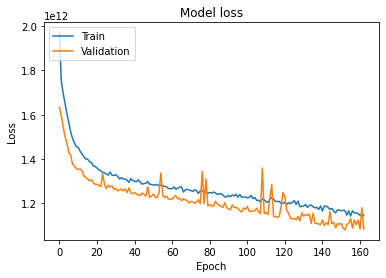

In [20]:
history = nn_grid_search_result.best_estimator_.model.history.history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
nn_pred = nn_grid_search_model.predict(test_X)

#### Metrics for the neural networks model

In [22]:
print(MAPE(test_y, nn_pred))
print(MSE(test_y, nn_pred))
print(MAE(test_y, nn_pred))
print(r2_score(test_y, nn_pred))

0.578967313662132
1120917100761.6467
505950.0034926104
0.28513430080271285


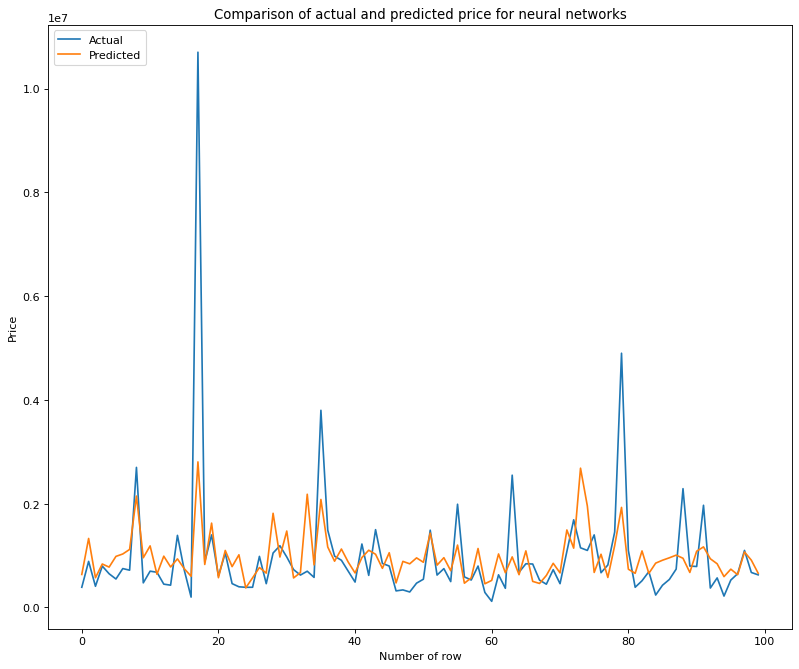

In [23]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), nn_pred[:100])
plt.title('Comparison of actual and predicted price for neural networks')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()